In [3]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm
from wordcloud import WordCloud
import twint
import nest_asyncio

nest_asyncio.apply()

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#gather tweets from the movie Inception
c = twint.Config()
c.Search = "Raizel"
c.Limit = 6000
c.Since = "2010-07-13" 
c.Until = "2011-07-13"
c.Pandas = True

# Uncommonet the following line to run
twint.run.Search(c)

90533577418223617 2011-07-11 17:31:01 -0400 <bella_raizel> I love you in a place where there's no space or time.
90503828847337472 2011-07-11 15:32:48 -0400 <hbalseiros> @anna_raizel kkkkkkkkkkkk né então kkkkkkkkkkk ..
90501239015620609 2011-07-11 15:22:31 -0400 <hbalseiros> @anna_raizel pod crer verdade isso aí...tem que saber gastar e saber ganhar rs o importante é ser feliz e já era! kk com ou sem mta grana
90500650579927040 2011-07-11 15:20:11 -0400 <hbalseiros> @anna_raizel Aí depois fala que ta passando necessidade etc. Saber gastar é mais importante... mas tem que fazer a grande virar.. kkk
90500486008020992 2011-07-11 15:19:31 -0400 <hbalseiros> @anna_raizel kkkkk é, aprendizado foi válido né!? kk pois é, tem gente que ganha uns 1000 reais por mês mas gasta mais do que ganha...
90499618357518337 2011-07-11 15:16:05 -0400 <hbalseiros> @anna_raizel Comprar um carro dahora depois de um tempo kkkkkk fala aí kkkkkkkkkkkkkkkk
90499480096481280 2011-07-11 15:15:32 -0400 <hbalseiros> 

87911252814344192 2011-07-04 11:50:50 -0400 <ShulLists> #PassaicJews  Re: Refuah Sheleima needed for Yecheil ben Mordechai (Raizel)  http://shullists.com/l.php?v=42876
87887729706283008 2011-07-04 10:17:22 -0400 <Cheilonfabiano> @anna_raizel hammm sei..q festa emm;;kkkk
87886354364628992 2011-07-04 10:11:54 -0400 <sweetyrhai> @rebalouise @marvinnoveda ano ka! Define pulubi?? --raizel mari alonzo topacio. :))
87587148336865280 2011-07-03 14:22:58 -0400 <cvassalo> @anna_raizel nda não, amor
87586309048242176 2011-07-03 14:19:38 -0400 <cvassalo> @anna_raizel .-.
87561442684960768 2011-07-03 12:40:49 -0400 <Rueles> @anna_raizel De nada ^^
87358188713803776 2011-07-02 23:13:09 -0400 <Rueles> @anna_raizel Boa noite guria, e a tua noite vai melhorar se vai fazer, sempre melhora...
87356390057836544 2011-07-02 23:06:01 -0400 <ZUMBIDANEVE> @anna_raizel @Nay_eM ekd meu email nay?
87352911826403328 2011-07-02 22:52:11 -0400 <ZUMBIDANEVE> @anna_raizel @Nay_eM vish D:
87352678216245249 2011-07-02 2

84335374477963264 2011-06-24 15:01:34 -0400 <chacongabriela7> que bello el dibujo de raizel
84274011240017920 2011-06-24 10:57:44 -0400 <bella_raizel> Look me in the eyes and the skeptic in me dies.
84242098609594368 2011-06-24 08:50:56 -0400 <maichardest> @leziar824 raizel. may pasok kayo bukas?
84145082290286592 2011-06-24 02:25:25 -0400 <magicliwanag> @ohhelloraizel thanks Raizel!! :) oh hello! Hehe
84125852505346049 2011-06-24 01:09:00 -0400 <TirensJan> Cadis Etrama De Raizel.
84119413233692672 2011-06-24 00:43:25 -0400 <wulanpratiwid> @luvlynaa @fryaan7 @mahanaishin  @melanielha @triewahyuni3 @rie_raizel  tapi pedes juga kok
84118477950029824 2011-06-24 00:39:42 -0400 <wulanpratiwid> @luvlynaa @fryaan7 @mahanaishin @melanielha @triewahyuni3 @rie_raizel  ana lidi-lidian yg di mas ikin
84115940597436418 2011-06-24 00:29:37 -0400 <wulanpratiwid> @fryaan7 @mahanaishin @luvlynaa @melanielha @triewahyuni3 @rie_raizel eh fryan mau jadi terasi haha
84115055259561984 2011-06-24 00:26:06 -0

80915589828313088 2011-06-15 04:32:34 -0400 <juliennefries_> Watching The Voice pilot episode for the Nth time!!! With @leiimendoza and raizel! Convincing them it's the best show noww!!
80868383616270336 2011-06-15 01:24:59 -0400 <KayBeCR> Noblesse just added chapter 189! Raizel, elegantly handsome and powerful! Pyong ~
80856760050651137 2011-06-15 00:38:48 -0400 <MontyMacalino> @ohhelloraizel Sorry Raizel di nako nakabalik ng Makati, nagedit kami ng bonggang bongga ni poch inabot ng 8am!!
80761159178924032 2011-06-14 18:18:55 -0400 <edinaff> @anna_raizel Altua: 1,56 , Peso: 51 kg
80758010317783041 2011-06-14 18:06:24 -0400 <edinaff> @cvassalo @anna_raizel Cesar eu falo assim mas, no fundo ela sabe q eu amo ela!
80757841006313473 2011-06-14 18:05:44 -0400 <cvassalo> @Edinaff @anna_raizel E amor de vcs duas hein! uhauhauh
80755778201460737 2011-06-14 17:57:32 -0400 <edinaff> A @anna_raizel ta aqui em casa! Eu nem gosto dela mas eu tenho q aturar! KOKOAS #mentira
80743681770012672 2011-0

76630155560353792 2011-06-03 08:43:47 -0400 <OhMyMirmo> CoronATion nyt na bukas ^^ GudLuck ' raizel '^^
76610889540829184 2011-06-03 07:27:14 -0400 <meilylubis> See! Dy makin mirip teteh! RT @AnggiSudirman: Baby Raizel mau sarapan dulu di The Nanny's Flavor Bliss Alam Sutera  http://yfrog.com/h8x8gptj
76600942606295040 2011-06-03 06:47:42 -0400 <meilylubis> Rayraaaaaayy!! RT @AnggiSudirman: Al Charrol sayang Baby Raizel :*  http://yfrog.com/ed1xijj
76593478850723840 2011-06-03 06:18:03 -0400 <antareslunata> Lucu bgt nggiiiiii...RT @AnggiSudirman: Al Charrol sayang Baby Raizel :*  http://yfrog.com/ed1xijj
76591431279579136 2011-06-03 06:09:54 -0400 <AnggiSudirman> Al Charrol sayang Baby Raizel :*  http://yfrog.com/ed1xijj
76539270365593600 2011-06-03 02:42:38 -0400 <nilesc> @lazyeye Libre sine from Raizel? Woohoo! :D Yup I'm back na. Might go back to HK for Paramore w Monty though. Tara!
76349797400981505 2011-06-02 14:09:44 -0400 <bella_raizel> Reading "The Virgin Suicides" while liste

72320158508662785 2011-05-22 11:17:24 -0400 <edinaff> Morreu !RT @anna_raizel: @Edinaff cade a @Nay_eM ?
72319110595358720 2011-05-22 11:13:14 -0400 <edinaff> @anna_raizel Siiim estou!
72311378626609152 2011-05-22 10:42:30 -0400 <bella_raizel> Electricity breakdown. No laptop, no telly and no phone once the battery dies. No telly = no game. Reading Kafka instead.
72190495077568512 2011-05-22 02:42:09 -0400 <bella_raizel> I wonder if it's just the weather or... I guess it's just the weather. Gloomy Sunday. :/
72116055899774976 2011-05-21 21:46:22 -0400 <cvassalo> @anna_raizel manda essas pessoas passarem na avenida enquanto o so lobo nao vem
72115632128278528 2011-05-21 21:44:41 -0400 <cvassalo> @anna_raizel Quem disse que eu to cobrando? uahuhauhauahuah
72114460227149825 2011-05-21 21:40:01 -0400 <cvassalo> @anna_raizel Não mesmo. Mas não se preocupe, ja to acostumado a ficar forever alone por la! uhauhauhauha
72114286968836096 2011-05-21 21:39:20 -0400 <edinaff> HAHAHAH isso ai garoto

69962698313568256 2011-05-15 23:09:41 -0400 <NewsNmore> Japan: In 2 hours the judge will announce the final verdict for Yakov Yosef Ben Raizel. Listen 2 a interview with Asken in Japan on Kol mvsr
69962245861425153 2011-05-15 23:07:53 -0400 <thekoppelfamily> In 2 hours will  judge in Japan announce  final 4 habucher Yakov Yosef Ben Raizel. please say   Tehilim  that its shuld go with hatzlocha
69962241449013248 2011-05-15 23:07:52 -0400 <Moshegobba> In 2 hours will D judge in Japan announce D final 4 habucher Yakov Yosef Ben Raizel. please say 5 kaptilech Tehilim he should have Hatzluche
69962155293818880 2011-05-15 23:07:32 -0400 <KolMavaser> Japan: In 2 hours the judge will announce the final verdict for Yakov Yosef Ben Raizel. Listen 2 a interview with Asken in Japan on 1-1-4
69960978862845953 2011-05-15 23:02:51 -0400 <TheNewsWatch> In 2 hours will D judge in Japan announce D final 4 habucher Yakov Yosef Ben Raizel. please say 5 kaptilech Tehilim he should have Hatzluche
6996012213

67984841374834688 2011-05-10 12:10:23 -0400 <cvassalo> @anna_raizel Mas eh uai! Minas e Rio estão colados um no outro! :P
67984385860833280 2011-05-10 12:08:35 -0400 <cvassalo> @anna_raizel Pois eh! Se eu não for ai, voce vem aqui uai!
67983945240817664 2011-05-10 12:06:50 -0400 <cvassalo> @anna_raizel Boa pergunta viu!? uhauhauhuahuh
67983066651570176 2011-05-10 12:03:20 -0400 <cvassalo> @anna_raizel Concordo, vc ainda nem me conhece
67982685452238849 2011-05-10 12:01:49 -0400 <cvassalo> @anna_raizel cuidado para não morrer hein! uhauhauhuahuah
67980104411779072 2011-05-10 11:51:34 -0400 <edinaff> @anna_raizel SOAKOADOADADK
67935612057030656 2011-05-10 08:54:46 -0400 <Litagrufi> RT: @raizeljrc (raizel cantillan) Daming gusto manood ng concert ni Justin Bieber.
67874971103404032 2011-05-10 04:53:48 -0400 <chinitakimz> @shamiel06 sige ate :) ni manang raizel nata?
67866366157393921 2011-05-10 04:19:37 -0400 <zxcvbnmcl> @thesockparody Hi Raizel!
67866366115459073 2011-05-10 04:19:37 -040

66876118703153152 2011-05-07 10:44:43 -0400 <ZUMBIDANEVE> @Nay_eM fala ae nay a @anna_raizel nao é linda e eu sou feieo?
66876107827318785 2011-05-07 10:44:41 -0400 <cvassalo> @anna_raizel tadinha da @Nay_eM
66875500672462848 2011-05-07 10:42:16 -0400 <cvassalo> @anna_raizel ajuda a @Nay_eM arrumar a gaveta
66875407743451139 2011-05-07 10:41:54 -0400 <ZUMBIDANEVE> @anna_raizel linda linda linda linda linda linda linda linda linda linda linda linda linda linda linda linda linda linda linda linda s2
66875334586400769 2011-05-07 10:41:36 -0400 <ZUMBIDANEVE> @anna_raizel qualquer um sabe que voç é linda sim e eu nao vou discutir nao kkkkkkkkkkk
66875058022395904 2011-05-07 10:40:30 -0400 <bella_raizel> MCFC vs. Everton today! Gonna watch it on TV in about an hour. Stocked! Go @MCFC!!!!!!!!!!!!!!!!
66874632967430144 2011-05-07 10:38:49 -0400 <ZUMBIDANEVE> @anna_raizel oxi é sim KKKKKK voç que é linda &lt;3 ou é cega ou é educada demais &gt;.&lt;
66874394525437953 2011-05-07 10:37:52 -0400 <

65537732348358656 2011-05-03 18:06:27 -0400 <edinaff> sadjasjdisad eu te tirando? Capaz!RT @anna_raizel: @Edinaff sério que ta me tirando mesmo? AUIUAHEIUAIUH eu to bem ruivinha, e voce? :p
65537242751447040 2011-05-03 18:04:30 -0400 <cvassalo> @anna_raizel Tenho uma prof assim, hoje nem vou na aula dela por causa disso também
65536870267887616 2011-05-03 18:03:02 -0400 <edinaff> @anna_raizel Oii loira avassaladora' Como esta? :)
65536561978159104 2011-05-03 18:01:48 -0400 <cvassalo> @anna_raizel @Nay_eM esse é o prob! Prof inteligente que não sabe passar a materia :p
65535950062764032 2011-05-03 17:59:22 -0400 <bella_raizel> Sleepyhead.
65535281264205824 2011-05-03 17:56:43 -0400 <cvassalo> @Nay_eM @anna_raizel eh complicado neh!?
65456095770066945 2011-05-03 12:42:04 -0400 <bella_raizel> Tomorrow? Tomorrow. Tomorrow!
65430791580155907 2011-05-03 11:01:31 -0400 <bella_raizel> I feel like I'm taking crazy pills. Srsly, u guys. :b
65429591233282048 2011-05-03 10:56:44 -0400 <bella_raize

62539642955767809 2011-04-25 11:33:07 -0400 <bella_raizel> Super stocked for tonight's game. Go, @MCFC!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
62539371911462912 2011-04-25 11:32:02 -0400 <bella_raizel> Another one of my twitter accounts. :)
62536515548479488 2011-04-25 11:20:41 -0400 <fausontengco> @ohhelloraizel awwww thanks raizel ♥ cge cge will text u ☺ kamusta nman si neil patrick harris s beastly? ☺
62473799412625408 2011-04-25 07:11:29 -0400 <milanyana> Dumaguete with Raizel tomorrow. :D
62303842280292352 2011-04-24 19:56:08 -0400 <sloth204> Walkin round again with @jecelynpaculan @larrisaseerapio kyanna and raizel♥☺
62302826411474945 2011-04-24 19:52:06 -0400 <jecelynpaculan> Walking with @jamiequirante @larrisaseerapio kyanna and my little sister Raizel Guinto
62287701285666817 2011-04-24 18:51:59 -0400 <sloth204> Walking around with @jecelynpaculan kyanna and raizel hahahaahahahhaa ditched @larrisaseerapio
62185408993304576 2011-04-24 12:05:31 -0400 <raizel_> ヤマザキ春のパン祭り再開 ｷﾀ━(ﾟ∀ﾟ)━!

57911968580907008 2011-04-12 17:04:23 -0400 <WATERMAYLON> @carangadango it'd be better if we just write it out. btw do u know if raizel's on? fb or something
57804761675730945 2011-04-12 09:58:23 -0400 <macncess> @FloresDiane Diba ung raizel . kapatid ba ni john un ? :)
57620639242133504 2011-04-11 21:46:45 -0400 <yuli_bi2r> Kak yiyi pulang ke jakarta dulu y raizel!! I'm gonna miss u my cousin :*  http://yfrog.com/hsizdoesj
57310558483005440 2011-04-11 01:14:36 -0400 <zxcvbnmcl> @thesockparody Raizel! Hi!! =))
57084238733910017 2011-04-10 10:15:17 -0400 <zxcvbnmcl> @thesockparody Hay nako Raizel! =))
56862894712827904 2011-04-09 19:35:45 -0400 <raizel_> スイースイープリキュア♪( ´ ▽ ` )ﾉ
56764619364122625 2011-04-09 13:05:14 -0400 <Tiiitsyl> Today I met 4 angels called Naomi, Richie, Raizel and Hide.. Like it.. :)
56693042303860738 2011-04-09 08:20:49 -0400 <fakhriihsan> auah, baca komik aja. Si Raizel dan kawan2 doang yang bisa ngehibur malem minggu
56570768787648512 2011-04-09 00:14:56 -0400 <Mo

48664011931254784 2011-03-18 04:36:19 -0400 <emmanism> @gizelleapril @raizel_ann Ako 5 dismissal ko!! magaayos na ako gamit now na!
48660224806096896 2011-03-18 04:21:16 -0400 <emmanism> @gizelleapril @raizel_ann  uwian na!!! :D stop working!
48634330888675328 2011-03-18 02:38:22 -0400 <emmanism> @marlonabadia @raizel_ann @gizelleapril buntis kayo??
48478516907487233 2011-03-17 16:19:13 -0400 <curt_blow1> RT @Aerie_jay #ificouldiwouldbringback my big cousin Raizel and my granddaDdy.
48440627234484224 2011-03-17 13:48:40 -0400 <Himawan_H> RT @GbrielGeorgiana: Goodnight my Raizel &lt;3
48391356934139904 2011-03-17 10:32:53 -0400 <YWN> TONIGHT – Lakewood Asifa For Bochrim In Japan: The trials of the boys jailed in Japan, Yaakov Yosef ben Raizel a...  http://bit.ly/eAux1q
48334194107092992 2011-03-17 06:45:44 -0400 <raizel_> “@y_nagasawa:  夜間の停電は本当に暇ですよ（笑）
48200905530675201 2011-03-16 21:56:06 -0400 <RogerAlfredoP> asi se llama la perra de raizel xdd RT@shaocontigo
48019693012926464 2011-0

41114547511103488 2011-02-25 07:37:26 -0400 <milanyana> @BEAtoot yesz bei. Wala d glng si raizel. Si jona wala ga reply!! :)))
41037854046027776 2011-02-25 02:32:41 -0400 <fausontengco> @ohhelloraizel raizel, san ko send yung pictures m nung shoot? ☺
40799888774144000 2011-02-24 10:47:06 -0400 <UncleJoeyy> @RaiGreco RAIZEL!!!!!!! WHATUP!!! #FollowTheFreko
40734809902809088 2011-02-24 06:28:30 -0400 <triewahyuni3> @mahanaishin @luvlynaa @rei_raizel @melanieLha RT @Tentangguee: Ingin berterima kasih ke siapa hari ini ? Sila… (cont)  http://deck.ly/~vIEpP
40699364703735809 2011-02-24 04:07:39 -0400 <fausontengco> @ohhelloraizel yup! nasa kin ☺ sige send ko syo hehe uy raizel flaressssss! haha
40664584540917760 2011-02-24 01:49:27 -0400 <triewahyuni3> bersihin gigi bareng @mahanaishin @luvlynaa n @rei_raizel (@ Pusat Kesehatan Masyarakat (PKM) UI)  http://4sq.com/eOv5CP
40608012489981952 2011-02-23 22:04:39 -0400 <wulanpratiwid> ga ada gw :( "@triewahyuni3: with geng ''SAMBEL'' @mahanaishi

27608741398446080 2011-01-19 01:10:11 -0400 <AnggiSudirman> @aiiuudee iyaaaa.. Ini eyang kung-nya Raizel aja mau pulang dari Bandung krn mau nengokin baby di RS.. Hehehe..
27602954156511232 2011-01-19 00:47:11 -0400 <AnggiSudirman> Raizel.. Sehari aja ya di RS.. Besok pulang ya.. Ami Loves U..  http://yfrog.com/h4zv2cjj
27547559132143616 2011-01-18 21:07:04 -0400 <olapoetiray82> @TESSAnggia baby Raizel boleh ga ya jadi menantu gue ntar? Wkwkwkwk #beautifulbabies
27403732400476160 2011-01-18 11:35:33 -0400 <STUNNINGEL> @sweetyrhai RAIZEL MARI TOPACIO a.k.a GF :) HAPPPPY BIRTHDAY! I love you! &gt;:D&lt; Hug! Enjoy your day! Take care okay? &lt;3 Muah!
27294775719759874 2011-01-18 04:22:36 -0400 <pietnya_ponco> Nengok si baby Raizel u/ yg ke 2xnya..  http://myloc.me/gH5nH
27252369691516928 2011-01-18 01:34:05 -0400 <olapoetiray82> Xixixi :pRT @TESSAnggia: Baby raizel minum susunya kalap sampe ngos2an, hihihhi, lucu bangeettt, trus abis napas, lanjuuutt :p olapoetiray82
27132621133717504 2

3387894391635968 2010-11-13 05:05:11 -0400 <NindyaMaretha> Yah kk aku blm tau ceritanya kan kaaaaaaaaa :(RT @dizkys: Raizel (?) Hahahahaha ... Iyaaa lupa raizel RT @nindew: Hah?apa itu apaan ka?
3387546260217856 2010-11-13 05:03:48 -0400 <dizkys> Raizel (?) Hahahahaha ... Iyaaa lupa raizel RT @nindew: Hah?apa itu apaan ka?-_-RT @dizkys: Apa itu (?) RT @nindew: ...  http://tmi.me/38VBe
3108276929560577 2010-11-12 10:34:05 -0400 <chocolatebraces> @miiic sbe ko na lumipat na si raizel eh.dti dentsu indio sya. shettttt bitter ako forever smga agencies na naga-out of the country!!! @@
3077145467293697 2010-11-12 08:30:23 -0400 <Puterikusuma> @nadsnadsky ih kaka aku bete bggggggggggggggggt sama bekas tim raizel mereka ga nyante bgt ngmngnya. !!!!!!!
3076509694697472 2010-11-12 08:27:51 -0400 <Puterikusuma> @dizkys nntn yuuuu ka? ahahaha ka udah jangan sebuuuuuut mereka raizel lagi!!!!!!!!!
3071828721401857 2010-11-12 08:09:15 -0400 <anastasiasaa> RT @GinaaAulia: Sabar kak☺☺ nanti cantiknya i

27735548770 2010-10-18 09:44:52 -0400 <dizkys> @puterikusuma. Besok raizel pulang sekolah di koni yaaa bareng legals junior :)   http://myloc.me/dcp8N
27735526024 2010-10-18 09:44:36 -0400 <Puterikusuma> ka besok emg di koni? Kata karen di sklh?RT @dizkys: Okay besok legals junior dan raizel at KONI !! After school ♡
27734365867 2010-10-18 09:30:59 -0400 <dizkys> Okay besok legals junior dan raizel at KONI !! After school ♡  http://myloc.me/dcmAX
27666163744 2010-10-17 15:43:44 -0400 <ycara94lkc4> Victoria_Lucis_Di_Raizel , в общем занимаешся тем, до чего руки раньше не доходили) фиолетовые фолосы еще кого-то так шокируют? не сла...
27607350500 2010-10-17 00:39:12 -0400 <whimsicality_> @thesockparody Hii Raizel :)
27601003001 2010-10-16 23:12:36 -0400 <zxcvbnmcl> @thesockparody Yo, raizel
27430062504 2010-10-15 07:00:27 -0400 <Puterikusuma> RETWEET @dizkys: #cheersong kesha tick tock RAIZEL   http://myloc.me/dagoR
27429441174 2010-10-15 06:49:32 -0400 <Puterikusuma> hari ini gue ga ket

23083869014 2010-09-05 15:46:09 -0400 <MontyMacalino> RT @ohhelloraizel: Solb na solb sa redwhores!  Salamat! Saya Ng shoot @MontyMacalino » salamat raizel! :) sobraaaaaaaaa
23067221864 2010-09-05 11:29:24 -0400 <Raizel_XIII> yaoi is my guilty pleasure without the guilty. lol.
22839238542 2010-09-02 19:28:03 -0400 <LuzNunez89> tenia como dos años sin cruzar el murito....ya me sentia como una prepa!!....jajaja..suerte k raizel no dejo k me atropellara ningun carro!
22779363952 2010-09-02 03:25:25 -0400 <Dionnypalma125> A DORMIR.... lindos 18 de mi prima Raizel, la quiero mucho!!!
22686203695 2010-09-01 02:54:32 -0400 <jcummi> Ga boleh kl yg itu :DRT @VirgoJazzy: Aku mau kutu raizel n kandiah :p RT @super_mago: Jiah.Kutunya @jcummi lari-larian!Berisik. *garuk*
22685629900 2010-09-01 02:42:04 -0400 <VirgoJazzy> Aku mau kutu raizel n kandiah :p RT @super_mago: Jiah.Kutunya @jcummi lari-larian!Berisik. *garuk*
22450778176 2010-08-29 12:35:40 -0400 <fausontengco> @ohhelloraizel thanks raizel

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [4]:
#convert data into a dataframe
df_1 = twint.storage.panda.Tweets_df
df_1.head()

id    conversation_id    created_at                 date  \
0  90533577418223617  90533577418223617  1.310420e+12  2011-07-11 17:31:01   
1  90503828847337472  90501547124985856  1.310413e+12  2011-07-11 15:32:48   
2  90501239015620609  90500859636621312  1.310412e+12  2011-07-11 15:22:31   
3  90500650579927040  90500323558432769  1.310412e+12  2011-07-11 15:20:11   
4  90500486008020992  90500323558432769  1.310412e+12  2011-07-11 15:19:31   

  timezone place                                              tweet language  \
0    -0400        I love you in a place where there's no space o...       en   
1    -0400        @anna_raizel kkkkkkkkkkkk né então kkkkkkkkkkk ..       pt   
2    -0400        @anna_raizel pod crer verdade isso aí...tem qu...       pt   
3    -0400        @anna_raizel Aí depois fala que ta passando ne...       pt   
4    -0400        @anna_raizel kkkkk é, aprendizado foi válido n...       pt   

  hashtags cashtags  ...  geo source user_rt_id user_rt  retweet_id reply_to  \
0       []       []  ...                                                  []   
1       []       []  ...                                                  []   
2       []       []  ...                                                  []   
3       []       []  ...                                                  []   
4       []       []  ...                                                  []   

  retweet_date translate trans_src  trans_dest  
0                                               
1                                               
2                                               
3                                               
4                                               

[5 rows x 38 columns]

In [2]:

c = twint.Config()

c.Username = "razzle_mydazzle"
# c.Custom["tweet"] = ["id"]
# c.Custom["user"] = ["bio"]
c.Limit = 10
c.Pandas = True
# c.Store_csv = True
# c.Output = "none"

twint.run.Search(c)

1386343761970663426 2021-04-25 11:38:04 -0400 <razzle_mydazzle> Normally SNL makes the jokes but I see twitter is making SNL the joke
1385957947742769155 2021-04-24 10:04:59 -0400 <razzle_mydazzle> aannndddd it is time to ✂️ fat
1385949726684635142 2021-04-24 09:32:19 -0400 <razzle_mydazzle> I dont want to get out of bed because it's in my morning routine to weigh myself and I don't want to do it
1381650319004819456 2021-04-12 12:48:00 -0400 <razzle_mydazzle> I'm the happiest. Stand up comedians are the happiest insecures! Thanks Adam Grant!  https://t.co/6D45VRIcVI
1378142600721543170 2021-04-02 20:29:35 -0400 <razzle_mydazzle> 🤣😂🤣
1376576561638477829 2021-03-29 12:46:42 -0400 <razzle_mydazzle> extra deodorant for virtual interviews ... dont want to smell bad
1375484884374978567 2021-03-26 12:28:46 -0400 <razzle_mydazzle> really enjoyed episode 1 of the demi levato series
1374786156538257413 2021-03-24 14:12:16 -0400 <razzle_mydazzle> windows open #petrichor
1373431593302392835 2021-0

In [4]:
#gather tweets from the movie Miss Congeniality
c = twint.Config()
c.Search = "Miss Congeniality"
c.Limit = 20000
c.Since = "2000-12-14" #released December 14, 2000
c.Until = "2021-04-26"
c.Pandas = True

# Uncommonet the following line to run
# twint.run.Search(c)

1386105668042731524 2021-04-24 19:51:58 -0400 <CallmeHas> La verdadera Miss Congeniality
1386104223499231235 2021-04-24 19:46:14 -0400 <Bamiee_> Surfaces from where? Abi you should say you went to dig it out of your archives. Dpmo
1386103823672872963 2021-04-24 19:44:38 -0400 <macrohardhala> ano ba yan away away pa kayo sa results ng drag race eh kung ako na lang kaya yung naging miss congeniality 🤬🤬🤬🤬
1386103642621612038 2021-04-24 19:43:55 -0400 <cesnchf> a miss congeniality do bbb21
1386102327656992770 2021-04-24 19:38:42 -0400 <bovksmart> avaliando em ingles pois sou chique My ★★★★★ review of Miss Congeniality on Letterboxd  https://t.co/nhrFR0BU7o
1386101848004653059 2021-04-24 19:36:47 -0400 <CongenialityOf> @MayoOnPizza 🥺🥺🥺
1386101171853701126 2021-04-24 19:34:06 -0400 <Adaltonico> olivia merda fracassada máquina de xerox e sem miss congeniality
1386101135337934850 2021-04-24 19:33:57 -0400 <Unlucky_Guy29> @lamenosdraga es que por qué no entienden que MISS CONGENIALITY es difere

1386038786367397891 2021-04-24 15:26:12 -0400 <daniellmarshall> @Siobhan_H Yeah it's proper dragged (oi oi)  When they mentioned the ankle I knew what the craic was. Winner won it fair and deserved though.  You're right about Miss Congeniality! Fucking what!? 🤣
1386038682709237761 2021-04-24 15:25:47 -0400 <ditzayy> Our hopes for our babygirl to be out by 4/20 (blaze it), 4/24 (easy to remember/our area code), or 4/25 (the perfect date acc. to Miss Congeniality) are busted.  I hope she’s out by 4/27 (Pat’s birth month and my birth day) 🤞🏽🤞🏽🤞🏽
1386038089009745921 2021-04-24 15:23:26 -0400 <dillonhead14> @MissLaLaRi I am so proud/happy that you won Miss Congeniality!!! You’re such a ray of light! Can’t wait to see what the future has planned for you!
1386038004268011522 2021-04-24 15:23:06 -0400 <eclecticbrotha> In the civil war between Miss Congeniality and The ForceTheVote Podcast Cabal I root for mutually assured destruction, but that doesn't mean I'm above signal boosting one side of

1385983420539473921 2021-04-24 11:46:12 -0400 <charlene_woolle> @MissLaLaRi Congratulations 🎉 on winning Miss Congeniality! You made us (Atlanta) proud! We ❤️ You! ❤️💋🎉🥰💕
1385983153475657728 2021-04-24 11:45:08 -0400 <fionaellis_> @keithsuhshe all great but should have been rosè/gottmik, and tamisha for miss congeniality 🤷🏼‍♀️
1385982940396544003 2021-04-24 11:44:17 -0400 <marcualwanders> Sabi siguro ni Olivia. Tangina kung alam ko lang na hindi ko magiging Miss Congeniality dapat nagmaldita na lng pala ako. 😂
1385982661282439171 2021-04-24 11:43:11 -0400 <kiwdiw> q mierda d miss congeniality es esta
1385982531158355969 2021-04-24 11:42:40 -0400 <PsycaneLovesYou> Symone - America's Next Drag Superstar  Kandy Muse - First Runner-Up  LaLa Ri - Miss Congeniality   It all just feels so completely correct
1385982510300008449 2021-04-24 11:42:35 -0400 <periferiachic> pelo amor de deus imagina o senso de carisma que uma pessoa deve ter pra querer q a olivia lux ganhasse miss congeniality no l

1385950384850624519 2021-04-24 09:34:56 -0400 <undertalelou> muy buena la miss congeniality
1385950266734747651 2021-04-24 09:34:27 -0400 <AtinaDreams> Mistaken identity – framed Miss Congeniality 2018 UNAE Anita Sapkota . Freed and accepted .  https://t.co/S9yKPQbGdW
1385950012836696072 2021-04-24 09:33:27 -0400 <ianjereth> i still think that peppermint should’ve won miss congeniality for season 9
1385949216921505797 2021-04-24 09:30:17 -0400 <stateraa_> @shadoblivion Kandy was better than Rosé  je voulais Olivia ou Tamisha pour miss congeniality :((, en attendant Liv était dans le top 5 💅
1385948935081103368 2021-04-24 09:29:10 -0400 <mrslevisentme> Weirdest Miss Congeniality choice ever. #dragrace
1385947811888381955 2021-04-24 09:24:42 -0400 <AmberGi75659073> @juliaanusiak_ Miss congeniality is not who I thought it would be either
1385947495948193796 2021-04-24 09:23:27 -0400 <SDCain> Me: I think we all can agree the 2002 film Bad Company, in retrospect, most likely exists due to t

1385915837475966977 2021-04-24 07:17:39 -0400 <haikudetat> @the_symonee You deserved it just for the HAIR you served this season alone! You are magnetic on stage and your heart shines through! So happy for you and our Miss Congeniality! 🤗
1385915808270913540 2021-04-24 07:17:32 -0400 <JS_RamirezMD> @wise_jaylon @OMIEP0P @kilsupreme @MissLaLaRi @RuPaulsDragRace Olivia said all season that she was going to be Miss congeniality. But Lala being miss congeniality seems correct. Maybe Olivia next time won’t find the need to force a sweet personality and let her diva attitude run free unapologetically. She might win!
1385915735797649410 2021-04-24 07:17:15 -0400 <burnbliind> im sorry but denali or utica for miss congeniality
1385915621422993409 2021-04-24 07:16:47 -0400 <TheatricallyGay> @BigGayDemons @glamfinelady @mistertoybox @HEARTFELON @andrewlvilla 13 seasons and 6 seasons we got to choose a cast member 9 where we got to vote miss congeniality We had choices We don't anymore because we 

1385886853384052736 2021-04-24 05:22:29 -0400 <artpopthenight> LaLaRi comme Miss Congeniality sits with me, ma puce a une énergie géniale!!!
1385886787558682625 2021-04-24 05:22:13 -0400 <MaferMafs> Miss congeniality no fue Denali... esta es la temporada que más me gustó pero el final lo arruinó todo :(
1385886783272112131 2021-04-24 05:22:12 -0400 <DatPolina> Excuse me... This year's miss congeniality is... NOT Olivia Lux????? I give the fuck up
1385886735574388738 2021-04-24 05:22:00 -0400 <nahvthegigistan> CONGRATS TO @MissLaLaRi FOR MISS CONGENIALITY- SO AMAZING AND LOVEABLE
1385886638769856514 2021-04-24 05:21:37 -0400 <okaysowhynot> nevermind x2 que denali no ha ganado miss congeniality
1385886102293258241 2021-04-24 05:19:29 -0400 <infinityston3> The #DragRace finale was amazing. Those looks! The lip syncs! Honesty every single won of them turned it out. Oh, and @MissLaLaRi getting miss congeniality was the icing on the cake 💖 @gottmik @the_symonee @TheKandyMuse @omgheyrose
1385

1385854892368142337 2021-04-24 03:15:28 -0400 <coughsyurp> mi sono spoilerata lala ri miss congeniality??? anche meno
1385853662463995905 2021-04-24 03:10:35 -0400 <carsonkfan2> ALSO ME AND MY MOM CHEERED SO LOUDLY WE WOKE UP MY DAD WHEN LALA GOT MISS CONGENIALITY
1385853465142902789 2021-04-24 03:09:48 -0400 <catfacemeowy> @YuhuaHamasaki @BootlegOpinions I know ur show is about opinions, but it is a FACT that you had the best looks of the night tonight! I can’t believe you also won Miss Congeniality and the entire season too!! Congrats reigning queen!
1385851766059651072 2021-04-24 03:03:03 -0400 <Wannieee___> @MissLaLaRi  winning miss Congeniality is what I like to see! Manifesting a Monet journey for her 🙏
1385851578490425346 2021-04-24 03:02:18 -0400 <Chrisgmar> La miss congeniality????? En que mundo????
1385850753143685120 2021-04-24 02:59:02 -0400 <heckyeahvince> But congrats to my Pastor Queen from the ATL: LaLa Ri. Well deserved for Miss Congeniality! 🥰 #DragRace  https://t.co/

1385818201401999360 2021-04-24 00:49:41 -0400 <jimmyychakar> miss congeniality… ?????
1385818192958865408 2021-04-24 00:49:39 -0400 <Gaavham> confused about miss congeniality.... winner well deserved tho
1385817723993739266 2021-04-24 00:47:47 -0400 <facu18oscopio> No me interesa la decisión, la reina sigue siendo Jaida, Heidi la Miss Congeniality y esta season no existió #DragRaceFinale
1385817424742682628 2021-04-24 00:46:35 -0400 <fooledsmoothly> lala take that miss congeniality money and buy yourself your finale dress for all stars 7777777
1385817368857911297 2021-04-24 00:46:22 -0400 <marcovilhoso> coisas que me fizeram feliz: ver a vagabunda da olivia lux perdendo a única coisa que ela buscou nessa season (o miss congeniality)
1385817151156756482 2021-04-24 00:45:30 -0400 <brenobrinobruno> @_maryhhe FAZZZZZZZ AAA
1385816873179123713 2021-04-24 00:44:24 -0400 <ryn_mchtt> ANOTHER CONCERN IS THE MISS CONGENIALITY! REALLY?! IT SHOULD BE ALWAYS BASED IN A FAN VOTE!!! I'M NOT TAKING TH

1385798174368010240 2021-04-23 23:30:06 -0400 <badgalguigos> LALA RI MISS CONGENIALITY EH ELAAAAAAAAAAAAAAAA
1385797947288293376 2021-04-23 23:29:12 -0400 <JamesIvan714> 'Di ko gets bat sobrang daming ebas ng mga tao sa Miss Congeniality eh nung Roast challenge parang sure naman na agad dapat 🙄
1385797738491699200 2021-04-23 23:28:22 -0400 <LordDvRicardo> @Jaimeing92 La peor parte fue esa miss congeniality y al menos no ganó Kandy Muse
1385797630479978496 2021-04-23 23:27:56 -0400 <vidadegustavo> Se ela não merecia o miss congeniality só por esse vídeo aqui já fez por merecer   https://t.co/yFQTFoeTDg
1385797484031750144 2021-04-23 23:27:21 -0400 <lamalafeminista> No sé cómo me había negado ver Miss Congeniality. It's absolutely brilliant.
1385797354750611464 2021-04-23 23:26:50 -0400 <loveeleighhhh> @MissLaLaRi so happy you’re miss congeniality !! ❤️❤️❤️ one of my favorites
1385797311863738372 2021-04-23 23:26:40 -0400 <Alex_eleganza> Siempre pense que Mehmo seria la Miss Congeniality

1385783462167138306 2021-04-23 22:31:38 -0400 <STlNKYP_SSY> @MissLaLaRi we love you lala! you’re so deserving of miss congeniality💕💕💕💕💕💕💕
1385783431578243074 2021-04-23 22:31:31 -0400 <alzmrnd> as próprias competidoras votam pra miss congeniality desde a décima temporada. vocês acham mesmo que sabem quem foi mais simpática na temporada do que as pessoas que VIVERAM aquilo?
1385783412699504646 2021-04-23 22:31:26 -0400 <ricardocoral> Rosé’s brother for miss congeniality #dragrace
1385783377031274497 2021-04-23 22:31:18 -0400 <PamelaVoorhee10> BEST CHOICE #MissCongeniality #DragRace  https://t.co/ROsYLbTzi6
1385783244675715073 2021-04-23 22:30:46 -0400 <moctezumaalexis> @melondelluvia We no entendí, quedé con la final hasta con la miss congeniality, no entendí
1385783236723232773 2021-04-23 22:30:44 -0400 <zamo_honey> 🚨SPOILER ALERT🚨  - - - HUGE CONGRATULATIONS TO @the_symonee FOR BEING CROWNED THE WINNER OF S13 AND TO @MissLaLaRi FOR BEING MISS CONGENIALITY!!!! IM SO FUCKING PROUD 💖💖💖💖💖

1385772632839049218 2021-04-23 21:48:36 -0400 <MrLuisWatkins> @E_King333 I’m talking about the gays that were shocked/upset that Lala Ri won miss congeniality over Denali (?????) as if there was ever a chance for Denali to win that.
1385772579068289028 2021-04-23 21:48:23 -0400 <Aj_tbp> This season really gave what is was supposed to give a Black winner and another black miss congeniality    #DragRace  https://t.co/3xY5PrzAJz
1385772558969188354 2021-04-23 21:48:19 -0400 <LostInTheLurk> LaLa Ri!!!!! I called her as Miss Congeniality!! I’m so pleased. 🥰🥰🥰 #DragRace
1385772531966267395 2021-04-23 21:48:12 -0400 <LuizaVulgoLuh> Segundo ano seguido com drag queens pretas no topo da temporada  Lala Ri Miss Congeniality e  Symone Winner  COME ON BLACK EXCELLENCE 👑👑❤️ #DragRace  https://t.co/IH0nqSNMMh
1385772522289913858 2021-04-23 21:48:10 -0400 <poppagpeter> @RuPaulsDragRace @VH1 Love La La Ri my choice for miss congeniality
1385772495760941058 2021-04-23 21:48:04 -0400 <petro_lauren> @jos

1385769366822834176 2021-04-23 21:35:38 -0400 <bonesiepink> @MissLaLaRi winning Miss Congeniality and @the_symonee snatching the CROWN absolutely fits my entire fantasy ❣️❣️❣️ so fucking deserved, I'm screaming
1385769358820093955 2021-04-23 21:35:36 -0400 <LemonRtwtdMe> SOOOO EXCITED about our QUEEN and MISS CONGENIALITY this year! So so SO happy! Love them both!!! #rupaulsdragraceseason13 #rupauldragrace #RuPaul
1385769341543763970 2021-04-23 21:35:32 -0400 <GOTTMlKK> lala winning miss congeniality and symone winning s13 just makes so much sense i couldnt be happier with the outcome
1385769291979628546 2021-04-23 21:35:20 -0400 <dudukossatz> O gag da noite foi lala ri ganhando miss congeniality
1385769289966309376 2021-04-23 21:35:19 -0400 <RiipKristian> @KouKouNotsu @RealNABmusic @Andr3w_Ezz @RuPaulsDragRace @MissLaLaRi I didn’t see that, I still took it as a clear indicator she wasn’t gonna win miss congeniality
1385769273143009280 2021-04-23 21:35:15 -0400 <http_matheuss> Amei que

1385766818812338179 2021-04-23 21:25:30 -0400 <la_atacadx> Miss congeniality de la 13 temporada  https://t.co/0TpacRlJ2Q
1385766811803738112 2021-04-23 21:25:28 -0400 <Henriquerme> Lala Ri, miss congeniality, é isso!!!!
1385766797232775170 2021-04-23 21:25:25 -0400 <elpelosnecioss> Olivia viendo que no fue coronada como Miss Congeniality #DragRace  https://t.co/RFLsgRg4eK
1385766784154972168 2021-04-23 21:25:22 -0400 <cxrlosmotx> De verdad no entiendo como Lala Ri ganó Miss Congeniality si duro tres segundos en la competencia... I-  https://t.co/9EqXiEzova
1385766782133227521 2021-04-23 21:25:21 -0400 <TCNemesis29> Now THIS, I agree with! Miss Congeniality YASSSSS! #DragRaceFinale
1385766769810366465 2021-04-23 21:25:18 -0400 <tkapolinario> Lala Ri Miss Congeniality simmmm  amei demais #DragRace 😍😍😍😍😍😍🥰🥰🥰🥰🥰🥰🥰
1385766768807923718 2021-04-23 21:25:18 -0400 <Faggottinie> Verga, yo no sé qué esperaban ustedes pero yo vi a Lala Ri como Miss congeniality since day one.
1385766764533981184 20

1385766324333424641 2021-04-23 21:23:32 -0400 <Bryan_KnowsBest> Lala Ri winning Miss Congeniality has been the highlight of the finale so far. I’m so happy for her. #DragRace
1385766320571097088 2021-04-23 21:23:31 -0400 <laughs_n_lyrics> The way @denalifox got robbed during the season and of miss congeniality 🤪🤪🤪 some bullshit! #DragRace #DragRaceFinale
1385766316167110662 2021-04-23 21:23:30 -0400 <Jamar84> Yessss So happy for @MissLaLaRi For Miss congeniality!!!! such a pleasant surprise ! #DragRace
1385766314439028737 2021-04-23 21:23:30 -0400 <sebasmarykong> lala ri miss congeniality??? girl wtf
1385766310773153802 2021-04-23 21:23:29 -0400 <maybedavisreal> ALGUIEN SABE POR QUÉ LE HA DADO LA RUPAUL EL MISS CONGENIALITY A LALARI?
1385766303898636289 2021-04-23 21:23:27 -0400 <alliermrs> That Lalari Experience!! Con-dragculation this year miss Congeniality 👏🏻
1385766301470269450 2021-04-23 21:23:27 -0400 <edxxxrdo> vc forçou a voz de criança inocente olivia? forçou vc ganhou o miss 

1385766042031493125 2021-04-23 21:22:25 -0400 <aizaack_> Olívia forçou tanto o personagem pra no final não levar nem miss congeniality
1385766041888899072 2021-04-23 21:22:25 -0400 <LindseyRae93> Congrats @MissLaLaRi you are the perfect Miss Congeniality for this season #DragRace
1385766040769073154 2021-04-23 21:22:25 -0400 <mailliwbc> Passado que a Olívia não levou o Miss Congeniality
1385766027707957252 2021-04-23 21:22:21 -0400 <wholuska> Lalari obviamente merecia mais o Miss Congeniality, Olivia forçou muito kkkk que bom que não levou
1385766027468890113 2021-04-23 21:22:21 -0400 <luuizotaa> lalari miss congeniality achei ok apesar de que não estava torcendo pra ela #dragrace
1385766026365779969 2021-04-23 21:22:21 -0400 <lovergmez> achei que minha kween olivia ia ganhar o miss congeniality af a injustiça com a miss simpatia  https://t.co/aHXapn9sxw
1385766018715369474 2021-04-23 21:22:19 -0400 <teuzintro> qq aconteceu q a Olívia num ganhou miss congeniality 🤯
1385766017142595584 

1385765763366203392 2021-04-23 21:21:18 -0400 <_pedroturci> espero q a miss congeniality não seja a única coisa sã dessa velha hj
1385765760971288578 2021-04-23 21:21:18 -0400 <cinesimples> #Lalari #misscongeniality  Chegou o auxílio emergencial da RuPaul #dragrace
1385765759952035840 2021-04-23 21:21:18 -0400 <RonTheArtist_> There was THREE OPTIONS that Ru could've gave Miss Congeniality, before Lala Ri. No tea or shade, Lala Ri was cool, but not quite Miss Congeniality in my opinion.. I'm in such shock!! #DragRace
1385765752414760961 2021-04-23 21:21:16 -0400 <Chefjohnnybear> Lala miss congeniality? #RuPaulsDragRace tamisha should’ve been
1385765742944063488 2021-04-23 21:21:14 -0400 <OH19> YES MISS CONGENIALITY LALA RI. I am so happy for her. Thrilled! #DragRace
1385765740024930307 2021-04-23 21:21:13 -0400 <joyorke_> KKKKKK LALA RI MISS CONGENIALITY KKKKKKKKKKKKKKKKKKKKKKK  https://t.co/5dmlnjNc8o
1385765738707787776 2021-04-23 21:21:13 -0400 <paulina_potter> #RuPaulsDragRace wtf f

1385765541655289856 2021-04-23 21:20:26 -0400 <perryduff285> LaLa Ri winning Miss Congeniality as she should 👏👏👏👏 Now get her on AS 👏👏👏👏
1385765541088989184 2021-04-23 21:20:25 -0400 <sheldon_ew> TWO Black Miss Congeniality Queens back to back!!!! #DragRace  https://t.co/ExsBfMnQfZ
1385765540107534340 2021-04-23 21:20:25 -0400 <jeds1999> CONGRATS LALA RI FOR MISS CONGENIALITY!!! @MissLaLaRi #DragRace
1385765537913835521 2021-04-23 21:20:25 -0400 <Rocky_Rockets> Olivia Lux was upset and you could see it. I’m cracked. Everyone is cracked. 😂 #RuPaulsDragRace #misscongeniality
1385765537234530309 2021-04-23 21:20:25 -0400 <ClubKeitha> Omg I knew @MissLaLaRi would win Miss Congeniality.  She’s adorable!!! #DragRace
1385765535003156480 2021-04-23 21:20:24 -0400 <vitormarquesds> 🗣️YAAAAAAS @MissLaLaRi #MissCongeniality #DragRace #RuPaulsDragRace
1385765529395376134 2021-04-23 21:20:23 -0400 <jxuaopedro> Como assim Olívia não ganhou miss congeniality pqp
1385765528317300737 2021-04-23 21:20:22

1385765433324752898 2021-04-23 21:20:00 -0400 <MrTreyTony> Yessss!!!! How long have I been campaigning for @MissLaLaRi to be #MissCongeniality ?! 🤩 #DragRaceFinale
1385765430489460738 2021-04-23 21:19:59 -0400 <Mr_Papero> No le dieron miss Congeniality a Ol*via  https://t.co/Wak7BQGba1
1385765430392918019 2021-04-23 21:19:59 -0400 <coslipe> Sem Denali Miss Congeniality e Sem Rose com coroa, a vida desse fandom deve está triste Kkkllkk passo mal com o choro deles  #DragRace Parabéns Lala  https://t.co/rfS36pRIXe
1385765429990371330 2021-04-23 21:19:59 -0400 <juniorwbtop> lala ri miss congeniality?????????
1385765429755453445 2021-04-23 21:19:59 -0400 <victorxtt> meu deus erraram até no miss congeniality ............ xau drag race, xau #DragRace
1385765428866256897 2021-04-23 21:19:59 -0400 <briofitacrush> LALARI MISS CONGENIALITY COM DENALI E OLIVIA LUX NO CAST???? NAO GENTE.
1385765428392194049 2021-04-23 21:19:59 -0400 <gemi_ry> @MissLaLaRi YES MAAM MISS CONGENIALITY
13857654281699491

1385765345600888834 2021-04-23 21:19:39 -0400 <trace_ey> CÓMO QUE DENALI NO ES MISS CONGENIALITY #DragRace
1385765345504415747 2021-04-23 21:19:39 -0400 <schneidmaster> Did they pull Miss Congeniality out of a hat..? #DragRace
1385765345038831616 2021-04-23 21:19:39 -0400 <safadaves> @epengu i wanted her to win miss congeniality so bad :,(
1385765342891347971 2021-04-23 21:19:38 -0400 <tavarespedroii> QUALQUER OUTRO RESULTADO DE MISS CONGENIALITY SERIA MUITO INJUSTO PORRA TO MUITO FELIZ JESUS, BITCH!!!!
1385765340840345601 2021-04-23 21:19:38 -0400 <JAZZYSWAGG305> Yassss lala ree for miss congeniality #DragRace #DragRaceFinale
1385765339758276608 2021-04-23 21:19:37 -0400 <lucattuaba> Lala ri miss congeniality??? puts kk
1385765338604834822 2021-04-23 21:19:37 -0400 <jaidasessence> @Iove444eva MISS CONGENIALITY YES
1385765338231545856 2021-04-23 21:19:37 -0400 <xsauxx> Ninguém tava esperando essa Miss Congeniality, e realmente foi muito melhor assim do que a que todo mundo esperava  #D

1385765230031130628 2021-04-23 21:19:11 -0400 <FancyAlly1> I’m so happy @MissLaLaRi won Miss Congeniality she deserves it so much 🥰 #DragRace
1385765226705006592 2021-04-23 21:19:10 -0400 <pixelshoshi> #DragRace LALA RI WINNING MISS CONGENIALITY I KNOW THAT'S RIGHT  https://t.co/zs8kv6dRTp
1385765226554044422 2021-04-23 21:19:10 -0400 <denaIifoxx> SHUT SUP SHUT USHUT UPLA LA MISS CONGENIALITY YES YES GES
1385765226298159104 2021-04-23 21:19:10 -0400 <partycityclown> YEAH LALA MISS CONGENIALITY!!!
1385765226180751364 2021-04-23 21:19:10 -0400 <ohmygottaste> LALA RIII MISS CONGENIALITY AAAAAAAAAAAA FINALMENTE VENCEMOS QUE DELICIAAAA
1385765221139161088 2021-04-23 21:19:09 -0400 <ceIesticx> e teve la la ri miss congeniality vius  https://t.co/WreUhqro8U
1385765217989169153 2021-04-23 21:19:08 -0400 <assenavmarie> YES MISS LALA CONGENIALITY #DragRace
1385765213857673216 2021-04-23 21:19:07 -0400 <pearlwinx> now that lala is miss congeniality let’s get the monét xchange trajectory on her so

1385764976464261126 2021-04-23 21:18:11 -0400 <ashooleys> denali for miss congeniality #DragRace
1385764971846512641 2021-04-23 21:18:10 -0400 <DCHomos> Tamisha for miss congeniality #RuPaulsDragRace
1385764961641766916 2021-04-23 21:18:07 -0400 <XlBrito> Miss Congeniality pra @denalifox pofavô! #rupauldragrace !
1385764956973330433 2021-04-23 21:18:06 -0400 <_bhadgalj> It feels like Olivia Lux forced her kindness to win Miss Congeniality lol 🤷🏻‍♂️ I said what I said #DragRace
1385764944239497216 2021-04-23 21:18:03 -0400 <Albertobsky> Por favor que no gane Olivia Lux el Miss Congeniality.
1385764944155717639 2021-04-23 21:18:03 -0400 <lycanthropegod2> QUIERO A DENALI COMO MISS CONGENIALITY
1385764919971401728 2021-04-23 21:17:57 -0400 <RealMellyCreme_> I don’t want Miss Congeniality to be Olivia 🥴
1385764917790248963 2021-04-23 21:17:57 -0400 <AliceDeLioncou1> I feel like this season doesn’t have a miss congeniality #rupauldragrace
1385764916045438984 2021-04-23 21:17:56 -0400 <JonanV

1385763287611101184 2021-04-23 21:11:28 -0400 <whentdwm> va bene Symone ha vinto buonanotte cinque euro su Olivia miss congeniality
1385763286470348806 2021-04-23 21:11:28 -0400 <LucasDuques> Meu palpite de quem vai ser a miss congeniality: Olívia
1385763249262583813 2021-04-23 21:11:19 -0400 <EthanAntalosky> Michelle: @HeidiNCloset returns to crown miss Congeniality  *cuts to 3 bottles of Olay* #RuPaulsDragRace #DragRace
1385763154039300102 2021-04-23 21:10:56 -0400 <candyperfwmeboy> unica miss congeniality possivel -&gt; DENALI !
1385763081603670026 2021-04-23 21:10:39 -0400 <CORS3T> if tamisha iman isn’t miss congeniality im burning down a city
1385762941849456640 2021-04-23 21:10:06 -0400 <SpeakEasyBitch> @gottmik for miss congeniality!!!! plus all stars 6 ! #DragRace
1385762887176790019 2021-04-23 21:09:53 -0400 <Ialaloopsie> MISS CONGENIALITY NEXT YESSSS
1385762875348643840 2021-04-23 21:09:50 -0400 <ErikPatino6> Am I the only one that doesn’t want Olivia to be Miss Congeniality 

1385749638020489219 2021-04-23 20:17:14 -0400 <coochiecrown> LALA FOR MISS CONGENIALITY #DragRace
1385749631389347841 2021-04-23 20:17:12 -0400 <OscarFarfanq> si miss congeniality es olivia flop. I QUIT
1385749616604418052 2021-04-23 20:17:09 -0400 <vilardileonardo> Amigas quem vocês acham que ganham Miss Congeniality? Eu chuto na Olivia Lux
1385749603103002624 2021-04-23 20:17:06 -0400 <Alanad_b> A miss congeniality deve ser a Olívia né galera? Ou Tina burner
1385749602486431746 2021-04-23 20:17:05 -0400 <richn_> lala ri é a única miss congeniality possível independente do resultado #dragrace
1385749602125688833 2021-04-23 20:17:05 -0400 <PalIahAbdul> To be honest none of the girls besides Tamisha iman should even be in the running for miss congeniality
1385749599059599361 2021-04-23 20:17:05 -0400 <nuapiii> até o miss congeniality tá dificil esse ano.... #DragRace
1385749585440743424 2021-04-23 20:17:01 -0400 <nickiera5> Tamisha iman for miss congeniality you can't change my mind #Dr

1385679297390825474 2021-04-23 15:37:43 -0400 <denalithings> @denalifox omg I already did a lightstick to cheer for you as miss congeniality denali saranghae! DE NA LI SARANGHAE  https://t.co/6ZC9Cqq0M8
1385677631236890632 2021-04-23 15:31:06 -0400 <rioG_9> Miss CONGENIALITY will be on NETFLIX!!!! Lord of the Rings next!!!! @netflix
1385677564534870018 2021-04-23 15:30:50 -0400 <TakaranGolem> @BlueinTexas2 @jessiegender @AndytheCorsair I was starting to think of Rom-Coms. Sandra Bullock in Miss Congeniality is smart and good at her job, but not in taking care of herself or interacting with others. Maybe more of a Slovenly Genius than tortured, but she has the some of the same energy IMHO.
1385674928486223883 2021-04-23 15:20:22 -0400 <DaBossL8di> @LuViNbEaUtY101 Well can u make me sum spaghetti
1385674863420002306 2021-04-23 15:20:06 -0400 <DaBossL8di> @LuViNbEaUtY101 🥴
1385674795057098759 2021-04-23 15:19:50 -0400 <DaBossL8di> @KaiserYeaDatsMe Ha
1385674665474068489 2021-04-23 15:19:1

1385504226030333953 2021-04-23 04:02:03 -0400 <thatssotough> @peachfizzle gn love 😭
1385503975949185027 2021-04-23 04:01:03 -0400 <thatssotough> @MackieBrasil YESSSS
1385503438423875584 2021-04-23 03:58:55 -0400 <thatssotough> TFATWS EP 6 SPOILERS #TheFalconAndTheWinterSoldier #SamWilson #SamWilsonIsCaptainAmerica- #FalconAndWinterSoldierFinale - - - - "The how it started vs how it's going" for this episode SLAP
1385503044431925255 2021-04-23 03:57:21 -0400 <thatssotough> @616sLOKI THAT'S WHAT I SAID
1385502624749850626 2021-04-23 03:55:41 -0400 <thatssotough> @djarinsblunt ... yooooooooooooo
1385502502473375746 2021-04-23 03:55:12 -0400 <thatssotough> @rambeaurogers I'm saying like that felt GOOD
1385502431568666625 2021-04-23 03:54:55 -0400 <thatssotough> @vibewinters can't handle this today ✋🏾
1385502317391273984 2021-04-23 03:54:28 -0400 <thatssotough> Now THAT felt like a finale
1385502111757123586 2021-04-23 03:53:39 -0400 <thatssotough> TFATWS EP 6 SPOILERS #TheFalconAndTheWinte

1385358579989983232 2021-04-22 18:23:18 -0400 <Onlysylvio> @MissLaLaRi I hope u win miss congeniality!
1385355437424447497 2021-04-22 18:10:49 -0400 <JcanTediBear> On episode 7&amp;my opinions so far: - I kinda like Eliott a lot a lot.  - Rosé is sexy af as a boy and a girl.  - Symone is a Queen - Olivia will be Miss Congeniality. - Tina is very shady &amp; funny  - LaLaRi is adorable but that bag look honey 😒 - Denali is sweet &amp; cute  #DragRace
1385351185398435842 2021-04-22 17:53:55 -0400 <brenobrinobruno> @luacbc_ @nicsaraujo piranha não sente frio mesmo
1385351148702363648 2021-04-22 17:53:47 -0400 <reesewhiz> @_ronronturon The real Miss Congeniality of Season 6.
1385345808824819712 2021-04-22 17:32:33 -0400 <urbansapphics> @milfmcximoff miss congeniality
1385337819820855297 2021-04-22 17:00:49 -0400 <gagamik> @ageofthejanfan @Meettheplastic @pixiezinha @Lduuudu @jessdragfan Levei o miss congeniality pelo menos   https://t.co/U6vj1lugjm
1385337440685240323 2021-04-22 16:59:18 -

1385025762613469184 2021-04-21 20:20:48 -0400 <DaBossL8di> @Its_Jess_Hair Bc baybayyyyy we living with u
1385025107375054849 2021-04-21 20:18:12 -0400 <DaBossL8di> @Its_Jess_Hair All I know is u better be healed in time chile
1385024031955603462 2021-04-21 20:13:56 -0400 <Cristalina14_> Miss Congeniality de vez en cuándo 😬🦋  https://t.co/CsBGKHLNqG
1385023116523474947 2021-04-21 20:10:18 -0400 <chikkadee> Larisa Iordache is the Miss Congeniality of elite gymnastics.
1385019466216443908 2021-04-21 19:55:47 -0400 <whereisrymeno> @RuPaulsDragRace pls do like a miss congeniality szn or a miss congeniality special ugh i would die for that
1385015286039031811 2021-04-21 19:39:11 -0400 <knowkamlix> @_bangchanyeol Miss congeniality yiiee
1385011717676146688 2021-04-21 19:25:00 -0400 <brenobrinobruno> SOCORROOOO AAAAAAA
1385003219449827329 2021-04-21 18:51:14 -0400 <badtthew> Olivia Lux was genetically engineered to become Miss Congeniality and get on an All Stars season so we’d have to see her

1384679710970585088 2021-04-20 21:25:43 -0400 <HaidyHesham30> Rn
1384679324029276160 2021-04-20 21:24:11 -0400 <Shaela_vie> See if I ever made it on Drag Race dont get me wrong id love to win but I'd also rather be known as Miss Congeniality 😅❤
1384676404403609601 2021-04-20 21:12:35 -0400 <tweettweethoho> Almost the perfect date...Miss Congeniality - Bosson - One In A Million  https://t.co/lBdWZUDUqH via @YouTube
1384670227200315392 2021-04-20 20:48:02 -0400 <thatclarafied> @JordanEllyse Miss congeniality and sister act 2
1384668261242056705 2021-04-20 20:40:14 -0400 <iamnotatwit> Remake Miss Congeniality but starring @charliejane #JJGo
1384665270942195717 2021-04-20 20:28:21 -0400 <Ice_climbers17> Miss Congeniality better be Denali or Lala
1384663494474321921 2021-04-20 20:21:17 -0400 <thatssotough> @selismp Was this girl black?
1384662398250913796 2021-04-20 20:16:56 -0400 <farmersair> I can’t stop watching Miss Congeniality
1384658399246393348 2021-04-20 20:01:02 -0400 <HaidyHesham

1384345086436184065 2021-04-19 23:16:03 -0400 <BasicB_I_C_T_H> is this a psychic warning that Liv's gonna be miss congeniality 🤗🤗🤗
1384338358562959361 2021-04-19 22:49:19 -0400 <brenobrinobruno> bem equilibrado dos horários, indo jantar agr ✌️
1384338072498700289 2021-04-19 22:48:10 -0400 <_La708_> @scarter1_ Shid it was crazy to me to be called a “female” 😂 I’m not gonna say I got used to it but I don’t get “as mad” if I hear that 😂
1384337517625757696 2021-04-19 22:45:58 -0400 <_La708_> @scarter1_ It is up north lol when I got to Louisiana I seen that “females” is regularly used 😂
1384336960697765889 2021-04-19 22:43:45 -0400 <_La708_> It’s too many people missing g I don’t like that 🥴
1384330488630943745 2021-04-19 22:18:02 -0400 <mothmanistrans> Miss congeniality should’ve been gay
1384330320259043328 2021-04-19 22:17:22 -0400 <eduardoarminio> Minha Miss Congeniality  https://t.co/LBIdLvLQHD
1384330277355356160 2021-04-19 22:17:12 -0400 <_La708_> Why my grades not in ☹️
13843219180

1383980014190747653 2021-04-18 23:05:23 -0400 <justine_barrera> I just love that @katya_zamo won Miss Congeniality.   And thank you @paramountplus for putting seasons 1-10 of @RuPaulsDragRace on this platform  This has been #drunktweets by #QuarantineJustine.
1383977840173977601 2021-04-18 22:56:44 -0400 <catacapricorn> Loco Montenegro for Miss Congeniality
1383977382193766400 2021-04-18 22:54:55 -0400 <drugmaria> meu pódio é juliette, gil e camilla, João é a miss congeniality
1383974031875973126 2021-04-18 22:41:36 -0400 <niviciuz> boninho entregue o miss congeniality nas mões de viih tube pois ela foi a maior da temporada
1383972468646236166 2021-04-18 22:35:24 -0400 <prettycoulee> @Meettheplastic @gottsonique @MizCoulee @lhensilva347 @Lduuudu que miss congeniality é essa
1383972388144967691 2021-04-18 22:35:04 -0400 <AmazePassion> Years later and miss congeniality teaching S.I.N.G is still firmly ingrained in my memory
1383971218907226112 2021-04-18 22:30:26 -0400 <Lduuudu> @Meetthe

1383656274592628739 2021-04-18 01:38:57 -0400 <francomathews20> @gilnogueiraofc O Gil já é no mínimo Miss Congeniality do BBB21.
1383654797153161218 2021-04-18 01:33:05 -0400 <patrikgarcia> @iKelvs @ifoundwonder Atrusis! Parang lahat sila gunning for Miss Congeniality haha walang bardahan! Mad marami pang issue sa Cabin Crew group emeee
1383653168895066117 2021-04-18 01:26:37 -0400 <charlietowers6> @TamishaIman1 Tamisha 4 miss congeniality
1383652336375984131 2021-04-18 01:23:18 -0400 <UrieThrah> @Diechiii1 @TakashiEventide @FrenchFrijoles @MarvoloRiddle29 @stvpidluv a good portion of the S10 queens voted for her to be miss congeniality, too. it’s almost as if the show edited her down to be the storyline villain and The Vixen is ACTUALLY a lovely and sweet person
1383646894157557762 2021-04-18 01:01:41 -0400 <melknepp> Miss congeniality 2 is on now. But this sequel never captured the magic of the first one. Like so many other sequels before it...
1383644319052038153 2021-04-18 00:51:27

1383486455373131784 2021-04-17 14:24:09 -0400 <italoskies> @Lynchviado talentoso, gostoso e a nossa miss congeniality
1383486409151975430 2021-04-17 14:23:58 -0400 <pedromarcog> mari baianinha a maior miss congeniality do bbb
1383485383267131394 2021-04-17 14:19:53 -0400 <intensdade> aja lendária kkkkkk valentina era fan favorite e não miss congeniality
1383484852574384131 2021-04-17 14:17:47 -0400 <eternalsunrisee> Miss Congeniality but in black girl
1383484473224822789 2021-04-17 14:16:16 -0400 <AMILLIO3> @Tori85333578 @MissLaLaRi No Olivia gets on my nerves and she acted like that bc she wanted to be miss congeniality
1383483650147164168 2021-04-17 14:13:00 -0400 <sinclairizm> @MissLaLaRi Miss Congeniality
1383483532723429387 2021-04-17 14:12:32 -0400 <RealLifeGold> Miss Congeniality.   When last?
1383482043573542925 2021-04-17 14:06:37 -0400 <alyginspace> I do not want Olivia to win Miss Congeniality.
1383481221888442377 2021-04-17 14:03:21 -0400 <mikthings> @gbigbum @Meettheplasti

1383347236919123970 2021-04-17 05:10:57 -0400 <AangLeeBog> @eliraejepsen Wala nga palang inannounce na Miss Congeniality no? Hahahaha
1383346227417206790 2021-04-17 05:06:56 -0400 <alecswiththecs> Ma quindi chi è miss congeniality? #DragRace
1383345854900101120 2021-04-17 05:05:27 -0400 <princessuglina> @BrieCareyMayor @stvpidluv This is ignorant. Lol aja literally told Valentina that she was going to cause drama during her miss congeniality speech and Valentina said that would be fun
1383344895780220937 2021-04-17 05:01:39 -0400 <princessuglina> @thoughtfulth0t @stvpidluv Honestly not since latrice has anyone been miss congeniality that actually deserved it. Everyone was pretty much a fan favorite
1383344623372750856 2021-04-17 05:00:34 -0400 <rvbiari> @beyonsesa estamos hablando de miss congeniality no fan favourite
1383343109241675785 2021-04-17 04:54:33 -0400 <sighkvn> do some of yall also dont want olivia to be miss congeniality or is it just me? 🥴
1383342667640180736 2021-04-17 0

1383253426696458244 2021-04-16 22:58:11 -0400 <bungeemonkee> Hanging out with my gay friends. And after Drag Race, Miss Congeniality comes on. And my gay friends decide to switch to Princess Mononoke while debating how hot Bolin from Avatar Korra is since he was drawn like 23 even though he was supposed to be 16.
1383253220395405314 2021-04-16 22:57:22 -0400 <JaneDoe_Hipsta> Sandra Bullock is a bad ass!! #NowWatching  Miss Congeniality iconic movie 🎥
1383253059636064259 2021-04-16 22:56:43 -0400 <RhoFoxx> It’s great to know that you piss off people you’ve never had any dealings with, enough for them to block you. Welp, there goes Miss Congeniality. 👑 Probably a gnomophobe! 😂  https://t.co/ix6wZc5faS
1383252699479564291 2021-04-16 22:55:17 -0400 <naztaaa> Dulu sepupu-sepupu ini tiap ke Bitung pada malu-malu. Pada sungkan buat ngobrol satu sama lain. Gue selalu jadi Miss Congeniality dan ice breaker kalau mereka pada ngumpul.
1383252520747769858 2021-04-16 22:54:35 -0400 <QuirKAnneSnark>

1383234663578103811 2021-04-16 21:43:37 -0400 <lxvenderari> @basicbitch422 she doesn’t deserve it over olivia. it’s miss congeniality not fan favorite.
1383234536528433156 2021-04-16 21:43:07 -0400 <moonlexci> begging &amp; pleading for miss congeniality. begging
1383234291748904961 2021-04-16 21:42:09 -0400 <lowkeyanita> We love miss congeniality ☺️ #DragRace
1383234143769612307 2021-04-16 21:41:33 -0400 <gay_alter_ego> Olivia is sweet but she is NOT the Miss Congeniality and that’s gospel #DragRace sorry don’t @ me
1383234098500538371 2021-04-16 21:41:22 -0400 <ornacia2024> if olivia ends up with miss congeniality im gonna write a very strongly worded letter #dragrace
1383233966103166983 2021-04-16 21:40:51 -0400 <RonTheArtist_> Will they be crowning Miss Congeniality tonight?? 👀 #DragRace
1383233946654179330 2021-04-16 21:40:46 -0400 <itsgonzalodcs_> @WorldOfWonder @MissLaLaRi MISS CONGENIALITY  https://t.co/mdAgkRqpAU
1383233906103648256 2021-04-16 21:40:37 -0400 <rllyradchick> sti

1383167482362523649 2021-04-16 17:16:40 -0400 <neutralpixies> miss congeniality did more for feminism than anything else
1383167044602986507 2021-04-16 17:14:56 -0400 <Mi_Ra84> استاهل جائزة Miss Congeniality 🤣🤣🤣🤣
1383166776985411585 2021-04-16 17:13:52 -0400 <scarfmom> @NBCLA This ends my bucket list trip to Texas to see the Texas Bluebells.  Reminds  of Miss Congeniality -" this is Texas - my florist has a gun"
1383165614634758145 2021-04-16 17:09:15 -0400 <bishopstodd> miss congeniality
1383164067876065280 2021-04-16 17:03:06 -0400 <rossonfrasier> @ParkinsonHB @RebeccaFrench17 - So much energy from Parkinson! Miss Congeniality from this UC season, a tuts shirt!   @ParkinsonHB - You were our champ!
1383164000985362432 2021-04-16 17:02:50 -0400 <niamhzamomattel> i think the moment i like started stanning katya was when she won miss congeniality, just look at her  https://t.co/QIzgU9QNUv
1383162637974913028 2021-04-16 16:57:25 -0400 <najwamoremio> @mxrirlento What am I, miss congenialit

1382853945459105792 2021-04-15 20:30:47 -0400 <SABRSkeptic> @moriah_infinity @NoRox99 Fun fact: I liked Miss Congeniality as a kid and I'm not ashamed of it
1382850044785725445 2021-04-15 20:15:17 -0400 <vit0rneves> @bchartsnet A reunited. Quem será a miss congeniality?
1382844848042954752 2021-04-15 19:54:38 -0400 <kekekekenai1> @denalifox he denali I never use twitter but I love you so here you go...Where ya going? and are you nervous at all going on flights? (eat my ass covid) I love you denali and Im rooting for you being miss congeniality with rosé as a joint win ♥️♥️♥️😂
1382841611462270978 2021-04-15 19:41:46 -0400 <softaemint> quando eu vejo a Farrah eu sempre lembro do miss congeniality que deveria ter sido dela e nao da Valentina
1382841453978746880 2021-04-15 19:41:09 -0400 <foarz_> Lala Ri for miss congeniality  https://t.co/ra8YKp8GKd
1382840184409108486 2021-04-15 19:36:06 -0400 <daisyfuIIer> sandra bullock in miss congeniality  https://t.co/H6elqLn2Qq
1382834014847971331 

1382376449240354818 2021-04-14 12:53:23 -0400 <LudwigVonDrake8> @whattheshot Miss Congeniality 2: Armed and Dangerous
1382376315601453059 2021-04-14 12:52:51 -0400 <LudwigVonDrake8> @whattheshot Miss Congeniality
1382373378577866753 2021-04-14 12:41:11 -0400 <surenotthesame> Quién creen ustedes qué sea miss congeniality? 👀
1382371691179823105 2021-04-14 12:34:29 -0400 <SnowyYukina> @bruoxe @elliediamond101 @LeeDawsonPT I mean that they didn't voted on the show but Bimini is still the miss congeniality based on those interview votes
1382371067398791170 2021-04-14 12:32:00 -0400 <thebingette> Miss Congeniality. I hate the first one!
1382368585121730567 2021-04-14 12:22:08 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1382368196062277632 2021-04-14 12:20:35 -0400 <symonesboulash> Be

1381862948457615363 2021-04-13 02:52:55 -0400 <JHamm1966> @DPRK_News Awh, he got a Miss Congeniality trophy.🤣🤣🤣😳🤡🤡🤡
1381847597892034562 2021-04-13 01:51:55 -0400 <BhadBhunnyZ> @bbylov1221 @knowleskravitz @amandaoee_ @knowleskravitz WAIT ITS LIKE MEAN GIRLS: April 25 is Miss Congeniality day so you have a perfect opp to watch!
1381841262962151426 2021-04-13 01:26:45 -0400 <kwaitleson> @TGiflady @bigskybabs @US_AF_VET @brat2381 Hi TGif. I don't think this will get the Miss Congeniality Award or the "Proud to help healing the rage" bowl.
1381823656297308162 2021-04-13 00:16:47 -0400 <laurlaurlaure> How did I JUST realize that the fabulous @LeeAnneLocken was in my fave movie? I was like why does Miss Nebraska look sooo familiar and then it hit me. #rhod #misscongeniality  https://t.co/U3MnWkUj8G
1381816878025252865 2021-04-12 23:49:51 -0400 <kyoilys> kyo’s bestie list is getting longer at this point im so happy shes making a lot of new friends miss congeniality behaviour
138181647758242201

1381524575444475905 2021-04-12 04:28:20 -0400 <hollykcreative> @emma_mus1c I'm formally requesting slow-mo footage of you walking out the salon (ala Miss Congeniality) with this song in the background  https://t.co/IcVDHftvli
1381517725969707012 2021-04-12 04:01:07 -0400 <Geelliv> Utica for Miss Congeniality
1381515408809807874 2021-04-12 03:51:55 -0400 <Cat72Charlie> @RuPaul QueenUtica for Miss Congeniality season 13 bring her back on all stars please.
1381514146613723137 2021-04-12 03:46:54 -0400 <Cat72Charlie> @QueenUtica for Miss Congeniality RPDR season 13
1381512864284966914 2021-04-12 03:41:48 -0400 <AddictHoumous> @DragDollCo @TheBiancaDelRio Ooooh miss congeniality did not come to play! BURN 🔥🔥
1381492598146281473 2021-04-12 02:21:16 -0400 <ChriisNap> Acuña es la Miss Congeniality de esta season se elecciones 🥰🥰 me da ternurita el viejito pendeivis
1381476574080475136 2021-04-12 01:17:36 -0400 <Ezahetle> @FAlRYBOKIE ok bah je go pas mid season omg moi je veux l'edit où je fais

1381073981621596162 2021-04-10 22:37:50 -0400 <kstern_> miss congeniality on repeat always ✌🏼
1381065444484919298 2021-04-10 22:03:55 -0400 <TigerTownCHS> Congratulations to Miss CHS 2021 Jade Perry! She’s pictured with the outgoing Miss CHS 2020 Ellie Hingson (white dress)(first picture). Congratulations to runner-up Emili Jones (left) and Miss Congeniality (right) Loubna Darwiche! (Second picture: Jade is in the center.)  https://t.co/QFrjPeFUSs
1381064326060990470 2021-04-10 21:59:28 -0400 <LuciDracul> @kirakosarin “She subtle, she cute”… she Miss United States? #MissCongeniality  https://t.co/WOcEpGQSsA
1381063443298455553 2021-04-10 21:55:58 -0400 <gaiaisdislexic> DENALI BETTER BE MISS CONGENIALITY
1381052299418738690 2021-04-10 21:11:41 -0400 <DoomsdayReels> @Coelasquid I remember the pay per view stations on my parents dish were just several channels that each had one new movie playing over and over 24/7 so they rented Miss Congeniality and we watched it like 3 times, went and d

1380838630344777730 2021-04-10 07:02:38 -0400 <ot5faye> i love the queens getting along but i miss the drama like i want someone to win congeniality and have it taken away from them by the rest of the cast
1380836373922340864 2021-04-10 06:53:40 -0400 <jouergous> miss congeniality  ANDREA FOR FORZACAST | @iamandreaabayaa
1380836015707975686 2021-04-10 06:52:15 -0400 <Devoted2Mariah_> Miss Congeniality made me want to get a makeover every time I watched it.  https://t.co/l5HqlAe0iv
1380831900839858185 2021-04-10 06:35:54 -0400 <inozanti> Kung from queens ang basis ng Miss Congeniality, more likely kay Kandy, pakasupportive nya sa fellow queens #DragRace
1380831776331948039 2021-04-10 06:35:24 -0400 <ffrraaa> @Arobios no certo forse lei è comunque quella che meno si merita la vincita per quanto mi piaccia! e per Miss Congeniality per me andrà a Olivia Lux
1380829086776451072 2021-04-10 06:24:43 -0400 <BalsamicFor5SOS> DENALI FOR MISS CONGENIALITY I BEG YOU
1380817397469360129 2021-04-10 

1380526503033778177 2021-04-09 10:22:21 -0400 <highluronicacid> @MajorPhilebrity Miss Congeniality winner Nina West!
1380523435894337538 2021-04-09 10:10:10 -0400 <HeyItsCesars> @mrhairyuncut Miss Congeniality  https://t.co/JmkfIE8RlT
1380523237625368578 2021-04-09 10:09:23 -0400 <midnight_johnny> たまに言いたくなる言葉 Miss Congeniality
1380520206511050752 2021-04-09 09:57:20 -0400 <jackjosephryann> Ok but imagine if @omgheyrose wins the season and @denalifox wins Miss Congeniality. A #rosénali crowning? Iconic.
1380503683885117441 2021-04-09 08:51:41 -0400 <Luxslunchables> I want Olivia or lalari to get miss congeniality
1380501732401238023 2021-04-09 08:43:56 -0400 <BledsoeOwen> @TheOliviaLux is my Miss Congeniality. She seems like she just radiates positivity, and when you're near her, you cant not smile. She seems like the type to give a big hero speech like Captain America. I just love looking at her smile and be happy.
1380489478456811520 2021-04-09 07:55:14 -0400 <ShaquilleRay> @GingerGor

1380150992256253958 2021-04-08 09:30:13 -0400 <amn023> @KiLeRaD @droverdriver61 And Miss Congeniality 😊
1380149351775879172 2021-04-08 09:23:42 -0400 <Marieke__B__> Miss Congeniality is er niks tegen😏   https://t.co/09MR7AEWqh
1380140724415528970 2021-04-08 08:49:25 -0400 <ivy_scharlach> just in case you are wondering miss congeniality has one again left the arena... cold hard bitch ivy is back  https://t.co/chCwTZchSA
1380140645155811329 2021-04-08 08:49:06 -0400 <PhilaFlynnie> @getawkward This was the nicest thing you could have said about Mom &amp; me 🤩 AFA playing you ... if we could get the Sandra Bullock from her Miss Congeniality era, that would be perfect #timemachine
1380136652849418240 2021-04-08 08:33:14 -0400 <Leah_Whiting> So you’re telling me Miss Congeniality actually happened and I missed it?!   https://t.co/B6TsIQux09
1380135959925301250 2021-04-08 08:30:29 -0400 <teamrajah> @blakescheryl Finale is still filming, so they’re definitely wrong. Reddit doesn’t even know th

1379691817873080320 2021-04-07 03:05:37 -0400 <xantarawho> @lilyxpurple @thequeenpri Well, @ETCanada had interviews with all CDR1 contestants and asked them to vote on who would be miss congeniality, and Tynomi won
1379691133446553601 2021-04-07 03:02:54 -0400 <yancie3> i was obsessed with this movie along with miss congeniality and charlie’s angels
1379687258853416961 2021-04-07 02:47:30 -0400 <ellasheeps1> i miss congeniality   i love the fact everyone’s has been that
1379679886479032321 2021-04-07 02:18:12 -0400 <meow_peachy> Miss Congeniality ♥
1379677849020342273 2021-04-07 02:10:07 -0400 <yodjaiii> บอกตรงๆว่าโคตรเส้าอะที่MPOต่อสัญญาไม่สำเร็จ แบบเฮ้อออความหวังที่คิดว่าMPOจะเอา Miss Congeniality มารีใหม่พังแน้วแงงงงง  แล้วต่อไปนี้นุจะไปหาหนังจากค่ายวอร์เนอร์ได้ที่ไหนอีกกก 😭😭😭
1379669510697848834 2021-04-07 01:36:59 -0400 <ARTSB19> Dear @OT5kittyCat   Dipaphy Hartby Kat🎉 Thank you sa pagsalo sa amin here sa artsb, if we'll have a recognition day ikaw ang Miss Congeniality naten. We 

1379472241579208705 2021-04-06 12:33:06 -0400 <itscarolnali> In my mind these are the miss congeniality of the season! ❤ @denalifox @MissLaLaRi  https://t.co/Tg5o6LBSlH
1379470624842788869 2021-04-06 12:26:40 -0400 <matongo_rutendo> What in the Miss Congeniality? 😭😭😭
1379468830951534594 2021-04-06 12:19:33 -0400 <_itzellorena> 7 years ago I participated in a beauty pagent for the first time. Got 2nd place &amp; held a title of Miss Congeniality, which wasn't too bad. 😋💋  https://t.co/Kker8vmpll
1379467900944285697 2021-04-06 12:15:51 -0400 <iowntheship2> @MewBelive @verymuchMEW Lol!! She wanna tried so hard to become miss congeniality by supporting bad and the good sides lmao😂
1379465995618820109 2021-04-06 12:08:17 -0400 <mickeyca10> @sza Legally Blonde,the princess diaries (1&amp;2),Shrek 2,Dodgeball:A True, Wild child, Kill Bill, Charlie’s Angels (2000&amp;2003),Napoleon dynamite, mean girls,The hot chick,How high, American pie(all from 1999-2005), Superbad,the hangover,Miss congeni

1379152009727635456 2021-04-05 15:20:37 -0400 <ElizabethTeets> Me: Miss Congeniality was Sandra's best performance  Boyfriend: why are you over there just spewing facts into the air?
1379150198199484419 2021-04-05 15:13:25 -0400 <Annouudii> @joy3wm3 Miss Congeniality Made of honor Crazy Stupid Love white chicks اختاري
1379148744919240705 2021-04-05 15:07:38 -0400 <yani_iiis> @HausOfNightmare Bah genre quand elles ont littéralement renommé le miss congeniality
1379143938024599553 2021-04-05 14:48:32 -0400 <Cozzy13Keith> A list of movies to watch this week: #IndependenceDay #misscongeniality #Speed #speed2 #batman #legallyblonde #Hercules #littlemermaid #wizardofoz #indianajones #TombRaider  Welcome to other suggestions x
1379140735606358016 2021-04-05 14:35:49 -0400 <IAmQuisB> @alejandro_otro @jenn_pooches @TheKandyMuse @denalifox Denali  just wants that miss congeniality titles
1379139849026953222 2021-04-05 14:32:17 -0400 <dfgolfin> @PonyThony Sip, a eso me refiero. Recuerdo a Tina si

1378780011000369153 2021-04-04 14:42:25 -0400 <ElephantSuitFan> @chief_kaoife Which is your favourite,  Actually the best is clearly Miss Congeniality so  What's your second favourite
1378779385319292933 2021-04-04 14:39:56 -0400 <vincentvangamer> thinking ab how i won "miss congeniality" in a high school marching band pageant. that was my peak.
1378774048713420801 2021-04-04 14:18:44 -0400 <diogomelgaco> Tamisha Miss Congeniality. Sem mais.
1378773926453641220 2021-04-04 14:18:15 -0400 <PhilippaADR> “You know what you look like? Now don’t take this the wrong way, but like Sandra Bullock from Miss Congeniality before the makeover” ... lovely worlds from my sister
1378771353755602945 2021-04-04 14:08:01 -0400 <FilmInquiry> 🏅BEST ARTICLE OF THE WEEK: It's a comedy challenge. And not just any comedy challenge - it's a roast! And not just any roast, it's a roast of winners of the semi-coveted title of Miss Congeniality. @baileyjojosie reviews episode 12:  https://t.co/rnwbUWtRGC
1378762809

1378439704723476480 2021-04-03 16:10:10 -0400 <the_komomn> @TheOliviaLux @RuPaulsDragRace Miss congeniality is looking very pretty here
1378435433047207941 2021-04-03 15:53:11 -0400 <flordekiwi_> Denali (hotter than a tamale) para miss congeniality 2021 🙌
1378433567361994752 2021-04-03 15:45:47 -0400 <_leninalejandro> ¿Miss Congeniality será Utica o Denali?
1378422052189790209 2021-04-03 15:00:01 -0400 <miminwoha> @amaraiguess i legit can’t see anyone else being miss congeniality tbh
1378421283147370503 2021-04-03 14:56:58 -0400 <amaraiguess> @miminwoha Olivia for miss congeniality I guess 🤷🏽‍♀️
1378416608985645059 2021-04-03 14:38:23 -0400 <zamoolodchikova> @katya_zamo did they ask you to be in the miss congeniality roast?
1378416468065464323 2021-04-03 14:37:50 -0400 <lovelymek_> I’ve wanted to learn how to do this since Miss Congeniality
1378416141987643402 2021-04-03 14:36:32 -0400 <roledexx> @juan_star4 e vai ser miss congeniality tbm eu creio
1378415593385160704 2021-04-03 14:34:

1378212929678450690 2021-04-03 01:09:03 -0400 <NovaPineapple> Miss Congeniality but it's Eurovision
1378212000417857543 2021-04-03 01:05:21 -0400 <prtncls> @firekites A las que van de buenitas miss congeniality 24/7  https://t.co/WFvpxTRD30
1378211480865243136 2021-04-03 01:03:17 -0400 <DoreanRose> @GracingTheWorld She better win Miss Congeniality
1378211244713316352 2021-04-03 01:02:21 -0400 <kittenenemy> Hey I don’t judge Miss Congeniality okay?
1378209683694096384 2021-04-03 00:56:09 -0400 <iurrrx> o miss congeniality vai ser da kandy certeza
1378208325335195652 2021-04-03 00:50:45 -0400 <ultravaiolence> @iurrrx o que não faz por um miss congeniality
1378206988035792897 2021-04-03 00:45:26 -0400 <Clairenicola_> #TeamGottMik @gottmik for the crown and @TheOliviaLux for Miss Congeniality please and thank you 🥰🥰 #RuPaulsDragRace  https://t.co/6Jf1AU13B6
1378205845939437568 2021-04-03 00:40:54 -0400 <Gabriel58916303> #DragRace Um lip sync de strong enough e um top 4 formado, seria muito

1378154582753345536 2021-04-02 21:17:12 -0400 <wrbru> a liv miss congeniality até demais 💀
1378154582245834754 2021-04-02 21:17:11 -0400 <therestis_drag> Olivia tinha que estar tentando ganhar a coroa, não o título de Miss Congeniality #DragRace
1378154487257432072 2021-04-02 21:16:49 -0400 <zikumellaman> Olivia es que hija no es Rupaul Miss Congeniality Race hija ten ALGO de sangre por favor que eres una drag queen no una monja del convento de las marianas #DragRace
1378154260744003589 2021-04-02 21:15:55 -0400 <itsmejuniorx> forcou a miss congeniality  kkk
1378154233065783296 2021-04-02 21:15:48 -0400 <heaux4academia> I love her. But gone head and send Olivia home and give her that Miss Congeniality award
1378154184273489923 2021-04-02 21:15:37 -0400 <1016wasabi> olivia realmente va a por el miss congeniality premio 👁️👄👁️ #DragRace
1378154150450638852 2021-04-02 21:15:28 -0400 <imvincerightnow> Olivia is trying to grab that Miss Congeniality on her way out but Tamisha snatched that w

1377800420337258497 2021-04-01 21:49:53 -0400 <Katytupiry_> - top 4: GottMik, Kandy, Rosé e Symone - o lip final vai ser Symone e Rosé  - Tamisha miss congeniality  - Symone winner  - GottMik winner do all stars 9 - Rosé winner do all stars 10     https://t.co/KXhvIn0Hnw
1377790471687262208 2021-04-01 21:10:21 -0400 <nwafor_sarah> omgg just watched Miss Congeniality  lol
1377789549410127873 2021-04-01 21:06:41 -0400 <drvittalover> Miss Congeniality
1377785298122371075 2021-04-01 20:49:47 -0400 <Magic14272090> @Douglasreber @LeeVing14 How about they’re abandoning him because of his behavior? I don’t care if he won a Miss Congeniality Award, his deplorable behavior, if true, isn’t something one expects others to defend.
1377785062461169674 2021-04-01 20:48:51 -0400 <Vesma23> @ThatEricAlper "Miss Congeniality"
1377781301814648833 2021-04-01 20:33:54 -0400 <ronaldotrancoso> @ShaneAvery Joslyn Fox should've won miss congeniality.
1377778424220160000 2021-04-01 20:22:28 -0400 <blnachett> mis

1377584771795185664 2021-04-01 07:32:58 -0400 <gay__vibe> @gay4pauIson Miss Congeniality, The Lake House, 28 Days, The Heat, Bird Box, The proposal, o8 ... I don't know how to choose, I love them all
1377580941867106304 2021-04-01 07:17:45 -0400 <LonelyMike_> @Nicormg @ferrescream Le van a dar el título a Miss congeniality y bien merecido
1377576321375604739 2021-04-01 06:59:23 -0400 <lmhiniature> miss congeniality yan? hahahahaha
1377575497379549186 2021-04-01 06:56:07 -0400 <fagocean> Considering that Olivia will be eliminated next because she'll be getting Miss Congeniality, if the final 4 have to lipsync for the crown it is without a doubt that Rosé will win. She's the only good lipsync performer left.
1377569017167106049 2021-04-01 06:30:22 -0400 <cblanchettonly> @gay4pauIson definitely Miss Congeniality the two movies of it 💕
1377566528900587521 2021-04-01 06:20:29 -0400 <ArqueiroAranha> Tá mas e essa estética aqui 👇👇👇👇👇  #clueless #legallyblonde #meangirls #misscongeniality  htt

1377294558049009672 2021-03-31 12:19:46 -0400 <heylookitslupe> Miss Congeniality is my mf movie 😭
1377293702608125956 2021-03-31 12:16:22 -0400 <zjawn> @_mindingmyown_ I’m really upset miss congeniality is included in this lol
1377292621131972614 2021-03-31 12:12:04 -0400 <mrs_muggle> o João é o miss congeniality desse bbb
1377291254065725440 2021-03-31 12:06:38 -0400 <ULTRALIGHTGUCCI> miss congeniality is My shit
1377291025648062474 2021-03-31 12:05:44 -0400 <AshleeCartier> miss congeniality + legally blonde are my favs containing 2 of my fave white women.
1377288449640837122 2021-03-31 11:55:29 -0400 <nycoleatnight> Miss Congeniality was That Movie
1377288020714430468 2021-03-31 11:53:47 -0400 <asiapriorityy> Miss Congeniality had me dead asf 😭
1377285469386338308 2021-03-31 11:43:39 -0400 <broomofSB19> Miss Congeniality! I love you and thank you ng maraming marami @ShineBright19x! Belated happy 12th Birthday!!  @SB19Official  #StanWorld #SB19
1377283073306472452 2021-03-31 11:34:08 

1377073940967870465 2021-03-30 21:43:06 -0400 <lexiebreona> Miss Congeniality &gt;
1377072956405395460 2021-03-30 21:39:12 -0400 <El1saM3nd3z> @ConsultingLexi @SimoneGiertz Aww I love that name! Miss Congeniality!!! "She's beauty and she's grace...."
1377070510475866119 2021-03-30 21:29:29 -0400 <HistoriansH> Wait... this feels super close to real life Miss Congeniality come to #BravoTV! Absolutely giddy with anticipation #RHOSLC
1377070386869854214 2021-03-30 21:28:59 -0400 <punkusannus> the others can fuck off because miss congeniality outperformed
1377070299787714560 2021-03-30 21:28:38 -0400 <punkusannus> MISS CONGENIALITY SO TRUE
1377068439773327364 2021-03-30 21:21:15 -0400 <tiziri_art> The third one, Miss Congeniality (2000), is the male gaze fully embodied. Like if there is any film that is damaging to young girls and women, it's this one.
1377067262096646145 2021-03-30 21:16:34 -0400 <eRockReviews> @gorycoryhorror Miss Congeniality, Mrs. Doubtfure, Hocus Pocus
1377065979474219

1376875064528924673 2021-03-30 08:32:51 -0400 <Dabddario> @jrdnrey Oe j’avoue pis sa brand c’est juste être gentil Vasy t’es mignonne soit miss congeniality et c’est tout mais booooon Kandy quoi 😭
1376865855120740352 2021-03-30 07:56:15 -0400 <earthgirls_r_ez> need my brain smoothed nw miss congeniality 2: armed and fabulous
1376865824623878146 2021-03-30 07:56:08 -0400 <moderkives> @brandyfayegatus hi!! 13 Going on 30, Legally Blonde, Miss Congeniality and How to lose a guy in 10 days!
1376860190079905794 2021-03-30 07:33:44 -0400 <musicallimoo> Can we just agree now on Denali being Season 13's Miss Congeniality...? I miss her so much-iana...  @denalifox  @RuPaulsDragRace  https://t.co/rASDxW3mP2
1376859657701109762 2021-03-30 07:31:37 -0400 <Darlobrat> miss priti fuckin congeniality 👀
1376852920461746180 2021-03-30 07:04:51 -0400 <greta_jolie> @urbest_body What do you mean!?? She’s got a beautiful smile, warm eyes, great hair and a killer bod... not to mention congenial. I ❤️ her #Mi

1376527269104062465 2021-03-29 09:30:50 -0400 <kmos58> @trekkie10 Miss congeniality
1376526884293459975 2021-03-29 09:29:18 -0400 <GrizzlyJoeShow> @trekkie10 ‘Miss Congeniality’...? (Didn’t Google!)  https://t.co/OfVIlHUsjV
1376523988881567744 2021-03-29 09:17:48 -0400 <yelloweycat> @ClownfishAgain @MJPalmer84 @PrinxChiyo Nah, just lobbying for Miss Congeniality
1376516901438947336 2021-03-29 08:49:38 -0400 <beabody> is she trying to get that miss congeniality award from drag race??
1376516239841918978 2021-03-29 08:47:00 -0400 <snicovt> punyeta ilang interaction circles yung nakasama aq kskskks call me Miss Congeniality
1376515909527826439 2021-03-29 08:45:41 -0400 <KBManalo> 1. The Devil Wears Prada (2006) 2. My Bestfriend’s Wedding (1997) 3. The Wedding Singer (1998) 4. Miss Congeniality (2000) 5. How To Lose A Guy In 10 Days (2003)  WILDCARD na Pinoy Film: Got 2 Believe (2002)
1376511067686281217 2021-03-29 08:26:27 -0400 <engr_trouble> Nyetaaaaa Miss Congeniality Ekla Hart
1376508

1376227251201642500 2021-03-28 13:38:40 -0400 <melisaaloha> @o_rinocoflow When I first moved to the US and was trying to learn English at age 8, my brother and I would repeatedly watch Miss Congeniality and The Little Rascals. They were better than any ESL class we ever took, and to this day I cherish the hell out of them.
1376225821237592068 2021-03-28 13:32:59 -0400 <_nomoa> @hermitolerigou Miss congeniality xepa kkkkkkkkkkkkkkkkkkkkkkkkkkkkk
1376224803321962496 2021-03-28 13:28:56 -0400 <burendoru> Kalil se vc descer o cacete nesse povo eu voto em vc até se cê concorrer como miss congeniality no Drag Race
1376219940387123201 2021-03-28 13:09:37 -0400 <MarkyyHasHadIT> Utica For Miss congeniality  https://t.co/anNgpqzJua
1376216414764343297 2021-03-28 12:55:36 -0400 <The_Ada_Rhodes> Miss Congeniality is another that it feels like he should have been in but isn't
1376216007224619012 2021-03-28 12:53:59 -0400 <annetteuniverse> miss congeniality 2
1376215261594853378 2021-03-28 12:51:01 

1375938353300963331 2021-03-27 18:30:41 -0400 <VicentChover> Habrá sido la peor de este último capítulo pero su desarrollo durante la competencia la ha hecho merecedora de ser la Miss Congeniality de la season 13 #DragRace
1375936727932620803 2021-03-27 18:24:14 -0400 <Natalie274_HB> ✰★✰LUX, LUX AND MORE DELUX✰★✰  ⭑Después de tanto tiempo, he logrado pisar nuevamente esta aventura cósmica.⭑  ⭑Gargia Delux Miss Congeniality from Season 01 of @HabbosDragRace⭑  ✸ #EntranceLook #TeamGargiaDelux ✸  https://t.co/giubfywrne
1375932962693390339 2021-03-27 18:09:16 -0400 <Nico_Reem> Anyways Utica or Tamesha for Miss Congeniality
1375932654093266944 2021-03-27 18:08:02 -0400 <nextlevelroy> Dios mío, que horroroso ese roast de Utica, pero que amor de mujer, ya todos sabemos que es la Miss Congeniality.
1375929813425393666 2021-03-27 17:56:45 -0400 <the_rose_stem> I’m actually here tonight to return the title of Miss Congeniality, i tried it for a year but I‘m too much of a diva so.. I’ll take Mis

1375792573126688772 2021-03-27 08:51:25 -0400 <kayviuq> manifesting katya on pit stop tonight because she’s also miss congeniality 👍
1375792179512217604 2021-03-27 08:49:51 -0400 <Luxslunchables> @intcrvals I’m rooting for Olivia and symone at the moment to win but I’d be happy to see any of them get miss congeniality if that dosent happen
1375790942955839488 2021-03-27 08:44:56 -0400 <SoAaronic> I think Utica will be Miss Congeniality. Fyt me #DragRace
1375790097124237317 2021-03-27 08:41:34 -0400 <GeoDeirdre> how are we a year into a pandemic... and miss congeniality 2 isn't on a streaming service i'm already subscribed to.
1375789535787814915 2021-03-27 08:39:20 -0400 <desmoi_> lando starting his bid for miss congeniality 2021
1375787595502850055 2021-03-27 08:31:38 -0400 <laurenaliix> Hear me out: rupauls drag race: miss congeniality, have all of the MC compete against eachother for the true miss congeniality title and also winner of them all, like thatd be cute #RuPaulsDragRace
13

1375629740321685505 2021-03-26 22:04:22 -0400 <PsycaneLovesYou> Can't wait to see @MissLaLaRi joining her fellow nice girls as Miss Congeniality of Season 13 #DragRace
1375629372871299075 2021-03-26 22:02:55 -0400 <BeJeStraVoe> So @VH1 couldnt play Miss Congeniality after that episode of #DragRace
1375629323592404999 2021-03-26 22:02:43 -0400 <Chris10_80p> Utica, my love, my miss congeniality! 💖
1375629004355555335 2021-03-26 22:01:27 -0400 <Penelopelnb> Muy linda Utica, pero Miss congeniality debe ser para @denalifox #SorryNotSorry
1375628811195142149 2021-03-26 22:00:41 -0400 <TimJBarber> Denali Miss Congeniality over Olivia, I beg
1375628729272111105 2021-03-26 22:00:21 -0400 <PhillipLikesTV> Kandy Muse has Miss Congeniality written all over #RPDR
1375628037119737859 2021-03-26 21:57:36 -0400 <OneOddDuck87> I love the Miss. Congeniality's giving real advice  https://t.co/anuQbynByt
1375628035974647819 2021-03-26 21:57:36 -0400 <Vitor_v4> Tô triste com a saída da Utica, me apeguei ta

1375601409257832448 2021-03-26 20:11:48 -0400 <twistedperceptn> @laurenichka It's the roast challenge...I hope it's not a total bomb. The queens are roasting "nice girls" or former Miss Congeniality winners - Heidi N. Closet, Nina West, and Valentina. Rosé and Kandy won the mini challenge so they're picking the order the queens go in.
1375601374487064579 2021-03-26 20:11:39 -0400 <BearsMomma1> Heidi N Closet and Nina West on tonight’s episode!!!!! #DragRace #MissCongeniality
1375600453614923776 2021-03-26 20:08:00 -0400 <meawwofficial> #DragRace queen went from gas station worker to Miss Congeniality. Heidi N Closet has made quite the name, here's at look at her net worth.  #VH1 #RuPaulsDragRace    https://t.co/czGwHAcRik
1375600443162816517 2021-03-26 20:07:57 -0400 <Orlando61821292> 💋 #dragrace  S.13/Ep.12 "Nice Girls Roast"  After Utica survives her 2nd lip-sync, the queens take part in a comedy roast of former Miss Congeniality winners Heidi N Closet, Nina West &amp; Valentina. So 

1375262524568870914 2021-03-25 21:45:11 -0400 <st3lla_b> Feel bad about yourself? Drink a bottle of wine and watch miss congeniality 😌
1375262307115171842 2021-03-25 21:44:19 -0400 <JennNancy> ทำทัวร์ ทำรายการทีวี ผลิตภาพยนตร์&amp;งานละคร พิธีกร &amp; งานอีเว้นทร์ ล่าสุด ยุค new normal. มารับรีวิวอาหารนะจ๊ะ.  เพื่อนุ้งแมว. เลยได้ฉายา. Miss Congeniality  The Show Must Go on.  ชีวิตไม่สิ้น ก็ดิ้นไป.  https://t.co/ssRT9X5pXn
1375252234150109184 2021-03-25 21:04:18 -0400 <noahvill> Denali Miss Congeniality wbk
1375243996902125570 2021-03-25 20:31:34 -0400 <3jaw_> Cheryl from Miss Congeniality send tweet
1375242059536236546 2021-03-25 20:23:52 -0400 <ECWfigurecolle1> ECW Danny Dorring and Miss Congeniality (Lita) @AmyDumas @Sugarmask  https://t.co/I6yTqT6WjI
1375241765574242305 2021-03-25 20:22:42 -0400 <ECWfigurecolle1> @Sugarmask @AmyDumas Danny Dorring and Miss Congeniality (Lita) in ECW  https://t.co/iQQbagWflb
1375231276169445377 2021-03-25 19:41:01 -0400 <CFJohnston17> Miss Congeniali

1374761581561663488 2021-03-24 12:34:37 -0400 <bolehillbilly> Don’t know what you’re doing tonight. I’m watching Miss Congeniality. Because it’s brilliant.  https://t.co/NNAFczNxJO
1374751326014427144 2021-03-24 11:53:52 -0400 <SERVE1MASTER> @TheView @WilliamShatner You look Great for 90. You wear it well. I loved all your movies. Especially, Miss Congeniality 1 &amp; 2. Keep up the good work, good look &amp; Good Life.
1374742817159909384 2021-03-24 11:20:03 -0400 <douglenon> O único top 3 possível! Com a Camilla ou o João ganhando ♥ Julliette desculpa, mas você fica como miss congeniality
1374742039720517634 2021-03-24 11:16:58 -0400 <emilyvcamps> grace and sam in miss congeniality 2 had the exact same set up as every heterosexual couple ever but here we are
1374741773663232003 2021-03-24 11:15:54 -0400 <emilyvcamps> anyway miss congeniality could be improved with lesbianism but only with her comphet piece of shit doesn’t deserve her boyfriend at the end of the first just for her to 

1374254995135078401 2021-03-23 03:01:37 -0400 <djsammyt0917> #WilliamShatner #StarTrek #TJHooker #Rescue911 #ThePractice #BostonLegal #MissCongeniality #OverTheHedge #TheUnxplained #HappyBirthday Happy Birthday as well to @WilliamShatner! May you have more birthdays to come. 🙂😊😀😁🙌📺🎥🎬🎞🎫🎭📻💿🎧🎤🎼🎵🎶📙...  https://t.co/YRQ3gyuUQm
1374253715754942468 2021-03-23 02:56:32 -0400 <djsammyt0917> Happy Birthday as well to @WilliamShatner! May you have more birthdays to come. 🙂😊😀😁🙌📺🎥🎬🎞🎫🎭📻💿🎧🎤🎼🎵🎶📙📖✒✍🌟🎂🎈🎁🎉🎊🍾❤ #WilliamShatner #StarTrek #TJHooker #Rescue911 #ThePractice #BostonLegal #MissCongeniality #OverTheHedge #TheUnxplained #HappyBirthday  https://t.co/eYAjJiRrPr
1374251483219197955 2021-03-23 02:47:40 -0400 <dinofiz> bimini didn't win the crown but at least she won miss congeniality and she will win in a future all-stars season
1374243129444999171 2021-03-23 02:14:28 -0400 <kt_butterfly_> @WilliamShatner Happy Birthday! Love you in Miss Congeniality and so many more movies! 🎥 🌟
1374237701860376576 20

1374034492923334659 2021-03-22 12:25:26 -0400 <MysticOfLight> NOOOO FANS ARE THE WORST YOU CANT TRUST US WE’LL JUST VOTE VALENTINA FOR MISS CONGENIALITY AGAIN!
1374034398987702272 2021-03-22 12:25:03 -0400 <iSteinpro> @evanempdx Bourne Supremacy, Don’t mess with the Zohan, miss congeniality
1374034022217695232 2021-03-22 12:23:33 -0400 <barbaravitali2> Happy Birthday @WilliamShatner March 22,1931 #StarTrek #TJHooker #BostonLegal #Showtime #MissCongeniality #WilliamShatner90  https://t.co/8UrKQiS2wN
1374025713083375628 2021-03-22 11:50:32 -0400 <outmagazine> Congratulations to @biminibabes on being voted Miss Congeniality by the other queens of #DragRaceUK!    https://t.co/tsdnmoQGOG
1374024426619027458 2021-03-22 11:45:26 -0400 <jadynthompson> Tayce needs to win Miss Congeniality
1374024292506206221 2021-03-22 11:44:54 -0400 <_zhangyixings> i put miss congeniality in the background
1374020746834419729 2021-03-22 11:30:48 -0400 <httpsxamantuh> Miss Congeniality 2 pero di ko pa tapos mga

1373765454251057155 2021-03-21 18:36:22 -0400 <o_barbarella> @joyadjacent @modeofvulgar @baeburke @LoveppearsXXayu Miss Congeniality  https://t.co/pp2nWqgifu
1373762122476314627 2021-03-21 18:23:07 -0400 <mariahscracker> @biminibabes @TiaKofi deserves to be co-winner of Miss Congeniality with you Bimini!
1373761324296122373 2021-03-21 18:19:57 -0400 <SALVFLCC> @biminibabes WINNING MISS CONGENIALITY MAKES SENSE WITH MY FANTASY
1373761187117154304 2021-03-21 18:19:24 -0400 <cherrysval> wait so bimini is miss congeniality??
1373760976814768128 2021-03-21 18:18:34 -0400 <sailornibiru666> Tinha que ter invertido, Bimini ficava com a coroa e Lawrance com o Miss Congeniality, mas o que é mais uma incoerência no mundo em época de caos, não é mesmo? Sem hate, só fatos.
1373760213401141251 2021-03-21 18:15:32 -0400 <biminibabes> Honoured that I was awarded Miss Congeniality from the UK2 girls. Love them all, They're all b*tches xxx
1373754707349364737 2021-03-21 17:53:40 -0400 <FilthySerf> @Aste

1373434143728623619 2021-03-20 20:39:51 -0400 <sikdancingqueen> A dream: @omgheyrose winner of Rupaul dragrace season 13, @denalifox miss congeniality, i mean... perfection.  https://t.co/BS2inp7F0M
1373433621520990210 2021-03-20 20:37:47 -0400 <yaelbear> @itssgrace_n WALLE MADE ME CRY TOO both out of fear and sadness 🥲 i haven’t seen miss congeniality yet it’s next on my list 🥰
1373432471409287171 2021-03-20 20:33:12 -0400 <javiera_paz_p> @theotherwomman A mi a Thorgy Thor, jejeje. Había un debate en facebook sobre el miss congeniality, Utica es amada por la audiencia, sería fan favorite, pero como no la quieren en el werk room 😕 Está difícil el miss congeniality esta temporada.
1373430769880866826 2021-03-20 20:26:27 -0400 <teiabear440> @TiredCnsrvative I was working one weekend and watch a rugby game and miss congeniality 🤷🏼‍♀️😂
1373429806134624256 2021-03-20 20:22:37 -0400 <DenebolaZenFoto> You can make a best in show movie about actors and actresses. Lol the bbs types were so into

1373287257977856002 2021-03-20 10:56:11 -0400 <javicactoos> y a las miss congeniality adoroooii
1373284917153574918 2021-03-20 10:46:53 -0400 <evermored_> @shiniest_wheels pretty woman, miss congeniality, devil wears prada
1373283165532532741 2021-03-20 10:39:55 -0400 <vitormrtns> @mmoreira_igor A Miss Congeniality da edição!!!!!!
1373280483317063688 2021-03-20 10:29:16 -0400 <MeowPowerBoy> Queen Utica debe ser miss congeniality.   Sí o sí. 💕
1373270633077899265 2021-03-20 09:50:07 -0400 <haaamazingggg> Rosé, Gottmik, Symone, and Kandy for top 4 ah and its either Rosé or Symone ang ma snatch sng crown. also, miss Utica or Lala Ri for Miss Congeniality. ❤️❤️❤️
1373268489834790915 2021-03-20 09:41:36 -0400 <Romainaissance> Symone va gagner c’est sûr et Olivia va être Miss Congeniality il y a aucun suspense
1373265057426108417 2021-03-20 09:27:58 -0400 <ppbraga_> a esse ponto da competição, a symone já ganhou e o pessoal tá lá só pra ver quem ganhar miss congeniality #DragRace  https://t.

1373018832198057985 2021-03-19 17:09:33 -0400 <NICKYLEANNE1> @thewhitmore So close-jonmcloughlin- enchanted One in a million-miss congeniality. I just wana dance with you-prom Come what may-moulin rouge
1373018546498895872 2021-03-19 17:08:25 -0400 <DarkGa2> @LdnGagaMonster Because they would have to film this live whilst the episode was going on :) I think it would be impossible showing both at the same time unless it was planned from the beginning. The only think they won’t show is the Miss Congeniality voting but we know who won it through wiki
1373017758519205892 2021-03-19 17:05:17 -0400 <forehandonfleek> I hope Denali wins Miss Congeniality
1373015319229427718 2021-03-19 16:55:36 -0400 <Jay_Jantasy> @sunlitsapphic @katya_zamo @dragraceukbbc Vision this: finally night (finally) Ru is about to announce the winner then all of sudden: Shangela comes popping and crashes through the ceiling and Ru crowns her winner of season 13 and Katya is crowned Miss Congeniality once again!
1373000

1372733110291423234 2021-03-18 22:14:12 -0400 <VentiIsBack> Just remember it’s a tv show.Just because you’re favourite didn’t get crowned doesn’t mean you should send hate to the winner.With that being said the poll count has ended and I can confirm that this years Miss Congeniality for #Season2 of @dragraceukbbc is @TiaKofi.  https://t.co/PAuFSU6ShG
1372731986448683008 2021-03-18 22:09:44 -0400 <jilephile> Bimini bon Miss Congeniality, drag race wiki thinks
1372726267062194176 2021-03-18 21:47:00 -0400 <pangolini24> @TiaKofi 🗣 miss congeniality 🗣 ily
1372725904921792513 2021-03-18 21:45:34 -0400 <hannawishess> Today was my last day of run before my half marathon this weekend!  How else am I preparing? An epsom salt bath for my feet, warm fresh baked apple pie, and  my favorite female power movie set: Miss Congeniality and Miss Congeniality 2 🤩💖
1372723916859445253 2021-03-18 21:37:40 -0400 <GreenMoon227> @loversaugust @jaber_oovoo @Wiijimmy @S4ltyD3m0n Yep! Like monet who was miss con

1372648665165205506 2021-03-18 16:38:39 -0400 <dragqueenjunkie> I wonder if they are gonna crown a Miss Congeniality as well   #DragRaceUk
1372648568931094531 2021-03-18 16:38:16 -0400 <AGEOFAD0RE> if you are upset about bimini loosing just remember that she won miss congeniality!!!!🥳🥳🥳🥳🥳  https://t.co/CIvMo8VTAk
1372648339079106560 2021-03-18 16:37:21 -0400 <adamsmith_87> Anyways, @TiaKofi is going to be Miss Congeniality according to my poll so you know what? There will be a correct decision made tonight #DragRaceUK
1372648229569974278 2021-03-18 16:36:55 -0400 <caiogilmore> a regina king batendo na sandra bullock   My ★★★½ review of Miss Congeniality 2: Armed and Fabulous on @letterboxd:  https://t.co/e7CMoBGVvY
1372648216957747202 2021-03-18 16:36:52 -0400 <thisisittheend> @rpdrukfans @GinnyLemon69 @bbcthree @dragraceukbbc @WorldOfWonder Miss Congeniality right there 🍋
1372647204758913025 2021-03-18 16:32:50 -0400 <Mizikei> @KillerKoalaz @TiaKofi @dragraceukbbc I wouldn’t say it’s 

1372332998692114438 2021-03-17 19:44:18 -0400 <susannah21> @TheM_L_G So city win miss congeniality? 😉😅 and Chelsea aren’t third either
1372332515516682250 2021-03-17 19:42:23 -0400 <Ms_Lemon_> @williamjmundor2 Miss Congeniality &amp; The Blind Side 👌🏻
1372322716863361027 2021-03-17 19:03:26 -0400 <luisc62> @williamjmundor2 En este orden: Speed,2 horas de emocion; miss congeniality, gran actriz en roles de humor; blind side, tremenda  actriz dramatica
1372320786510446593 2021-03-17 18:55:46 -0400 <Yamilet19511836> @williamjmundor2 Miss congeniality
1372319455250907139 2021-03-17 18:50:29 -0400 <JgaltTweets> @SkyNews She's not going to win Miss Congeniality like that.
1372314267584765958 2021-03-17 18:29:52 -0400 <divcarre> @williamjmundor2 Miss congeniality
1372311059424501765 2021-03-17 18:17:07 -0400 <badgalland> @gottblack amg... é padrão da lenda servir carisma a season toda e perder! rupaul dê o miss congeniality que vc roubou dela na season 2!
1372306847999397889 2021-03-17 18:00:

1371924463944663043 2021-03-16 16:40:55 -0400 <ZAfangirl> If we're taking about English movies:  Miss Congeniality, She's the man, Battleship (don't judge me 😂) &amp; Leap Year.   Also some LOTR and Indiana Jones, mood depending.
1371924392423358478 2021-03-16 16:40:38 -0400 <victorginori> Lilianne Ploumen is wel de meest vriendelijke debater van vanavond. #NLkiest #slotdebat #MissCongeniality
1371915767357247493 2021-03-16 16:06:22 -0400 <Philomena777> @Pinky81949548 @BravoTV I remember the year or two where they played miss congeniality every Friday night
1371910483717013510 2021-03-16 15:45:22 -0400 <owlblueeyes> have spent the day while on-call at work plotting out a dramione Bachelorette-meets-Miss Congeniality fic, and now you're telling me i actually have to write it????
1371908755173085186 2021-03-16 15:38:30 -0400 <FanADG> Están las tres miss congeniality eso significa que también va a estar Nina verdad??
1371901288343035910 2021-03-16 15:08:50 -0400 <justkedian> @JWilliamJame

1371401842077298692 2021-03-15 06:04:13 -0400 <kristoffer_val> @yxneu Come back of my Miss Congeniality era ✨💖
1371401266312704002 2021-03-15 06:01:55 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1371392777465004034 2021-03-15 05:28:12 -0400 <justgleydson> Queria mt ver a Kahmora vencendo o Miss Congeniality, nem que fosse uma vitória dupla junto com Lala ou Olivia #DragRace
1371380625999990788 2021-03-15 04:39:54 -0400 <MYNE77E> @pablo_vincente MISS MAM YUNG DOUBLE SAVE PALANG THIS SEASON????? BITCH ISTG IF DENALI DOESNT WIN MISS CONGENIALITY ND KANDY MUSE DOES SHUTA TLG
1371378291127562243 2021-03-15 04:30:38 -0400 <jhospitalw> we need to talk about the fact that miss congeniality 2 stole the chicken run sound track
1371373974681051137 2021-03-15 04:13:29 -0400 <Shrew1992> Cat

1371007753452449795 2021-03-14 03:58:15 -0400 <BethLongmore> @denalifox Miss congeniality 2021 👑
1371004625638154241 2021-03-14 03:45:49 -0400 <TekilaMockngBoy> Miss Congeniality should be @QueenUtica or @TheOliviaLux IMHO #DragRace
1371002161014976515 2021-03-14 03:36:01 -0400 <TheBashir> Miss Congeniality!!! 🙌🏻🙌🏻🙌🏻🙌🏻🥰😘
1371000452263858180 2021-03-14 03:29:14 -0400 <wfreemantle> Miss Congeniality 😂😂 &gt;&gt;&gt;
1370993781546307585 2021-03-14 03:02:44 -0400 <ARTPOP_117> I vote Utica for Miss Congeniality. 💯  https://t.co/TgwLpFgZcB
1370983169755873280 2021-03-14 01:20:33 -0400 <marisac721> @Sundae_Gurl Miss congeniality was filmed in my city. I've taken rides on the same trolleys as the contestants and yes I've even been to the alamo
1370969593099997185 2021-03-14 00:26:37 -0400 <harrysmoments> Instant Family, Miss Congeniality, Legally Blonde
1370961202256310277 2021-03-13 23:53:16 -0400 <SamMayor17> WAITAMINUTEWAITAMINUTE. MISS CONGENIALITY: THE MUSICAL. The way that works so well i

1370775192738406409 2021-03-13 11:34:08 -0400 <feedeeontiivero> Tamisha Iman a.k.a. Miss Congeniality wbk
1370772570119766016 2021-03-13 11:23:43 -0400 <mangofag> why did everyone say Olivia was the miss congeniality of the season line Kandy would be my pick
1370769482814214146 2021-03-13 11:11:27 -0400 <ynacunan> watching miss congeniality and the way benjamin bratt just. u know. do stuff. im fine.
1370769334797225986 2021-03-13 11:10:51 -0400 <oswinwaled> you know what? i'm gonna rewatch miss congeniality
1370768555717890050 2021-03-13 11:07:45 -0400 <kat_cmn> put on some of my mum's lipstick just to feel something because i am nothing if not an 8 year old gay boy at heart, then peeled an orange and now i am going to watch miss congeniality
1370767544349560836 2021-03-13 11:03:44 -0400 <thottythougtss> I won Miss USA, not Miss congeniality
1370767077968068608 2021-03-13 11:01:53 -0400 <ReyloBbyTrsh> This miss congeniality reboot looks litty  https://t.co/vGdrV5X5eS
137076664405881241

1370549942218067970 2021-03-12 20:39:04 -0400 <WallsAndBridgs_> Lembrando que até semana passada tinha gente que cogitava Utica como Miss congeniality....... AHAHAHAHAHA #DragRace
1370547266201776131 2021-03-12 20:28:26 -0400 <GFDIV> So this has been an interesting season personality wise. So who is on the leaderboard so far for Miss Congeniality? #DragRace  https://t.co/NfrUR2LfSL
1370546637353975809 2021-03-12 20:25:56 -0400 <Ialaloopsie> utica is too precious utica queen for miss congeniality season 13!!!
1370545102658109444 2021-03-12 20:19:50 -0400 <ohmyjoshhhhhh> @letterboxd miss congeniality
1370540854474125316 2021-03-12 20:02:57 -0400 <gwsjuIes> she’s really trying to miss congeniality
1370540516090216468 2021-03-12 20:01:37 -0400 <Jho_correa> @mikesmicYT You give me Liza Minelli drag impersonator from Miss Congeniality 2, bestie
1370537629742215175 2021-03-12 19:50:08 -0400 <SauraPride> Congratulations to our 2020-2021 Homecoming Queen, Sloan Mounce; Homecoming Princess, Megh

1370192430977347586 2021-03-11 20:58:27 -0400 <rovelylita> black panther Kabhi Khushi Kabhi gham miss congeniality Muthu parent trap
1370189747260383238 2021-03-11 20:47:47 -0400 <herluve> miss congeniality
1370189134518751236 2021-03-11 20:45:21 -0400 <xtrvgic> Ghemon doveva vincere miss congeniality a sanremo
1370186506481004544 2021-03-11 20:34:54 -0400 <francescamanda_> goodmorning ppl! yes medyo off din ako sa kanya pero ayaw ko nalang mag talk kasi kahit papano may mga good things din naman siyang nagawa para kay mandy. and i know they're friends naman talaga like hello lahat naman yata friend ni mandy, miss congeniality ata yun hahahshsh
1370180327524724740 2021-03-11 20:10:21 -0400 <Moirasexual> @BearKumaOso1 opps meant to write on your post but instead typed on the thread  Miss Congeniality
1370180219483611137 2021-03-11 20:09:55 -0400 <uws_gal> @NavyGirl1983 Miss Congeniality
1370180112914735105 2021-03-11 20:09:30 -0400 <Moirasexual> @Wicked_Dinosaur Miss Congeniality
137018

1369782721141235717 2021-03-10 17:50:24 -0400 <roxylm> My heart is broken for poor Sarah 💔 I’ve spent so many nights in London walking home fast with my keys locked into my fingers, reciting the self-defence moves from Miss Congeniality, checking behind me every few seconds. Women shouldn’t have to live like this.
1369775778318053377 2021-03-10 17:22:49 -0400 <dahaengida_> é miss congeniality e winner ao mesmo tempo!!!
1369774704425328648 2021-03-10 17:18:33 -0400 <her_doing> @sarahshaffi @bakingfiction I appreciated Sandra Bullock's character doing this as her 'talent' in Miss Congeniality.  If a man attacks you, make him SING.    (Go for Solar plexus, Instep, Nose, Groin.)  Covered front &amp; rear attacks &amp; I wonder how many women that moment in a funny, mainstream movie reached.
1369774457108062210 2021-03-10 17:17:34 -0400 <RealKyndleNance> Miss Congeniality | Agent Gracie Hart | Warner Bros. Entertainment  https://t.co/vSJRNjRQaY via @YouTube
1369774179424342016 2021-03-10 17

1369201644488044544 2021-03-09 03:21:25 -0400 <worldbmf> This 'Miss Congeniality' Used Pageant Winnings to Fund Her Business  https://t.co/9hme89oRi2
1369199370751471617 2021-03-09 03:12:23 -0400 <thepinkbible_> dara’s network is kinda wild to me,,,, let’s go miss congeniality!!
1369188123440259074 2021-03-09 02:27:41 -0400 <567BroadwayScot> Our schedule for next four classes; tomorrow is Waitress, Sat is mamma Mia, #567hollywood launch is Miss Congeniality on Monday 15th then Wednesday we are back at #567broadway with Heather’s the musical! Get booking!!!!  https://t.co/pIndjLFRaK  https://t.co/MfmNqomolg
1369185342268575747 2021-03-09 02:16:38 -0400 <Jacramcross> @SpookyMomTina Only seen Miss Congeniality...have to dig into the others sometime!!
1369181647229362181 2021-03-09 02:01:57 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, Th

1368684020469469187 2021-03-07 17:04:34 -0400 <angeIicharlie> MONET WINNING MISS CONGENIALITY AS SHE FUCKING DESERVES YES MY BABYYYYYYYYY
1368680674341838849 2021-03-07 16:51:16 -0400 <Chxoma> Thank you @netflix for adding Miss Congeniality to your list 🥰
1368676679707721732 2021-03-07 16:35:23 -0400 <silenesoliveira> @joesbuswell sandra bullock as gracie hart in miss congeniality 🙏
1368674576213934081 2021-03-07 16:27:02 -0400 <hcthaways> god i want to watch miss congeniality so bad
1368673374470369284 2021-03-07 16:22:15 -0400 <corberofilms> gracie hart miss congeniality 1 2 armed and fabulous sandra sandy bullock fancam edit  https://t.co/8eMkkiPD8S
1368668220895420423 2021-03-07 16:01:47 -0400 <KJon88> Me needing the miss congeniality squad for when I come out of lockdown 😂😂😂 Seriously!  https://t.co/hY6vwVZ1Nk
1368667259594489857 2021-03-07 15:57:57 -0400 <MarauderHP> Miss Congeniality, She’s The Man, Runaway Bride and any of the Harry Potter movies.
1368664685780799492 2021-03-07

1368148856437805057 2021-03-06 05:38:01 -0400 <stantwtmoto> lmao the two girls running for miss congeniality having a drama??? bYE #DragRace
1368145631886405639 2021-03-06 05:25:12 -0400 <Camden_Bulldogs> Congratulations to our Junior Miss Gold and Black winners: Taryn Greene, Miss Junior Gold and Black; Caroline Cassidy, Miss Freshman; Arieyanna Wactor, Miss Sophomore; Joy Back, Best Interview and Miss Congeniality; Meg Grumbach, Miss Photogenic.  https://t.co/u6qJcyPncV
1368145186270896128 2021-03-06 05:23:25 -0400 <Olivia_Sherer> @sunminkimes Miss Congeniality
1368141424596762626 2021-03-06 05:08:29 -0400 <Pheeowner> @TiaKofi Well said. Really sad when you left, you should get the Miss Congeniality ❤️
1368140060680392705 2021-03-06 05:03:03 -0400 <ISITFRENCH> Utica getting exposed as a mean girl oh lord...  ...There goes- the Utica for MISS CONGENIALITY #DragRace  https://t.co/awvhks8SKq
1368137346432921607 2021-03-06 04:52:16 -0400 <jegocalderone> OMG KAYA PALA DI SI ****A ANG MISS

1367774870478684165 2021-03-05 04:51:55 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1367772732159623169 2021-03-05 04:43:25 -0400 <Lesedi_XO> Pretty Woman, The Sound of Music, Miss Congeniality 1 &amp; 2 and The Proposal
1367772588244574208 2021-03-05 04:42:51 -0400 <janicadalapo> @PrincessDeita Miss congeniality kamo HAHAHAHAHAHAHA
1367770094911229955 2021-03-05 04:32:57 -0400 <yojrbbot> i can't beliber you miss congeniality 2: armed and fabulous in my the book of eli
1367769832729407488 2021-03-05 04:31:54 -0400 <ammm48550770> @findaabxunai ข้าวนางเป็น miss congeniality  ค่ะ 😆
1367767145191534595 2021-03-05 04:21:13 -0400 <seanopher24> Holy shit Miss Congeniality really is the story of my life as long as you take out all the details
1367764424585580554 2021-03-05 04:10:25 -04

1367202999941148693 2021-03-03 14:59:31 -0400 <militranscia> declaro aqui que minha torcida pra essa S13 é a seguinte Gottmik winner Utica miss congeniality
1367198845390761993 2021-03-03 14:43:00 -0400 <MatthewScorpio> @arsenben80 @slhutch1980 @Earth_Sheep_Ben I didn't watch that season, but that sounds like every episode I have watched! Like, Valentina won Miss Congeniality lol
1367182465706708993 2021-03-03 13:37:55 -0400 <louksd> @MikeJMika Now I know where the premise for the movie Miss Congeniality came from.
1367182386606333953 2021-03-03 13:37:36 -0400 <canmd1971> @markaaltman far from the madding crowd, miss congeniality, the american president, any period british drama
1367175645030088704 2021-03-03 13:10:49 -0400 <Filmatelist> @whattheshot Miss congeniality
1367155889438867468 2021-03-03 11:52:19 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail

1366245218777972736 2021-02-28 23:33:38 -0400 <FatuisV> @_Sowellsista_ I love Miss Congeniality❤️
1366240591965679617 2021-02-28 23:15:15 -0400 <mauiposa> @pianonikino sam : known to be miss congeniality here in stan twt, also ma-effort &lt;3
1366238173165064192 2021-02-28 23:05:38 -0400 <aintsaam> + legally blonde + miss congeniality + confessions of a shopaholic + devil wears prada hsksjdjs
1366236513978126337 2021-02-28 22:59:03 -0400 <reginevlsqz> Grabe pwede na talaga mag President ng ABS-CBN si ate. Miss Congeniality pati. Hahaha! ♥
1366219435124658183 2021-02-28 21:51:11 -0400 <SADVDsMoviesPro> Miss Congeniality [New DVD] Widescreen #ebay #dvdsandmovies  https://t.co/wHeq2PtnIt
1366215784528285697 2021-02-28 21:36:40 -0400 <wtfdorini> alguém avisa pra carla diaz que não tem miss congeniality no bbb puta mania chataaaa de querer agradar todo mundo e sair de coitadinha
1366212604084039681 2021-02-28 21:24:02 -0400 <aIIxIove> miss congeniality 1 &amp; 2
1366211007807373318 2021-02-

1365716390968254464 2021-02-27 12:32:16 -0400 <kenzie_howe> With my mom trying on mother of the groom dresses and she is the real like miss congeniality
1365713835513040897 2021-02-27 12:22:06 -0400 <TheEquelizers> I love the little bookstore family of Edith Bunker, Steve Zahn, Cheryl from Miss Congeniality, and Meg Ryan. It's too bad Tom Hanks is going to surely decimated everything they have and love.
1365711483099824128 2021-02-27 12:12:45 -0400 <ANWSupremacy> All these things I could watch and/or wanted to watch, yet I'm watching Miss Congeniality.  My taste 😌  https://t.co/oMuEvS0Fsm
1365709254938796038 2021-02-27 12:03:54 -0400 <itsjustvachon> I retained zero information from the drag race covid special other than Utica absolutely being miss congeniality this season
1365708735067418627 2021-02-27 12:01:50 -0400 <readsthepapers> @S_Insley_H @kwazana @RohanMaitzen @drdanielcook No Marc Lawrence who wrote Miss Congeniality and a bunch of Hugh Grant movies. A more recent alum wrote “

1365374730862276614 2021-02-26 13:54:37 -0400 <RebeccaEAI1307> @Tanweer_Dar @TheCinemaTicket She’s my absolute favourite and yes, Speed is fabulous- I love most of her movies, though, I still remember watching The Net, freakishly good and I don’t believe I’ve ever laughed as much in a cinema as I did in Miss Congeniality or cried as much as in Practical Magic.  https://t.co/eveSefBvlV
1365367516403539968 2021-02-26 13:25:57 -0400 <a_new_eliza> @msmeganl @HerbScribner It explains a lot, really. Wild West meets Sci-fi with Will Smith and Kevin Kline and a hot chick but I don’t remember which. Mine for the year is the first Harry Potter, or for the week of my b-day is Miss Congeniality. Soooo. Maybe it’ll be magical? Or I’ll win an award?
1365364012939161608 2021-02-26 13:12:02 -0400 <ovnivy> Tia e Tamisha são as únicas miss congeniality possíveis dessas seasons. #DragRace #DragRaceUK  https://t.co/01099lYOoA
1365359424391569415 2021-02-26 12:53:48 -0400 <MoonpigUK> Pageant Host: So Boris

1364678618580987906 2021-02-24 15:48:31 -0400 <keyp83> Cuando escucho paz mundial, solo recuerdo a Miss Congeniality 🤣🤣🤣
1364676799813148672 2021-02-24 15:41:18 -0400 <PJalihal> @tohabebj @StatsGuy5 @christophclarey It wasn’t a Miss Congeniality award. It was for performance. One slam, one final, the only Masters, ATP Cup win, YE#1. Anyone did better?
1364671220281704450 2021-02-24 15:19:07 -0400 <super3steve> Why isn’t there a Miss Congeniality musical yet?
1364669671274934278 2021-02-24 15:12:58 -0400 <StygianSis> @Shersita1 @HayashiNagisa @lockhartsgf Miss Congeniality, Princess Bride, they've done it in movie plots 100 times.
1364668864194252810 2021-02-24 15:09:46 -0400 <Queerty> We caught up with Miss Congeniality herself, @HeidiNCloset, about her new take on "W.A.P." and her hosting duty at tonight's #Queerties! 🏆 https://t.co/fQCdPwGbb0  https://t.co/T2G36FQ5er
1364666622640816128 2021-02-24 15:00:51 -0400 <lucindaslater83> @NinaWest Just watching you win Miss Congeniality!! I 

1364169221530218496 2021-02-23 06:04:22 -0400 <bullockslays> @PaulsonsPeeps while you were sleeping, the proposal, two weeks notice, miss congeniality 1&amp;2
1364164596580442113 2021-02-23 05:45:59 -0400 <juswinters> miss congeniality 2: armed and fabulous (2005)  https://t.co/IHTdicHeC5
1364157247484424196 2021-02-23 05:16:47 -0400 <ksrjihyo> Jsjsjsjs do I earn miss congeniality award? Okno hhahaa
1364150459389345793 2021-02-23 04:49:48 -0400 <nat_mccrory> @simpforcate They took Miss Congeniality off prime&lt;/3
1364145279306375175 2021-02-23 04:29:13 -0400 <ohkingston> miss congeniality ka gorl? @stellasalde u seem to know most of my blockmates sa elective 🤣🤣🤣
1364143725752934403 2021-02-23 04:23:03 -0400 <aiki_sa> ♥️ #misscongeniality  https://t.co/i9czROGZx6
1364140933420249096 2021-02-23 04:11:57 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Jus

1363625369467838464 2021-02-21 18:03:17 -0400 <cringyaass> @DarkTigerPT Miss Congeniality
1363618852450533377 2021-02-21 17:37:23 -0400 <giz2le> Wait, is that the dude from Miss Congeniality 2? #TellMeYourSecrets
1363613718374834178 2021-02-21 17:16:59 -0400 <Philthetrench> Miss congeniality made me want to be a FBI agent.
1363603122640343043 2021-02-21 16:34:53 -0400 <tp_johnstone> @themichaelcaine Watched Miss Congeniality yesterday on ITV.. what a great performance Michael.. you certainly are very adaptable.. hope you’re well and take care
1363601882078343168 2021-02-21 16:29:57 -0400 <NitaLivelovelaf> @GinaD4793 I tag myself on this one because in high school,  so many people told me I was just like Sandra Bullock in Miss Congeniality  https://t.co/V2i696k9Ui
1363597274849431553 2021-02-21 16:11:39 -0400 <blancttlourd> hubo un tiempo donde mi mamá sólo veía the proposal, the blind side y miss congeniality, gracias mamá por hacerme amar a sandra
1363587375818035200 2021-02-21 15:32:

1363270486151421952 2021-02-20 18:33:06 -0400 <tusshir> Pink red white pepermint honor stripes queen... Tusshannon shanea Johnson miss congeniality Victoria secret model modal....  Don't forget yall Full blown Aids check up'.... COVID 19 coronvirus  check no aids for me... No diseases for me tusshir Shanea Alladin ⭐💋  https://t.co/vGOX3Mal2u
1363258817098747906 2021-02-20 17:46:44 -0400 <ShonaCook5> Queen and Slim: gorgeous, funny, smart, infuriating (in this case a compliment). Captivating cast, colours and soundtrack. Did have to watch Miss Congeniality after though, to help me find my way back
1363257847245537280 2021-02-20 17:42:53 -0400 <tbsIzayn> Miss congeniality
1363257658938023937 2021-02-20 17:42:08 -0400 <hetheyadora> What is your favourite movie? I’m sorry you’re having a sad day. I sent some good vibes to your partner, but you … — my favorite all time movie is probably miss congeniality 2, like i can watch if any time any day. but a movie i l…  https://t.co/Ta6Iosbxzb
1363

1362996028895469570 2021-02-20 00:22:31 -0400 <loveIymaximoff> @MACABREMOTEL capricorn and miss congeniality
1362990472185081861 2021-02-20 00:00:26 -0400 <vinegrello> anne hathaway miss congeniality
1362990429059362819 2021-02-20 00:00:16 -0400 <KighAsAMFHite> Gott Mik is easily Miss Congeniality this season #RPDR
1362987131782758402 2021-02-19 23:47:09 -0400 <paulwoolforkjr> @Ivy_Winters U were my absolute favorite on Season 5!!!!! Also condragulations on winning miss Congeniality too!!!
1362986665430691841 2021-02-19 23:45:18 -0400 <soprhano> watching miss congeniality drinking wine with friends :-)
1362984034742198272 2021-02-19 23:34:51 -0400 <bucetamortal> kandy muse winner, top 4, lipsync assassin, miss congeniality e o diabo a quatro  https://t.co/Iy08PdDWsW
1362982819564122116 2021-02-19 23:30:01 -0400 <itmightbequin> Miss congeniality (2000)  https://t.co/DKn2Pd4K3N
1362975772269453317 2021-02-19 23:02:01 -0400 <lachickennugget> Más les vale darle a David un premio de Miss Co

1362574878134657028 2021-02-18 20:29:01 -0400 <Oskrc247> It was her moment. Miss Congeniality for me. #RuPaulsDragRaceUK
1362572992308477953 2021-02-18 20:21:31 -0400 <EthanBond006> @ronaldotrancoso Blind Side &gt; Miss Congeniality
1362570043633111041 2021-02-18 20:09:48 -0400 <lookmewithwrath> Bimini Bon Boulash for Miss Congeniality!! #DragRaceUK
1362569174841765891 2021-02-18 20:06:21 -0400 <iggynoreii> Tia café Miss Congeniality’s da temporada #DragRaceUK
1362564231229538304 2021-02-18 19:46:42 -0400 <kaylatmf> if Tia doesn’t win miss congeniality i will break
1362560998851420162 2021-02-18 19:33:51 -0400 <sam_trezena> A Mari com certeza a Miss Congeniality da season
1362560210427121667 2021-02-18 19:30:43 -0400 <mobrienbooks> @YvelineGarnier Not to be the Miss Congeniality of the thread, but I kinda love all of them?? The first elimination hurt. So did the second, and the third, and the fourth and the fifth and…yeah, all of them, haha! Tia, Bimini, Tayce, and Lawrence are my favo

1362232257147142146 2021-02-17 21:47:33 -0400 <ALTastro> I Luv Video Airport Drive Vulcan,  “girls on film” Hammer’s blacksmith, Miss Congeniality, Esteem thin, Eye contact leverages, Diablo sauce drowns  Trailer park tikka marsala  taco now enchilada, Salt, grass, steak, house cheese, maize,  Dogoda, Stribog ferment Veggie Heaven Aura
1362228027204268034 2021-02-17 21:30:45 -0400 <alwaysislou> @camponeusa O Miss Congeniality vai pra Olivia
1362222785804795912 2021-02-17 21:09:55 -0400 <gottblack> FINALE:  WINNER: Janey Jacké (@ageoftheaquafan)  RUNNER UP: Dahlia Sin (@kindasmgz)  3RD PLACE: Penny Traition (@GbIgMiXeD)  MISS CONGENIALITY: Jaida E. Hall (@aquaria_hall)  https://t.co/xAZGXpntKU
1362222773934854152 2021-02-17 21:09:52 -0400 <QuothDzidaNVM> I identify most with Sandra Bullock’s character in Miss Congeniality before the makeover.
1362209599273721858 2021-02-17 20:17:31 -0400 <LouieZuniga> might watch an emotionally crippling, psychologically devastating film -OR- miss conge

1361757204735549441 2021-02-16 14:19:52 -0400 <adinaterrific> Miss Congeniality 2 would be the greatest movie of all time if it embraced the sapphic tension between Agent Hart and her bodyguard Agent Sam Fuller
1361756504022523907 2021-02-16 14:17:05 -0400 <NabeelaHansrod> Netflix has Peter Pan AND Miss Congeniality 😭🤍
1361754953816158212 2021-02-16 14:10:55 -0400 <buonginorno> Looking for friend to watch Miss Congeniality with please ☹️🥺
1361754532909379590 2021-02-16 14:09:15 -0400 <marinacesardias> a partir de hoje eu chamarei Miss Congeniality única e exclusivamente de miss firmeza  https://t.co/teB0VIOlhh
1361752726435229698 2021-02-16 14:02:04 -0400 <BestMovieLine> Miss Congeniality  https://t.co/nnCi4g5MMc
1361751952003072006 2021-02-16 13:59:00 -0400 <NattS1Ep7> Idk which slow walk scene is better:  Sandra Bullock in Miss. Congeniality or Jennifer Aniston in Just Go With It....  https://t.co/RZSmGzJ7eg
1361749009132630016 2021-02-16 13:47:18 -0400 <SunshineMkhize> Miss congenia

1361370759143292928 2021-02-15 12:44:16 -0400 <amynjoroge_> MISS CONGENIALITY'S ON NETFLIX!!!!!!
1361370496277700609 2021-02-15 12:43:14 -0400 <DLChurch5> Stop watching Dimokkkrat propaganda! Compare what former President Trump did FOR the USA to what Beijing Biden is doing TO the USA. No, Trump is not NICE, but he wasn’t elected as Miss Congeniality, he WAS elected to GET THINGS DONE! And he did!
1361370146930008064 2021-02-15 12:41:50 -0400 <GBliss_> @SmashleyFC Miss Congeniality?
1361370067192184833 2021-02-15 12:41:31 -0400 <_MANDYNEXTDOOR> Miss Congeniality is on Netflix ❤️🥺
1361369033094930441 2021-02-15 12:37:25 -0400 <Chikoberry> Bruh.....miss congeniality aged......interestingly.......
1361368474388414470 2021-02-15 12:35:11 -0400 <Malerato_M_> Watching Miss Congeniality and I love Sandra Bullock man
1361363137899991040 2021-02-15 12:13:59 -0400 <nva_ON_tym> Miss Congeniality is on netflix!!
1361362260229259274 2021-02-15 12:10:30 -0400 <Milktmamii> Miss Congeniality is on Net

1361035016424329217 2021-02-14 14:30:09 -0400 <emlee662> Miss congeniality is always a class film
1361034432220721152 2021-02-14 14:27:50 -0400 <CiaraSL> Favourite chick-flick on to take away the blues: Miss Congeniality.  ❤️🖤❤️
1361034033237524482 2021-02-14 14:26:14 -0400 <leechrimes> ITV2 absolutely butchering Miss Congeniality with all the edits, cutting every good line out. Not even "she's just gonna throw it up anyway" made it
1361033857953366017 2021-02-14 14:25:33 -0400 <JRLD50> Seeing Miss Congeniality for the first time. 2h of misogyny and homophobia. Fight me.
1361032002015797248 2021-02-14 14:18:10 -0400 <BethInTransit> How do I know my period of due? I just cried at all the contestants entering for the Miss United States finale in Miss Congeniality  https://t.co/HEEkOznhME
1361031221761966080 2021-02-14 14:15:04 -0400 <JaneHallard1> Benjamin Bratt in #misscongeniality  https://t.co/EzwNvJm2oE
1361030948368826379 2021-02-14 14:13:59 -0400 <xlifeofmollie> I love miss congeni

1360812277751042050 2021-02-13 23:45:04 -0400 <rawrallicarr> @bodegaoflove is a cinderella story and miss congeniality 2 a joke to you???
1360810903537475587 2021-02-13 23:39:36 -0400 <vhercm> Utica or Lala for #DragRace S13 Miss Congeniality
1360810663413567489 2021-02-13 23:38:39 -0400 <MayWardJedi> Miss Congeniality talaga si @maymayentrata07 👯‍♀️ moment with @janinegutierrez  MAYWARD HAPPY LOVE DAY | #MayWard @maymayentrata07 @Barber_Edward_  https://t.co/zWEsY5lNgd
1360809174884446211 2021-02-13 23:32:44 -0400 <kevin_oshiro>  https://t.co/qvP5nJAOAN = Tammy Lynn Sytch, Dawn Marie, Miss Congeniality and Francine recap | ECW LADIE'S NIGHT OUT (6 mins. 38 sec.) = by: ECW Network on •Nov 28, 2017; with Nova, Roadkill, Chris Candido, Lita. "Catfight ! Catfight !" - Joey Styles (with Joel Gertner)
1360804590325817347 2021-02-13 23:14:31 -0400 <BravesMattC> @TheFienPrint You’ll get a timely Miss Congeniality 2: Armed and Fabulous parody, like it or not.
1360803928166731776 2021-02-13 23:

1360537138358611968 2021-02-13 05:31:45 -0400 <freysski> can olivia luxe win AND be miss congeniality? asking for me
1360533300578643968 2021-02-13 05:16:31 -0400 <legitDottieO> @ilove4paws @iowamamaof3 @CourtneyMroch @KKellynnG @TiffyLaw3 @PaperPie @susanpayne26 @Winchstr_Luci @linalan96 @wholelottacrzy @FlaksHelene 5 favorite films, 5 friends 1️⃣ To Wong Fu, Thanks For Everything, Julie Newmar  2️⃣ Miss Congeniality  3️⃣ Stepmom 4️⃣ Shanghai Noon 5️⃣ Rocky Horror Picture Show @karen_alane @irwinjimmy @KKellynnG @LynnLynn6179 @MelyndaE
1360531385157640193 2021-02-13 05:08:54 -0400 <rickburin> @scrapegroat While You Were Sleeping The Heat Speed The Thing Called Love Two Weeks Notice Miss Congeniality The Proposal The Net
1360527831315345411 2021-02-13 04:54:47 -0400 <MeJocen> potential miss congeniality my ass
1360525065364856833 2021-02-13 04:43:47 -0400 <itsbolor> Sinto que a Olívia já não está mto virada para ganhar miss congeniality
1360510786913853442 2021-02-13 03:47:03 -0400 <ke

1360245074538340352 2021-02-12 10:11:12 -0400 <SeeHateGoAway> @pinewoodsdojo @CynthiaCoy8 @MizQue @HewittNewton @CHHolte @Gypsy_Grandma @TeeterA5 @RickHoyte @ph00ligan @avg8 @RealDesertRat @MynameisMok @Beantowndougish @pomsmama @crya2018 @AquariusinAZ @MontaukBuzz @SouthBayouBlue @RonPyke @Beleafer1 @TommasinaResist @CarolSOtt @VenusianAndroid @criteria681 @nwTGcpvrO1h3BpH @ReporterPhoenix @respectinc @DorisAAtkinson @julyriver @TinCanWin @ResisterAdrien1 @TimothyDolby @Capt8ball1 @rothwel @bobbybetke @MaryTheresaTok1 @AynRand_is_Dead @papalia_chris @RobinMcMee @graygoods @KSAMadina2 @LMegaw @adrienne_teeter @traderttt9 @john_godish @Flomoll @anartdecodiva @KenSheck @ThemanThanos @MSNBC Any time I think I want to try waxing my legs I watch Miss Congeniality.
1360244875346644994 2021-02-12 10:10:25 -0400 <captainleinald> @BuffHufflepuff @artisanaI alright miss congeniality
1360244471296790534 2021-02-12 10:08:48 -0400 <TimberWolf02> Name your favorite movies based on these genres:   2.

1359551245749485568 2021-02-10 12:14:10 -0400 <NTHuntPodcast> Last 5 movies watched/Tag 5:  National Treasure (duh) National Treasure 2: Book of Secrets (double duh) The Lorax The Prom Miss Congeniality  @codebarlive @NicoleFlockton @longmayshereig2 @KatyGilroyBlog @willyswondermov
1359544907346624513 2021-02-10 11:48:59 -0400 <hcthaways> WAIT MISS CONGENIALITY HAS BEEN TAKEN OFF AMAZON PRIME WHAT THE FUCK
1359543200516562953 2021-02-10 11:42:12 -0400 <BruddaGrote> Whut, zat die nu net Julie uit te lachen voor haar social following? Met Zoey dan nog, da anti "miss congeniality"! #bigbrothernlbe
1359528553990266884 2021-02-10 10:44:00 -0400 <thinking_tiger3> @InSessionFilm @BrendanJCassidy @ryanmcquade77 @MrJayLedbetter @1sttimewatchers @Qwipster @NextBestPicture @KevinRBrackett @FeelinFilm @MMandOscar @themoviejourney Miss Congeniality, no doubt.  https://t.co/o6v6fR4Bco
1359526669124444166 2021-02-10 10:36:31 -0400 <Benja0929> @Foythong7 เป็นหนังเก่า(มากกก)แต่ชอบดูดูหลายรอบละด้วยค่ะ🤣ภ

1359076873020473351 2021-02-09 04:49:11 -0400 <axidental_kween> @MissShugaCain @dragraceukbbc Right! And so considerate of one another. Like everyone is running for Miss congeniality. #lovevibes
1359066549743587337 2021-02-09 04:08:10 -0400 <akctsukis> miss congeniality (2000) dir. donald petrie  https://t.co/aWppmdUB5w
1359059269174263810 2021-02-09 03:39:14 -0400 <GTroubleArtist> @LTYKAI i know i know he's the miss congeniality
1359057440373932034 2021-02-09 03:31:58 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1359055181837602817 2021-02-09 03:23:00 -0400 <ayaphd> @HorrorQueenNeve Miss Congeniality 2 Armed &amp; Fabulous w/ Sandy + Regina King.
1359040442071875584 2021-02-09 02:24:25 -0400 <geeequinn> Thinking, as I often do, of Benjamin Bratt in Miss Congeniality
13590378449

1358557698099412995 2021-02-07 18:26:10 -0400 <laneofoneg79> @jessicagnarly My friend suggested miss congeniality and as a big sports fan this may be the perfect movie today
1358556871297220609 2021-02-07 18:22:53 -0400 <househlaalu> @abcdellis_ @Conortroversial She should have been both the overall winner and Miss Congeniality
1358556774706552834 2021-02-07 18:22:30 -0400 <lucasmyers___> @starryxlogan i think so...but im not sure who gets crowned miss congeniality
1358553878535495680 2021-02-07 18:11:00 -0400 <Jamiestuartkyle> The answer to the age long question, what if @jimmy9 replaced Sandra bullock in Miss Congeniality @gregjames  @felixwhite #Tailenders  https://t.co/AKgFslAQ2L
1358552310109061125 2021-02-07 18:04:46 -0400 <lyfeisacomedy> Low key thinking about watching Miss Congeniality instead of the Superb Owl.*  *If you think this is a typo, you're not watching What We Do in the Shadows, and you should change that.
1358540383492444164 2021-02-07 17:17:22 -0400 <thecariallen> 

1358176030192730112 2021-02-06 17:09:33 -0400 <AuntieBen> Sas would get Miss congeniality x
1358174197730611200 2021-02-06 17:02:17 -0400 <impoliticmonk> @TamishaIman1 Miss Congeniality 💋
1358169946677796864 2021-02-06 16:45:23 -0400 <Spinalki> @MarcoJuarez_ She must have to be miss congeniality!
1358166941584793604 2021-02-06 16:33:27 -0400 <Edeaulx> Unpopular opinion: 'Miss Congeniality' is a brilliant film.
1358165795457490944 2021-02-06 16:28:53 -0400 <WandaFawkmen> @TrinityTheTuck @aszenontv the miss congeniality of season 2 of Camp Wanakiki. Space step-mom. An amazing performer and entertainer! Too bad she’s moving back to NYC
1358164939030945792 2021-02-06 16:25:29 -0400 <Drew_Down29> @TamishaIman1 needs miss congeniality. Now
1358161436921499648 2021-02-06 16:11:34 -0400 <maxsizzle> olivia lux is miss congeniality right?
1358160090839269380 2021-02-06 16:06:13 -0400 <JDMorganx> Tamisha deserves Miss Congeniality 🥺 @TamishaIman1 💕
1358160013773197318 2021-02-06 16:05:55 -0400 <n

1357918236906573826 2021-02-06 00:05:11 -0400 <marank20> @dataandpolitics Just watched Miss Congeniality.  Don’t know how I’d missed that one!
1357916607578836993 2021-02-05 23:58:42 -0400 <ShopZaZas> Congratulations to ZaZa’s own, Kristin Hebert, for being crowned Miss Congeniality tonight in the Miss Nederland pageant!  Well deserved to a young lady who is beautiful inside and out! 💖  https://t.co/nVfvXby4jy
1357916409846710273 2021-02-05 23:57:55 -0400 <yeibybaby> @TamishaIman1 for Miss Congeniality! A true beautiful representation of what we all should aim to be. Where do I sign up to become part of the Iman Dynasty.  https://t.co/T6TLLp6vC8
1357915561146073093 2021-02-05 23:54:33 -0400 <everytimedead> queria q tamisha ganhasse miss congeniality #DragRace
1357913553227796483 2021-02-05 23:46:34 -0400 <eljay51483> Utica Queen for Miss Congeniality.  When others are leaving, Utica Queen stay seated and is looking at Tamisha. Shes checking if she's okay.  #DragRace
1357912802799718400

1357778486514057218 2021-02-05 14:49:52 -0400 <stopitashleykay> Looking at you, Zoolander 2 and Miss Congeniality 2
1357769202434719757 2021-02-05 14:12:58 -0400 <kyledottxt> @ElsamahyArts @monetxchange pls come through miss congeniality
1357766653283627011 2021-02-05 14:02:50 -0400 <Dookie3000> @tinkerdori Only saw The Proposal for the first time last week. It's GREAT. Will watch it again soon. Currently going through all her films. Watched Miss Congeniality and The Lake House over the weekend  https://t.co/wO7H2Bb08e
1357762337277698049 2021-02-05 13:45:41 -0400 <flornandoo> eu via todos os boatos da olivia lux ser a miss congeniality e fiquei super animado agora ja passou 6 eps e ela não fez nada a não ser existir  https://t.co/5O82dWad8x
1357761813371359232 2021-02-05 13:43:36 -0400 <lusandaxx> Miss Congeniality is coming to Netflix on the 15th🎉
1357758939211923458 2021-02-05 13:32:11 -0400 <joanabviolet> Pior q este momento, foi só mesmo quando ela ganhou miss congeniality ahahaha

1357303249238376452 2021-02-04 07:21:26 -0400 <DiegoCasttro> @LonelyLucas1 @shantayficagay E nem Miss Congeniality
1357302190537273346 2021-02-04 07:17:14 -0400 <najeongminayeon> @mnsvibe miss congeniality naman pala HAHAHA
1357298032409268226 2021-02-04 07:00:42 -0400 <dejaeIIoI> si utica no gana esta temporada de drag race estoy segurísima de q va a ser miss congeniality
1357293629077942274 2021-02-04 06:43:13 -0400 <_Olorunda> Why did Chandler like Miss Congeniality so much? The movie is ass.
1357289004266369025 2021-02-04 06:24:50 -0400 <zeldatitzgerald> @dorkusmalorkus_ either juggling knives or that thing that sandra bullock does with the glasses in miss congeniality
1357288159315451904 2021-02-04 06:21:29 -0400 <SorceressOfFilm> @corrinacorrina I recently saw both the Miss Congeniality and Legally Blonde films for the first time and it struck me how she seemed to be the go-to person to liven up over-stretched concept sequels with snark back then. I've been a fan for decades. Thi

1356782256753270791 2021-02-02 20:51:12 -0400 <richymonster14> @MlSTERGAGA @ladygaga Miss Congeniality
1356767562453852160 2021-02-02 19:52:49 -0400 <TinaLeeVogt> @bales1181 Miss Congeniality. He has great comedic skills. A very underrated performance.
1356760569848557569 2021-02-02 19:25:01 -0400 <KarlWarden> I bet Kandy thinks she should get Miss Congeniality too lol 🤦‍♂️ #DragRace
1356756523616096258 2021-02-02 19:08:57 -0400 <activiaspencer> miss congeniality is so excellent no its true.
1356749712343396354 2021-02-02 18:41:53 -0400 <HoLydiaDiva> @kmillyverseau A miss congeniality e a miss congeniality forçada da season  https://t.co/vA4jSiQpEv
1356747022418800640 2021-02-02 18:31:11 -0400 <LincsBondage> @switchLDN @milkingCOACH @lycraandropes @myfroghashat @ThePuppeteer76 This is why I adore you. You’re the Miss Congeniality of the kink world!
1356744529383206915 2021-02-02 18:21:17 -0400 <UltimateDragR> Entre vilãs e mocinhas, toda competição tem a simpática, e nós temos a nossa.

1356416552879448064 2021-02-01 20:38:01 -0400 <walking_irony01> @MJMcKean Miss Congeniality
1356416133117710336 2021-02-01 20:36:21 -0400 <LouisRBridgema3> @mtgreenee the propensity to make skin congeal does not translate to miss congeniality
1356416018499989506 2021-02-01 20:35:54 -0400 <bln231> @bales1181 Miss Congeniality 😉😜
1356415030938509312 2021-02-01 20:31:59 -0400 <loonafalcao> @tuhiago a nossa miss congeniality
1356414052117991426 2021-02-01 20:28:05 -0400 <sebsierrav10> @Susiloch5 Miss Congeniality  https://t.co/JSJXBDazcF
1356413292990885892 2021-02-01 20:25:04 -0400 <kwpheaney> Michael Caine in Miss Congeniality and nobody can convince me otherwise  https://t.co/pj3XFCQHRa
1356410986991931396 2021-02-01 20:15:54 -0400 <ArlettaBeasle11> Right?? “Stripped of her committee assignments “?? She needs to get her ass thrown IN JAIL!  What would a Republican majority do to a Democrat who fomented terrorism? Can you even imagine? Dems need to stop trying for Miss Congeniality and a

1356063033701916674 2021-01-31 21:13:16 -0400 <geoleana> Gil se nao ganhar merece ser o miss congeniality da temporada
1356062270804127748 2021-01-31 21:10:14 -0400 <maxxmoreno> gilberto além de campeão é a miss congeniality da edição
1356062130114621442 2021-01-31 21:09:40 -0400 <zxavierb> NINA FLOWERS FOR MISS CONGENIALITY!!!!!🎉🎉🎉🎉🎉
1356062058815627265 2021-01-31 21:09:23 -0400 <waishnv> gilberto king carismático se não levar 1 milhão vai levar o miss congeniality
1356061693739216905 2021-01-31 21:07:56 -0400 <cinnamonfairy_> @orangejuice106 miss congeniality
1356060946112933889 2021-01-31 21:04:58 -0400 <riversattics> @riverjudes gracie hart miss congeniality
1356058894758535168 2021-01-31 20:56:49 -0400 <lucasabezerra> @mulhollandrivz essa vai vencer o miss congeniality saindo com pouquisisma rejeiçao no top 6
1356057520146501635 2021-01-31 20:51:21 -0400 <Kait_Schmitt> Miss Congeniality cannot ever be forgotten!
1356049612755226626 2021-01-31 20:19:56 -0400 <calgaryiqleader> #sand

1355854300673679363 2021-01-31 07:23:50 -0400 <LILYRABEISM> @attachmntbarbie umm miss congeniality
1355852686277681152 2021-01-31 07:17:25 -0400 <_2w_tt> @PereiraGusma @ArielFlausino @dragliciouz Para ser miss congeniality
1355848548026208256 2021-01-31 07:00:58 -0400 <prpetualsunrise> Ended up rewatching miss congeniality I love Gracie Lou freebush
1355845965517742080 2021-01-31 06:50:43 -0400 <Mikeytocopolous> How to vote miss congeniality on RPDR?
1355839028776607746 2021-01-31 06:23:09 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1355838419109203968 2021-01-31 06:20:44 -0400 <cammysan> Have we already confirmed @QueenUtica as #MissCongeniality yet? #DragRace
1355832792056164353 2021-01-31 05:58:22 -0400 <Ohnowhysosmall> @denalifox @CrimsynCo @QueenUtica I’m sorry but if she 

1355633707948900358 2021-01-30 16:47:17 -0400 <solamentegreg> @MikeIsntTrash La unica Miss Congeniality es Tamisha. Olivia solo sabe sonreir y sonreir.
1355633192636723201 2021-01-30 16:45:14 -0400 <Yoloreijiju> @denalifox @QueenUtica La próxima miss congeniality dices tu...
1355633037036445701 2021-01-30 16:44:37 -0400 <WhatsUpWilbo> @alishalaaa @JoshGould95 Okay, massively warmed up towards Utica (my wife also a big fan)  So many this season I really don't like.  Rosé currently a firm favourite. 🥺🥵🥵🥵  Love Gottmik. Also a big fan of Olivia who will win Miss Congeniality this year. Fo sho.
1355629905510354944 2021-01-30 16:32:10 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1355629712324915203 2021-01-30 16:31:24 -0400 <mariajose_gf> voy a ver Miss Congeniality como por 5ta vez 

1355489260544040962 2021-01-30 07:13:18 -0400 <vcmoran0> also utica's just so pure 😭😭😭😭 first winner and miss congeniality at the same time plssss
1355485725043662848 2021-01-30 06:59:15 -0400 <cruzmorote> @juangaleazziv Utica no va a ser miss congeniality porque va a ser la ganadora😎
1355485445254246401 2021-01-30 06:58:08 -0400 <CoffeeParasite> Utica ayudó a Kahmora con la uña que se le cayó. Luego ayudó a Lala Ri con la máquina de coser. Nunca participa en el drama y es cero Shady pero por alguna razón todos dicen que Miss Congeniality será Olivia Lux por... básicamente estar parada y sonreír? Ummm ok.
1355479986975760385 2021-01-30 06:36:27 -0400 <Mcgiver69> @SocialDemSheff @patpucker @FinancialTimes They don't need to be taken seriously by anyone else but the Scots. They are campaigning for independence not for miss congeniality
1355472011070500865 2021-01-30 06:04:45 -0400 <MdmRoux> Si @QueenUtica no está dentro del top 3 al final, que sea #misscongeniality plssss  #DragRace 🥺
13

1355329140707176454 2021-01-29 20:37:02 -0400 <ClarinetN3rd28> @Gold_Ranga I loved that ball moment! Miss congeniality for sure!!
1355328285949874178 2021-01-29 20:33:38 -0400 <FelixTerencioJr> MISS CONGENIALITY 👑
1355327701847040010 2021-01-29 20:31:19 -0400 <line_light96> @RuPaulsDragRace @QueenUtica @MissLaLaRi Season 13’s Miss Congeniality
1355326973694910464 2021-01-29 20:28:25 -0400 <urbakatwo> si Utica no gana, merece ser miss congeniality solo por existir #DragRace
1355326647621341184 2021-01-29 20:27:08 -0400 <Sadskinnyflop> Tamisha for miss congeniality #DragRace
1355326508261404676 2021-01-29 20:26:34 -0400 <MichaelMachine> Tamisha Iman for Miss Congeniality
1355325783062011904 2021-01-29 20:23:42 -0400 <AnahiAlava> @javiera_paz_p Siiiií, está peleado el miss congeniality engre ella y Olivia🥰🥰🥰
1355325402135326723 2021-01-29 20:22:11 -0400 <xixioshun> I think lala may get miss congeniality this year #RPDR
1355325290516508672 2021-01-29 20:21:44 -0400 <CreeksCanyon> @RuPaulsD

1354973266293698561 2021-01-28 21:02:55 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1354973226020040705 2021-01-28 21:02:45 -0400 <CallMeKatFOX> All those in favor of voting Phil for Miss Congeniality, say I! #CallMeKat  https://t.co/nsYIhXYrkH
1354972211912781825 2021-01-28 20:58:44 -0400 <Kindnesskru> Grace Hart - Miss Congeniality  https://t.co/bn3qca2Qwu
1354968996488114182 2021-01-28 20:45:57 -0400 <seethemselves> carla miss congeniality
1354967734837268483 2021-01-28 20:40:56 -0400 <zakizchic> I love Tia so much tho so Im very happy she got to stay. Shes def my Miss Congeniality! #DragRaceUK
1354963008988925952 2021-01-28 20:22:09 -0400 <coldfeett> Miss Congeniality is a classic  https://t.co/VLalXZAFwS
1354939180636372995 2021-01-28 18:47:28 -0400 <Barbie69132074> @Bradl

1354268365473386497 2021-01-26 22:21:54 -0400 <mabussy_> @PrimeVideo Miss Congeniality.  https://t.co/ZNIIwo4jJ6
1354267576554160128 2021-01-26 22:18:45 -0400 <bendel4no> gilberto a miss congeniality da temporada
1354266995441729536 2021-01-26 22:16:27 -0400 <wilndows> GILBERTO A MISS CONGENIALITY DA TEMPORADA
1354260267098648580 2021-01-26 21:49:43 -0400 <EdHez> Se o Gilberto não ganhar a coroa ele ganha como Miss Congeniality. #BBB21
1354257079058505729 2021-01-26 21:37:03 -0400 <axelmeynard> @wilfredolopezj Mi cerebro explotó por ver la palabra congeniality en español, no sería miss simpatía?
1354256702246326272 2021-01-26 21:35:33 -0400 <illuminine_> fuck it im gonna watch miss congeniality AND bring it on today
1354253546414288898 2021-01-26 21:23:00 -0400 <hughdacy> projota o miss congeniality dessa edição vai pra final sem nenhum paredão
1354249972598751234 2021-01-26 21:08:48 -0400 <cutdecaca> @hrdbacot lol u pikir u miss congeniality semua harus sobi sama u di kantor?
13542440

1353844490138750977 2021-01-25 18:17:34 -0400 <maluvittoriaa> Mi predicción para RPDR S13: -Symone, Tina Burner, Denali y Rosé top 4 -Utica miss congeniality  - Miss Tamisha va a llegar lejos maybe top 5 al igual que olivia lux -Kandy muse con esos looks ufff she is going home early
1353838964285833216 2021-01-25 17:55:36 -0400 <Annoyminoy> I could watch: clueless, beautiful, bring it on, and miss congeniality on repeat and never get sick of any of them.
1353837069890711555 2021-01-25 17:48:05 -0400 <ItsJustDame> They so petty that they called her fan favorite instead of Miss congeniality
1353820160021454849 2021-01-25 16:40:53 -0400 <christianjwebb> Tonight was my final session with a group therapy group I've been attending since September. We ended by sharing things we were proud of/liked about each other. My highlight was being called the Miss Congeniality of the group. Up there with my best life achievements.
1353814342270152708 2021-01-25 16:17:46 -0400 <Derah_Marq> Miss congenial

1353192860766580737 2021-01-23 23:08:13 -0400 <materialthey> forgot the queens vote for miss congeniality, miss Tamisha will be taking  https://t.co/LqSfUpklAo
1353192843335131136 2021-01-23 23:08:09 -0400 <skenada9084> Two indecisive people in a room trying to pick a movie a to watch. We picked Miss Congeniality.
1353189843724075008 2021-01-23 22:56:14 -0400 <materialthey> i think top 4 will be Symone, Gottmik, Tina and [redacted]  i really don’t like ***** djduxudjd :/ i think she’ll get miss congeniality and ru will laugh her into the top 6
1353181866677964800 2021-01-23 22:24:32 -0400 <CALICODYKES> drag race all miss congeniality season
1353181848323710983 2021-01-23 22:24:28 -0400 <feyrekore> miss congeniality 2 i’m looking at you 👁👁
1353180999790727168 2021-01-23 22:21:05 -0400 <Berndvonfunk> Variety: Rob Reiner founded Castle Rock Entertainment in 1987; the indie company produced more than 125 films, including "When Harry Met Sally," "A Few Good Men," "Miss Congeniality" and "Th

1352873729160749057 2021-01-23 02:00:06 -0400 <nolan7200> I already know I’m voting Olivia Lux for miss congeniality
1352868136966447105 2021-01-23 01:37:53 -0400 <stephaech> (no that's not miss congeniality in the background why do you ask 👀)
1352867395677810688 2021-01-23 01:34:56 -0400 <bgluckman> I'm really only watching #DragRace at this point to see who's going to win Miss Congeniality, because Symone has already taken the crown and gone home.  https://t.co/5BtHHVMXPA
1352866749721571328 2021-01-23 01:32:22 -0400 <berr_x3> Miss congeniality for the win.
1352863208583913473 2021-01-23 01:18:18 -0400 <feyrekore> rewatching miss congeniality and she 😍😫  https://t.co/qmJtfwPxY7
1352861597866356737 2021-01-23 01:11:54 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
135285963442454

1352456564536389634 2021-01-21 22:22:27 -0400 <SADVDsMoviesPro> Miss Congeniality &amp; Miss Congeniality 2 Armed And Fabulous (DVD, 2000 &amp; 2005), #ebay  https://t.co/JTRWDTa9TI
1352454832985137152 2021-01-21 22:15:34 -0400 <Natalie274_HB> @SofiaMontHB @OlimpiaGreek @ESJanrrol @_Jitran @DanielJoseOP @ESLukas_ @HabbosDragRace @Martin7soto_ @LuisFeli3007 @AngelRavenJ @KelloggsHabbo @HabBarbz @HabRouse @phiaghx @MunksHB Moriiiii xDDDD me rehusó a qué me saque dos veces! Por favor hagan algo una huelga para sacarla en el primer episodio Demuestren su talento chicas miss congeniality's 😈
1352453395836248067 2021-01-21 22:09:51 -0400 <DanielJoseOP> @ESLukas_ @Natalie274_HB @SofiaMontHB @OlimpiaGreek @ESJanrrol @_Jitran @HabbosDragRace @Martin7soto_ @LuisFeli3007 @AngelRavenJ @KelloggsHabbo @HabBarbz @HabRouse @phiaghx @MunksHB Mi amor? Como no va a tener a la Miss Congeniality de la S2? Sea seria hp! Hable claro o le pongo una bomba en ese werk room
1352450448305827841 2021-01-21 21:58:0

1351975809758556160 2021-01-20 14:32:06 -0400 <GertysDinkled> Never expected I’d win Miss Congeniality so swamp rats hating me makes no never mind.
1351972130720804867 2021-01-20 14:17:29 -0400 <drewbear84> @J7urn Ooooh we might be watching Miss Congeniality 2 tonight
1351970666128568325 2021-01-20 14:11:39 -0400 <gsojudy> @stucam7771 Well like Sandra says in #MissCongeniality - World Peace ✌
1351964305055506436 2021-01-20 13:46:23 -0400 <seonglitch> @mttluvbot omg cuando yo gane la temporada 30 y vos seas miss congeniality  https://t.co/djoZDUICLO
1351963225055764480 2021-01-20 13:42:05 -0400 <anistonmix> @bullocklovebot i just have miss congeniality 🧍‍♀️
1351961358087184384 2021-01-20 13:34:40 -0400 <RayChellG> "This is Texas everyone has a gun. My florist has a gun." Is such a true statement from Miss Congeniality.
1351950414283902981 2021-01-20 12:51:11 -0400 <suavechishty> Miss congeniality at work.
1351949916013170688 2021-01-20 12:49:12 -0400 <hanoorins> thinking about iwaoi... 

1351557313384087552 2021-01-19 10:49:08 -0400 <crabbster> @MiaMalkova Miss Congeniality 3 "Glazing over the formalities"
1351555918392131585 2021-01-19 10:43:36 -0400 <afetherolf> @heyadiana do miss congeniality if you’re not already
1351536596923916288 2021-01-19 09:26:49 -0400 <RoxanneReviews> Everyone has an auntie like Tamisha Iman ❤️ if she doesn’t win Miss Congeniality this year at minimum I will RIOT #DragRace  https://t.co/ljkTDHsWQT
1351534326320558091 2021-01-19 09:17:48 -0400 <val_lete> @justanothrtwrp @mhdksafa With a Miss Congeniality vibe....and Sandra Bullock, of course 😁
1351530108113313797 2021-01-19 09:01:02 -0400 <dantas1012> @dragliciouz Seria uma boa oportunidade para termos DUAS Miss Congeniality esse ano: ela e Olivia 🙏🏽😍
1351529645867462659 2021-01-19 08:59:12 -0400 <salemcherr> @Meseguesouflop @dragliciouz quem tá falando de miss congeniality g0y?
1351497994915483648 2021-01-19 06:53:26 -0400 <VicariousHearts> There's something about Miss. Congeniality. I reall

1351161906195804162 2021-01-18 08:37:56 -0400 <juztchilll> @WaltarMercada debería existir una película que sea miss congeniality 1 y 2 pero seguidas
1351160581592657922 2021-01-18 08:32:40 -0400 <irenesnchz10> bueno quién se apunta a ver pelis de Sandra Bullock cuando acaben los exámenes? 👀 the proposal miss congeniality (la mejor peli) speed two weeks notice practical magic (plus: Nicole Kidman)  hay más pero os dejo la mejor de todas: ocean's 8 (todas reinas)!!
1351159806418178050 2021-01-18 08:29:35 -0400 <WaltarMercada> @juztchilll Perdón pero NADA le gana a miss congeniality
1351159598280007685 2021-01-18 08:28:46 -0400 <JYAloquin> @TamishaIman1 for miss congeniality? YES I WOULD APPROVE!
1351152522845712389 2021-01-18 08:00:39 -0400 <janyxregalo> @Iibnos I adored her in Miss Congeniality. This scene lives in my head forever.  https://t.co/Goy3udK30P
1351139277791440896 2021-01-18 07:08:01 -0400 <whatsfer> tava vendo uns videos da Tamisha e a bicha grelha em tudo que se propoe  a 

1350758299721818113 2021-01-17 05:54:09 -0400 <cheezeebaecon> Why am i thinking that tamisha iman will be the miss congeniality of rpdr season 13
1350755871219998720 2021-01-17 05:44:30 -0400 <mattysmithmcfc> @HannahJade_1991 Hunger games, Miss Congeniality
1350753727422951426 2021-01-17 05:35:59 -0400 <Ecoylohiya> Olivia Lux for Miss Congeniality
1350752533870948357 2021-01-17 05:31:14 -0400 <adrianoelias> @deltanz ela tem de ser a miss congeniality da temporada. não tem como ser outra.
1350742337031430144 2021-01-17 04:50:43 -0400 <jameskarimi_> @RuPaulsDragRace @TamishaIman1 Boom and just like that she gets Miss Congeniality ✔✔
1350739084872994816 2021-01-17 04:37:48 -0400 <saoirseweir> @vayvae dunno if I could choose lol but the proposal, the blind side, miss congeniality (&amp;2), two weeks notice, while you were sleeping, two if by sea, oceans 8, the heat, 28 days, bird box 🤣🤣🤣
1350727621433307136 2021-01-17 03:52:14 -0400 <ramykand> Michael Caine in Miss Congeniality was peak Mi

1350524711235702785 2021-01-16 14:25:57 -0400 <AuthorGerald> @AngelaCahill17 Miss Congeniality 2. Proper grim.
1350524528728924160 2021-01-16 14:25:13 -0400 <StewartThurlow> I had no idea Octavia Spencer and was in Miss Congeniality 2!
1350524275325808644 2021-01-16 14:24:13 -0400 <SassyWoTo> I forgot @Nick_Offerman was in Miss Congeniality 2!  Ron Swanson during his first marriage to Tammy 2?  https://t.co/yCHza5osqN
1350523375098208256 2021-01-16 14:20:38 -0400 <georginaebailey> Why are 2000's "feminist" films still so utterly misogynistic?   (I know the answer. Also Michael Caine is grossly miscast in Miss Congeniality)
1350522980770721794 2021-01-16 14:19:04 -0400 <caquita___> ok so honestly siento que miss congeniality lo pudiera ganar ella, utica o tamisha
1350521896517951492 2021-01-16 14:14:46 -0400 <Darkbluebaggie> @CarlAlexander74 I bet my family wonder what I’m giggling at while they are all watching Miss Congeniality 2 !
1350521799210115079 2021-01-16 14:14:23 -0400 <warren

1350272026733408258 2021-01-15 21:41:52 -0400 <TheDrewDynamic> @TamishaIman1 is Miss Congeniality this season. I’m calling it. #DragRace
1350271406433476608 2021-01-15 21:39:24 -0400 <eeyyyssss_> ✨ Season 13 Miss Congeniality ✨
1350271024793841667 2021-01-15 21:37:53 -0400 <lovergmez> @Gabriel09116622 @dragliciouz pois as tres bolsinhas da miss congeniality pelo menos tinha cores diferentes, a onda roxa da joey jay nem isso! alem de que a olivia nao fez seu verso na musica sobre as bolsinhas  https://t.co/vmQH7e1Qdz
1350270449201123335 2021-01-15 21:35:36 -0400 <PiperTowel> Ok I’m gonna need a miss congeniality from each group because @TheOliviaLux and @TamishaIman1 both deserve that shit. #DragRace
1350270280174882818 2021-01-15 21:34:56 -0400 <Fiddies2> Just give @TamishaIman1 Miss Congeniality now. Periodt. #DragRace #Untucked
1350270119520432133 2021-01-15 21:34:17 -0400 <Rami_Bitter> Quién creen uds que será la miss congeniality de la Season 13 de #DragRace ?
1350269636248559617 2

1350068223002210305 2021-01-15 08:12:02 -0400 <theddblog_> @notsomoderngirl Miss Congeniality ! I could watch it again and again, I've watched it this morning😂
1350066636846485504 2021-01-15 08:05:43 -0400 <katyavanseize> i all of stan twt did a drag race, who would you vote as miss congeniality?
1350066423327027200 2021-01-15 08:04:52 -0400 <katyavanseize> shit maybe i miss congeniality
1350055201235984385 2021-01-15 07:20:17 -0400 <wicker_basket> This coming on the heels of me almost gassing out everyone when I forgot to turn on the filter. Miss Congeniality.
1350051221231566854 2021-01-15 07:04:28 -0400 <aresluoga> #ReginaKing began to build his stairway to film stardom with roles in box-office hits films such as #EnemyOfTheState, #DaddyDayCare, the #AcademyAward nominated biopic #Ray, and the comedy sequels #LegallyBlonde 2: Red, White &amp; Blonde and #MissCongeniality 2: Armed &amp; Fabulous.  https://t.co/GoSVcJ8CCm
1350037577416519680 2021-01-15 06:10:15 -0400 <scftmckenna> i m

1349405051878580237 2021-01-13 12:16:49 -0400 <PBBTeamAndreaUK> @stanralph Iba din naman kasi etong si Ralph. Miss Congeniality - go Ralph!!!
1349400596072173570 2021-01-13 11:59:07 -0400 <hoewarddd> olivia lux for miss congeniality
1349397990369230849 2021-01-13 11:48:46 -0400 <FlikMage> I’d like a MISS CONGENIALITY streaming show with Maggie Q please.
1349397680620003328 2021-01-13 11:47:32 -0400 <smelly9cat> a sandra bullock no miss congeniality is a whole mood
1349394220415545344 2021-01-13 11:33:47 -0400 <NicolePeurifoy> @Addison_Peacock Miss Congeniality!  https://t.co/UPQuE4CTed
1349391046363504641 2021-01-13 11:21:10 -0400 <PersuasivePR> You guys, I don't think Rep. Lauren Boebert is going to win the Congressional Miss Congeniality contest.  https://t.co/ulOvA3wt19
1349387799984709632 2021-01-13 11:08:16 -0400 <mijoopichu> @pearlnquartz miss congeniality poh
1349385729827368961 2021-01-13 11:00:03 -0400 <saraww> I will fight anyone who doesn't think Miss Congeniality is the bes

1348895028865884160 2021-01-12 02:30:10 -0400 <DahliaLuXXX> Please vote for me for Miss Congeniality! Rewards when Im offline! $5-1 Vid+1 Pic Set $10-2 Solo Vids Of Choice $20-3 Months OF +2 pic sets $50-1 yr OF+ 2 Vids $75-Panties+ Vid of me cumming in them $150-Custom Vid $200-All Current Content+ 1 YR OF  https://t.co/Czg9Z1gGcy  https://t.co/RsP44caVYt
1348882878352879616 2021-01-12 01:41:53 -0400 <puffyl> Peace, World Peace ( I’m not arguing for the “Miss Congeniality” 😊）
1348849001026654210 2021-01-11 23:27:16 -0400 <Myroommyrules2> @JEFEnglish これ考えるの楽しいです☺️  洋題: Ratatouille 🐭 邦題: レミーのおいしいレストラン  洋題: Taken 🔫 邦題: 96時間  洋題: Miss Congeniality 👑 邦題: デンジャラスビューティー  洋題: As Good as It Gets 📖 邦題: 恋愛小説家  https://t.co/5pWuvgu3vF
1348848658100482048 2021-01-11 23:25:55 -0400 <realrobbieb> @thebritafilter @RuPaulsDragRace so brita should definitely be miss congeniality for caring abt people outside of drag race and using her platform for good of everyone; just saying
1348840109362262019 2021-0

1348396020779147266 2021-01-10 17:27:17 -0400 <andyn63> #NowWatching Miss Congeniality with Thomas. Last watched in about 20 years ago with @kardiffkev I’ve got to be honest, it hasn’t aged well.
1348395564413628416 2021-01-10 17:25:29 -0400 <MadamCJ> The lady on miss congeniality was really going to blow the winners head off because it was a bomb in that crown 😭😭😭😭😭 I cannot!
1348393349984694272 2021-01-10 17:16:41 -0400 <karazreIs> shoni miss congeniality au when
1348388687244111873 2021-01-10 16:58:09 -0400 <aboynamedlee> Miss congeniality herself @KinesThomas  https://t.co/7HKayRKtbh
1348388326869495811 2021-01-10 16:56:43 -0400 <SebasMadriz> @avargas10785 para miss congeniality 2021 🙏🏻✨✨
1348380854503018496 2021-01-10 16:27:02 -0400 <guillermefraga> @thiryeyes amoo! o top2 a miss congeniality e a crystal methyd
1348380437207523329 2021-01-10 16:25:22 -0400 <graemepark> @WorldFamousHot1 Miss Congeniality
1348380359340285952 2021-01-10 16:25:04 -0400 <50shadesofnavy> I learned all o

1348140535379337216 2021-01-10 00:32:05 -0400 <hypnoticlo> watching miss congeniality for serotonin💜
1348139765200277506 2021-01-10 00:29:01 -0400 <RubenSolisTV> Miss Congeniality is one of the best movies ever made.
1348139339922989058 2021-01-10 00:27:20 -0400 <jabailey_16> miss congeniality was rlly a love story between new jersey and rhode island but y’all aren’t ready for that conversation
1348138856596516866 2021-01-10 00:25:25 -0400 <trox_news> Was she Miss Congeniality when she gave you those herpes?
1348138543466557440 2021-01-10 00:24:10 -0400 <joesinness> The security guard at the end of “miss congeniality” did more work than the entire police force at the capital on Wednesday
1348137688881377280 2021-01-10 00:20:46 -0400 <pyrengoku> miss congeniality is over and my brother is refusing to watch anime w me because i “spend too much time watching garbage movies” so im not waiting for him &amp; just watching sk8 and horimiya when its over 😌
1348136436076261377 2021-01-10 00:15:

1347982659344019466 2021-01-09 14:04:44 -0400 <unpollofrito> @marcelorodjr es la Miss Congeniality de la temporada, eso sin duda. pero más allá de eso...  https://t.co/yczdWOauCo
1347980855529136128 2021-01-09 13:57:34 -0400 <caquita___> olivia lux giving me miss congeniality vibes
1347977641882656768 2021-01-09 13:44:48 -0400 <Barbzbby> @alexadayana_ 😬😬😬yikes that so embarrassing I could never call a teacher the b word bc I’m miss congeniality of 2021😁
1347977421123964930 2021-01-09 13:43:56 -0400 <narramin> im just saying if it was a Miss Congeniality situation the best 7th div member to send would be Usami because he has an extremely pretty face and amazing legs
1347976858386780166 2021-01-09 13:41:41 -0400 <mspriyankabose> That don’t impress me much by Shania Twain has Sandra Bullock in Miss Congeniality energy, no I will not elaborate further
1347975853284745229 2021-01-09 13:37:42 -0400 <trixiegalore111> The movie Miss Congeniality except she’s a lesbian and ends up with Rhode Is

1347793249256161280 2021-01-09 01:32:06 -0400 <binztheboy> when we get another black winner and miss congeniality this season when symone and olivia lux win.  https://t.co/gkm2K4WITs
1347791220433678336 2021-01-09 01:24:02 -0400 <joszort> Ok pero Olivia Lux ya es la miss congeniality de la temporada
1347789620570947586 2021-01-09 01:17:40 -0400 <sabrina_laberge> @morganmcmichael @TheOliviaLux miss olivia is 100% gonna be miss congeniality
1347786212807884803 2021-01-09 01:04:08 -0400 <morganmcmichael> I am completely love @TheOliviaLux !! I’m calling the miss congeniality title for her now and will take bets !!!
1347785985288003585 2021-01-09 01:03:14 -0400 <13Who_Gaga> @smelbypittman @TheOliviaLux The miss congeniality of course🥰🥰
1347780707024687107 2021-01-09 00:42:15 -0400 <DahliaLuXXX> If anyone has been told I requested any models drop out of Miss Congeniality, they are flat out lying. Anyone who wants to do any category is free to do so. Please don’t believe sob stories from mod

1347722955422314496 2021-01-08 20:52:46 -0400 <Pablocaasdii> La Olivia se viene ser miss congeniality #DragRace
1347722954172469250 2021-01-08 20:52:46 -0400 <thinkaboutotps> omg olivia miss congeniality that was so nice 💕 #DragRace
1347722915048001536 2021-01-08 20:52:37 -0400 <playwitharies> Miss Olivia for Miss Congeniality PERIODT
1347722912820846594 2021-01-08 20:52:36 -0400 <thalisongs7> olivia lux miss congeniality e é issooo,nao tem oq discutir  #DragRace
1347722883964022784 2021-01-08 20:52:29 -0400 <lucasfiguere_> A Olivia é, sem dúvidas, a Miss Congeniality da temporada! #DragRace
1347722879614513158 2021-01-08 20:52:28 -0400 <eclipsedbyloona> I love Olivia, she’s so nice (the next miss congeniality)! I hope gottmik and Olivia become besties #DragRace
1347722873381801986 2021-01-08 20:52:27 -0400 <fheckers> Olivia Lux just got her Miss Congeniality already. She’s so charming! #DragRace
1347722841379254273 2021-01-08 20:52:19 -0400 <javiera_paz_p> Olivia Lux miss congeniality

1347327549555224580 2021-01-07 18:41:34 -0400 <jekelish> This is beside the main (correct) point, but reminder that this asshole began this shit by awkwardly riding down an escalator. That’s one of the dumbest things I’ve ever watched, and I’ve seen Miss Congeniality 2.
1347313828112048129 2021-01-07 17:47:03 -0400 <rivsdollhouse> as a self defence trainee instructor with 7+ years experience this is by far more appropriate than anything else i’ve seen. also, miss congeniality SING is perfect. REMEMBER THAT :)
1347309754960515076 2021-01-07 17:30:52 -0400 <bethanymeikle> The biggest crime of the 2000s is that no one thought Sandra Bullock could pull off Miss Congeniality just bcos she hadn’t brushed her hair
1347308307740983296 2021-01-07 17:25:07 -0400 <PamelaBwell> Miss Congeniality looks like sh*t today, as she scurries back into her rat hole of lies and deception.  Keep praying to your god,  @PressSec #KaleighMcEnany. You are going to need it as your complicity in the violence comes

1346684311064301568 2021-01-06 00:05:34 -0400 <dguff_> Omg one of my friends has just discovered my past pageant days and the commentary is cracking me up. He says I’m like Sandra Bullock in Miss Congeniality, but before they fixed her up.
1346678945379442688 2021-01-05 23:44:15 -0400 <TheSassyBirdie> @JamiesonTaylor2 @JustAmyZing @typicallyjordon @philvischer And came in as one of the three honorable mentions for Miss Congeniality... or something like that.
1346671799677890562 2021-01-05 23:15:51 -0400 <dimelonaik> @henriquezlamb Dela &gt;&gt;&gt; Miss Congeniality Shangie &gt;&gt;&gt; Miss Covid
1346664627296378881 2021-01-05 22:47:21 -0400 <ZacharyJLuna> @LorganMutich @MichaelChasin Nevermind, @babyhuwe just jogged my memory of bits from Miss Congeniality, carry on
1346663085109493760 2021-01-05 22:41:13 -0400 <jacquiiwithacue> @capt_tassaq HAHA even 6 beers in, almost alapiit. in 9th grade I got the “Miss Congeniality (Off Court)” award 😂 I bleed blue/gold 💪🏽
1346649186792517634 20

1346108794523234307 2021-01-04 09:58:40 -0400 <rocijobros> la cara que tiene olivia lux de que va a ser miss congeniality pero literalmente es que su cara luce de super buena gente
1346104443301986304 2021-01-04 09:41:23 -0400 <bIackh3art> - miss congeniality (2000), dir. donald petrie  "i'm in a dress, i have gel in my hair, i haven't slept all night, i'm starving and i'm armed. don't mess with me."  https://t.co/AB27cagFEi
1346104264565907457 2021-01-04 09:40:40 -0400 <peterabreuu> @bilkaraoun miss congeniality pra ela, é o mínimo
1346103100797452289 2021-01-04 09:36:03 -0400 <ciezuru> Watçhing miss congeniality rn and I can't help but imagine Akane as the fbi agent hshsh and Yuuka as miss Rhode Island 😂😂😂
1346099100262031367 2021-01-04 09:20:09 -0400 <dimelonaik> @jiminsession JAJAAJJAJSJAJSJJSJSJAJDJSJDJJSJDJSJDJSJDJDJSJJSJDJD Y SÍ miss congeniality of the world
1346095619631411200 2021-01-04 09:06:19 -0400 <miss_andin0> @AmigaEnid Repito, lo que DEBE de importar es su desempeño pu

1345496510172164100 2021-01-02 17:25:40 -0400 <magicaldelphine> oomf is gonna kill me but i have never seen miss congeniality❤
1345495705801076739 2021-01-02 17:22:29 -0400 <junhuivo> miss congeniality: brooke e dudinha
1345495586162814979 2021-01-02 17:22:00 -0400 <makaylaisqueen> i need comfort movie recs. like ones with the same vibes as legally blonde/ miss congeniality/ pretty woman so lmk pls!!!
1345494509065564163 2021-01-02 17:17:43 -0400 <matthewsurina> If you're a HUGE DeNiro fan, it probably bummed you out seeing the "Meet the Parents" trailer the first time right before "Miss Congeniality" started.
1345493087162920962 2021-01-02 17:12:04 -0400 <jeckinhov> @Uefyerryeni Achei a Utica muito Winner material. E já vejo Joey Jay ou Olivia de Miss Congeniality
1345492597775757312 2021-01-02 17:10:08 -0400 <satansurrogate> I have exclusively watched classic romcoms this weekend and it’s been glorious... Miss Congeniality and 10 Things I Hate About You... basic bitch fantasy
1345490

1345213422108106752 2021-01-01 22:40:47 -0400 <fartbagkathy> @maxwellkayton they also cut the miss new york lesbian bit out of the cable version of miss congeniality!
1345210900832284672 2021-01-01 22:30:46 -0400 <SADVDsMoviesPro> Miss Congeniality (VHS 2000), #ebay  https://t.co/mGu8mYBRbo
1345210797123919872 2021-01-01 22:30:21 -0400 <stevssm> Utica= miss congeniality
1345210166145216512 2021-01-01 22:27:51 -0400 <JoSaundersAU> @RebekahRadice So many! Pretty in Pink Miss Congeniality Practical Magic Divergent Percy Jackson (both) Ferris Bueller The Holiday Stand By Me
1345208520405372930 2021-01-01 22:21:18 -0400 <TalShulman> How early can I start voting for @TheOliviaLux for miss congeniality?! She made my heart melt
1345204602111606786 2021-01-01 22:05:44 -0400 <antunit2009> @LuciferTheGay I LOVE HER. She’s going to be Miss Congeniality if she doesn’t win.
1345203451379154944 2021-01-01 22:01:10 -0400 <art3mis__love> Day 2   Gracie Hart (Miss Congeniality)  https://t.co/qxZznwKKN1


1345057208111947779 2021-01-01 12:20:03 -0400 <scftmckenna> can anyone make me a miss congeniality layout
1345057085210419201 2021-01-01 12:19:33 -0400 <Still_Nianio> Miss congeniality (2000): oye pues bastante entretenida así de comedia tuvo chula  https://t.co/0Ax6RulYu6
1345052467919163392 2021-01-01 12:01:12 -0400 <Itsmhaiiiiiiii_> This is the real me, I'm not miss congeniality, I'm not miss bright side . Sobrang lungkot ko na tao , suicidal ako , pagod na ko sa mundo . Kung nakilala nyo ko as positive na tao sorry alter ego ko yun
1345036096736997377 2021-01-01 10:56:09 -0400 <Oldhamster3R> @GeorgePapa19 And the Miss Congeniality award goes to.......
1345035451095162881 2021-01-01 10:53:35 -0400 <thskeeta> watching miss congeniality to start 2021 because all i want is world peace
1345034571373555713 2021-01-01 10:50:06 -0400 <Brittellyaddict> Though we had access to all the NYE countdown shows, we spent the last few hours of 2020 watching an About a Boy/Miss Congeniality double fe

1344801020346474496 2020-12-31 19:22:03 -0400 <nicstaley> Gladiator - keep Joaquin Phoenix Matrix - keep Keanu Reeves Goodfellas - keep Joe Pesci  Fast and Furious - keep Vin Diesel Miss Congeniality - keep William Shatner
1344800311945396224 2020-12-31 19:19:14 -0400 <Declan_Donohoe> @dougal_ie @rte But Miss Congeniality is on next.
1344798504045187073 2020-12-31 19:12:03 -0400 <JohnJAllen89> Miss Congeniality 2 on RTÉ 12.20am - 2021 off to a stormer #Hello2021 #HappyNewYear2021
1344791140801900545 2020-12-31 18:42:47 -0400 <RegWonderfunk> Miss Congeniality
1344790868612554754 2020-12-31 18:41:42 -0400 <jjaybrums> @WilliamShatner @TwitterSupport All trolls want is your attention. Don't give them the satisfaction. Also thanks for not just Captain Kirk but for your parts in Miss Congeniality, Dodgeball, and the best guest star ever on Fresh Prince of Bel-Air.
1344788810140438533 2020-12-31 18:33:31 -0400 <dejunfieri> Watching miss congeniality and sandra bullock pre-makeover is just me 

1344380994405752832 2020-12-30 15:33:01 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1344379401706811393 2020-12-30 15:26:41 -0400 <theherakane> @smintyd Miss congeniality 2 armed and fabulous
1344368182958686208 2020-12-30 14:42:06 -0400 <BAL06184> @superscuba83 Armageddon?  Air Force One? Home Alone? Sixteen Candles?  Overboard?  Miss Congeniality?  Speed?  Forrest Gump?  The Cutting Edge?  Sing?
1344349304073428994 2020-12-30 13:27:05 -0400 <CarrieeeeC> @tjm585 In that vein, what about Miss Congeniality, keep Michael Caine.
1344345835451113474 2020-12-30 13:13:18 -0400 <WhatsUpWilbo> Miss Congeniality. Another classic. Sandra Bullock as a bad ass Tom boy cop forced to ‘pageantify’ and infiltrate a beauty pageant. Michael Caine as a camp makeover artist and William Shatner as 

1344002573058060290 2020-12-29 14:29:18 -0400 <HelenSimmons8> Miss Congeniality is on ITV2 right now if you need a dose of joy
1344002364496375808 2020-12-29 14:28:28 -0400 <DJLKP> Miss Congeniality has NOT aged well
1344002287618957314 2020-12-29 14:28:10 -0400 <leap_tweets> The moment when you realise the bloke in Miss Congeniality is Javier from Modern Family and WHAT
Co-starring Robert Duvall, directed by Danny Boyle, music by Avicii. Budget: $105m
1344001437043466241 2020-12-29 14:24:47 -0400 <TaraLeeStacey> Watching Miss congeniality, which always reminds me of Chandler from Friends 😂   #ifyouknowyouknow #friends #misscongeniality
1343998781952503808 2020-12-29 14:14:14 -0400 <pennwba> Watching 'Miss Congeniality' whilst fuming about the Albion. Weird mix.
1343998616558596099 2020-12-29 14:13:35 -0400 <warrendavidhot1> Now watching Miss Congeniality on @itv2 starring @_sandraabullock
1343997098648285186 2020-12-29 14:07:33 -0400 <jostarlight> Miss Congeniality on itv2 now.... 😁 s

1343566803633491968 2020-12-28 09:37:42 -0400 <SaiahGabTorres> Goodbye bading is the front runner then watusi is the miss congeniality 💁
1343557338763055106 2020-12-28 09:00:06 -0400 <Kenrickforensic> @Nikky15 Flew out of a driveway we passed. Thankfully Luna and I scared it off by both snarling. Because I was definitely prepared to do what was required to protect my girl, which would not have won me the village Miss Congeniality prize!
1343554205332758528 2020-12-28 08:47:39 -0400 <NotAgainBen> I called Sandra Bullock Gracie Lou Freebush when she walked past me at the Ocean's 8 premiere.   No regrets actually, Miss Congeniality is still a top-tier movie.
1343553378404737025 2020-12-28 08:44:22 -0400 <WendalFrobisher> @brewingtonbulls @LBC @MaajidNawaz Miss Information? I always had my money on Miss Congeniality... much more fun!
1343534104277606400 2020-12-28 07:27:46 -0400 <MarwaMChehata> @TAbubakr_ بسم الله معاكي مروة شحاتة  Miss Congeniality Egypt 2020 Top 10 Miss Egypt 2020👑
13435

1343186970399404035 2020-12-27 08:28:23 -0400 <decider> Today's Hollywood is almost entirely bereft of projects like MISS CONGENIALITY for A-listers like Sandra Bullock, a formerly robust breed of blockbuster that's almost gone extinct:  https://t.co/1trTM98cPF  https://t.co/m3jOUu2TJE
1343137542720212993 2020-12-27 05:11:59 -0400 <aakankshagup> I love Miss Congeniality so much. Great article!
1343119839116709889 2020-12-27 04:01:38 -0400 <Jorpakmah> พี่นกคือ miss congeniality ที่แท้ทรู พี่คือเบสนัมบะเคงนินเอเว่อร์ *ปาดน้ำตา
1343082279011188736 2020-12-27 01:32:23 -0400 <LorganMutich> the opening of WW2 has miss congeniality vibes
1343069653296439297 2020-12-27 00:42:13 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1343063690497712136 2020-12-27 00:18:31 -0400 <skyflowersu> Expos

1342514017844211712 2020-12-25 11:54:19 -0400 <emperornoire> o spoiler da miss congeniality da próxima season kkkkk eu amei
1342509327232462849 2020-12-25 11:35:40 -0400 <SurayaLaylaM> The Proposal and Miss Congeniality are top tier RomComs!! Sandra Bullock is the besttt
1342503365721337859 2020-12-25 11:11:59 -0400 <Ajastrologia> Olivia being miss congeniality seems right with my fantasy
1342490090900054016 2020-12-25 10:19:14 -0400 <purimonster> So I guess that it's safe to assume already that Olivia Lux will be the Miss Congeniality og Season 13 #RPDR
1342489966216146945 2020-12-25 10:18:44 -0400 <ageofgabe> já podemos coroar a Olivia como Miss Congeniality dessa temporada 🙏🏼🙏🏼🙏🏼  https://t.co/dV6CDgKY4d
1342488198103052290 2020-12-25 10:11:43 -0400 <evryhniwanted> Confirmaram que a Olívia é a miss congeniality da season kkkkk
1342487578117689347 2020-12-25 10:09:15 -0400 <HORRORGENRES> liv's miss congeniality tease we love to see it 😌
1342483734843379714 2020-12-25 09:53:59 -0400 <

1341867898172747779 2020-12-23 17:06:52 -0400 <cptsjennybean> @JoyAnnReid Miss Congeniality in the Miss American Pageant
1341862868615094279 2020-12-23 16:46:53 -0400 <cats_cucumbers> I have literally thousands of films at my disposal across the various streaming services many of which I’ve not seen before. Obviously I’ve therefore decided to watch Miss Congeniality (which I have seen before). No idea why but I just want to!
1341858844431896576 2020-12-23 16:30:53 -0400 <ditzn> Here’s something to make you feel old: Miss Congeniality came out 20yrs ago😱
1341857685730439171 2020-12-23 16:26:17 -0400 <yojrbbot> this could be a miss congeniality 2: armed and fabulous with and fast does
1341853158910406660 2020-12-23 16:08:18 -0400 <Ckaella> Miss Congeniality 2000  https://t.co/dnAjtosTWd
1341852513792880642 2020-12-23 16:05:44 -0400 <JKav87> Told Fiona I fancied watching a thriller so now we’re watching Miss Congeniality
1341852038393593857 2020-12-23 16:03:51 -0400 <samiikinnss> I pulled

1341501914039668737 2020-12-22 16:52:34 -0400 <mr_c_dawson> I think 2020 is the universe punishing humanity for it's hubris during the 2000s.  I have come to this conclusion while being forced to watch Miss Congeniality.
1341499332927885315 2020-12-22 16:42:19 -0400 <sdknifton> Watching #MissCongeniality  https://t.co/vOsjFyfdea
1341498690670899201 2020-12-22 16:39:46 -0400 <DearJulia88> Just noticed a big plot hole in #misscongeniality  The padgent is meant to be a scholarship program for university students- Sandra Bullock was 35 when making it
1341496681674776578 2020-12-22 16:31:47 -0400 <jskists> @semachthemonkey I've just watched Miss Congeniality... Does that make me an FBI agent, or a beauty queen?
1341493203552378883 2020-12-22 16:17:58 -0400 <luciaflorezgb> Celebrando con mis hermanas que hace 20 años se estrenó #misscongeniality #missagenteespecial #sandrabullocktequiero ¿Qué vais a ver hoy?  https://t.co/UqEbq70y2F
1341491652645498882 2020-12-22 16:11:48 -0400 <norwichjamie

1341418126509006852 2020-12-22 11:19:38 -0400 <bechillcomedian> Legally available ways to watch in the UK if you don't already own them:  While You Were Sleeping: Disney+ or rent on Prime The Net: rent on Prime Miss Congeniality: free on Prime Speed: rent on Prime  (Please add any options I've missed or specific for your country!)
1341417103002361857 2020-12-22 11:15:34 -0400 <bechillcomedian> DECEMBER 26 WILL BE "BULLOCKSING DAY". JOIN ME IN WATCHING 4 CLASSIC SANDRA BULLOCK FILMS (GMT):  11am: While You Were Sleeping 2pm: The Net 5pm: Miss Congeniality 8pm: Speed  Use #BullocksingDay to spread the word and join in.  https://t.co/Rca0wReqfd
1341413049006211073 2020-12-22 10:59:27 -0400 <Osito1034> Vida is eliminated after an abysmal Snatch Game. Fashion girl that too polished with no real personality.  Chi Chi is Miss Congeniality. Fan favorite with a ton of catchphrases.  Noxeema is your winner. Lip Synch Assassin with just the right amount of camp and fashion.
1341408555950288903 20

1340867805655216129 2020-12-20 22:52:51 -0400 <cyrusexcited> Ze Neto parece de fazer zuada pois isso coloca em questão a credibilidade do meu titulo de miss congeniality
1340866328454975489 2020-12-20 22:46:59 -0400 <pbwonderland> @HerbertHistory Victor Melling in Miss Congeniality.  https://t.co/UJRcwhZV03
1340865022394818564 2020-12-20 22:41:48 -0400 <LeeLarimore> @jamiegraceh When I first got a DVD player, I had two movies, one was Miss Congeniality and I would watch the commentary with Sandra Bullock and Marc Lawrence, I could probably still quote it. 😂😂😂 I still buy movies, I want to have a hard copy.
1340855306033631237 2020-12-20 22:03:11 -0400 <_equality4all> Drew is a beautiful accomplished actress. LaToya is an “influencer.” Kenya is Miss Congeniality.  Jealousy isn’t a cute trait, ladies. #RHOA
1340848394198077440 2020-12-20 21:35:43 -0400 <HistoriansH> @hollyguise So interesting! Kacey sees him as Scrooge or Victor Melling from Miss Congeniality before Alfred.  https://t.co

1340216685219905537 2020-12-19 03:45:32 -0400 <first_17> อยากดู Miss Congeniality ว่ะ อยากดูคูมแซนดร้า บูลล็อก
1340204900010008576 2020-12-19 02:58:42 -0400 <tayxbisu> @theholydynastyy Miss congeniality
1340202476818092034 2020-12-19 02:49:04 -0400 <1852true> @IMDb Miss Congeniality 💕  https://t.co/mxhLx4JZNN
1340185614684016640 2020-12-19 01:42:04 -0400 <sixybb> @marisollords @dragtrashly @MikkiMiraj @STREAMQUEENSnet That’s Miss Congeniality mawma! Idk what to tell ya! 😂
1340185275952054273 2020-12-19 01:40:43 -0400 <andreamayorga23> @SofHerreraG Amo Miss Congeniality😍  https://t.co/gbdqajb3BZ
1340181705211039747 2020-12-19 01:26:32 -0400 <SeshEvy> @DeeOhAytch I haven't seen Tenet yet, but that doesn't matter, because it is a fact that you can not compare nearly ANY movie to that absolute GEM Miss Congeniality
1340173325448835073 2020-12-19 00:53:14 -0400 <kariassad> Everyone tells me I look like Sandra Bullock* in Miss Congeniality!   *before the makeover
1340171750643019776 2020-12-

1339691219010535424 2020-12-17 16:57:31 -0400 <hilaryjanesmith> Um MISS CONGENIALITY is important, 20 years old, and means so much to many!! TY @warnerbros and Sandra Bullock 💕💃🏻 @mgrmagazine
1339689502424576002 2020-12-17 16:50:42 -0400 <Ceona> Ooh, Miss Congeniality on Prime. I probably shouldn't have seen this film as many times as I have.
1339660746364469249 2020-12-17 14:56:26 -0400 <jpluimers> @Hannah_Hart95 Ik zie het al helemaal voor me: Miss Congeniality 🤣   https://t.co/mRl9ObhVrt
1339651269795966979 2020-12-17 14:18:46 -0400 <oneycamilo> @vabedu_ Well, In the eyes of some I am miss Congeniality and in the eyes of other people I am a Snake, but I just know I’m both, because I know I can be really nice but I’ll always love the villain!   *telenovela music*
1339642857062207488 2020-12-17 13:45:21 -0400 <mgrmagazine> Earlier this week MISS CONGENIALITY turned twenty. At its core, the film uniquely captures authentic female representation, albeit white feminist, 2000s-era represe

1338901741782220800 2020-12-15 12:40:25 -0400 <adcl_12> Happy Birthday to the nicest, sweetest, coolest girl at the pageant and this year's Miss Congeniality. @MylesPerHr  https://t.co/w1sVeLliBw
1338893235989647361 2020-12-15 12:06:37 -0400 <iamvuks_m> @TheKandyMuse Fan Favorite/ Miss Congeniality/ Runner-Up #RPDR13  https://t.co/UlPWxPGRzE
1338892739291832320 2020-12-15 12:04:39 -0400 <iamvuks_m> @MissLaLaRi definitely my Winner if not Miss Congeniality ♥️♥️♥️ #RPDR13  https://t.co/WfPND0vNjq
1338873800629383168 2020-12-15 10:49:23 -0400 <oahu_bob> @jimmykimmel @realDonaldTrump Yes, but he definitely lost out on Miss Congeniality...
1338870463317995527 2020-12-15 10:36:08 -0400 <labiniatp> may squad akong sosyal, squad na ragid, squad na walwalera, squad na natipag na, squad na sa library nagtatambay para mag-aral HAHAAHAHA MISS CONGENIALITY PO AKO Chz
1338867335927459840 2020-12-15 10:23:42 -0400 <Sanoobar> With all the million things I could watch on Prime or Netflix, i have resort

1338205225736232961 2020-12-13 14:32:43 -0400 <APrettyLeaf> Miss Congeniality without the bomb.  https://t.co/oJAraw0FoX
1338203694219866117 2020-12-13 14:26:37 -0400 <lareinanyc> yo, after this pandemic is over i’m going to need a miss congeniality level makeover &amp; 3 week vacation
1338203449209610242 2020-12-13 14:25:39 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1338201450204164097 2020-12-13 14:17:42 -0400 <roy_STARR> #MissCongeniality never gets old. Classic.  https://t.co/YTqa8TuO8R
1338199421167788033 2020-12-13 14:09:39 -0400 <AnchorCake> Just watching Miss Congeniality  https://t.co/t5DWwLxTgt
1338199216259264514 2020-12-13 14:08:50 -0400 <camponeusa> Se a coroa não vier, pode saber que o Miss Congeniality tá garantido  https://t.co/xEwSDZC45m
1338198000154402816 20

1337420421730357248 2020-12-11 10:34:11 -0400 <BledsoeOwen> Queen Kindness @ongina is an icon. Period. We all know this. I think Ongina was ahead of her time on season one. She had some of the most iconic runways, and always held herself with the kindness and integrity that we needed. She is forever my season one Miss Congeniality.
1337417640072065024 2020-12-11 10:23:08 -0400 <nafspac> @johnpavlovitz Also, Miss Congeniality because it's delightful and also because my late mother could also never go past it while scrolling through the TV listings.  https://t.co/ERzzj9a3Yo
1337414240139763719 2020-12-11 10:09:37 -0400 <andranneraymar_> Your Miss Congeniality doesn't know how to talk to people one on one.  https://t.co/NISDVcprRc
1337410460530839553 2020-12-11 09:54:36 -0400 <hwwrsalie> since elem tinitingala ko na siya kase fave namin siya ni Gabby tas twing may prac sa picture essay (yon ba tawag don basta yon) ulet ulet kami linya sa miss congeniality HSHAHAHAHAHAHA memories bring bac

1336819497034977283 2020-12-09 18:46:19 -0400 <nemmmesis> e eu seria a miss congeniality pela terceira vez seguida
1336819338565840902 2020-12-09 18:45:41 -0400 <nemmmesis> @lepprechaut @QuiosqueSunset eu seria miss congeniality pela terceira vez
1336817593148006401 2020-12-09 18:38:45 -0400 <jagonzie> I know in an alternate universe Chris would be casted in drag race and he would win miss congeniality like I can just feel it
1336808846677991426 2020-12-09 18:04:00 -0400 <CategoryTop> I think we may have our Miss Congeniality here if mission number 1 fails, or a serious contender at least! 👀🥰
1336808568721436672 2020-12-09 18:02:54 -0400 <nocatari> Mik, Symone e Olívia meu top de favoritas da temporada. E já digo desde então que é impossível a Olivia não ganhar Miss Congeniality
1336807845401034752 2020-12-09 18:00:01 -0400 <Nathollyauthors> #ChristmasCatch owns its cheesiness, which makes for an enjoyable watch and a few genuine laughs in what feels like a holiday homage to Miss Conge

1336245080752058368 2020-12-08 04:43:48 -0400 <MiramiraEndeval> @leonardchang Tombstone Pitch Black Princess Bride Miss Congeniality Rigoletto Legally Blonde The Magnificent Seven
1336234046997848065 2020-12-08 03:59:57 -0400 <CiaraSL> @RachaelKHarper1 Miss Congeniality. Everything about this film keeps me warm and smiling 😊  https://t.co/maQCbvAnzW
1336223238481825792 2020-12-08 03:17:00 -0400 <radishluna> @XXXI_X_MM @Camoolina @condemnedsoup @AhnperorHwasa @byulsleggarter @mamoonfart @cheejeukimbap @_H_DD_LDF Caro being the miss congeniality that she is hahahahaha
1336189357011705856 2020-12-08 01:02:22 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1336174400073326592 2020-12-08 00:02:56 -0400 <drewsykes> Miss Congeniality. 🐺🐾💙  https://t.co/qE5SmprMn6
1336164945872957440 2020-

1335456128180711425 2020-12-06 00:28:47 -0400 <EvelynMichelleA> I love Miss Congeniality so much. Sandra Bullock is ICONIC. 💖💕  https://t.co/6AQh2o6jXB
1335453149730131972 2020-12-06 00:16:57 -0400 <SoleiraStarz> Finale: best drag Placement: runner up, miss congeniality  I rlly thought bc I had such an upward incline since the beginning that I was gonna win, but Naomi was consistent so she won.  https://t.co/0S8R7eeg2I
1335442493098213376 2020-12-05 23:34:36 -0400 <lexadelgado> @frankie_corzo Julia stiles in 10 things, Sandra bullock and the pageantgirls in Miss Congeniality, Jennifer Anniston does great drunk no matter what character she plays, I actually think Kaley Cauco is doing a great job in the Flight Attendant, Megan Mullally is an drunk icon
1335441984509669376 2020-12-05 23:32:35 -0400 <elliemisbehaves> miss congeniality (2000) dir. donald petrie  https://t.co/4j9yTR3J3t
1335441707375222784 2020-12-05 23:31:29 -0400 <TaylorDherty> @whduncan @courtnelc I’d be like “here’s your

1334854192150753281 2020-12-04 08:36:54 -0400 <kiraneverix> Miss Congeniality and I'll do it for free
1334834069192978433 2020-12-04 07:16:56 -0400 <sophieerowan> Miss Congeniality meets Sleepless in Seattle:  Miss Rhode Island is *Meg Ryan's bookshop assistant in You've Got Mail*.   Nora Ephron forever.   https://t.co/OHUpfzTPnT  https://t.co/wPAHfolq2p
1334831970698764291 2020-12-04 07:08:36 -0400 <albcheer> 渡米中のKeiチームディレクターが Thunder girls⚡️シーズン終了チーム授賞式にてCommunity Service （最も地域活動に貢献した人へ）AwardsとMiss Congeniality（最もチームメイトから愛された人へ）を授賞✨ 私達チームの誇りです🧡 ＠Kei_Hirata @keichan_sensei  #NBA  #Oklahoma  https://t.co/9Hsi0zolh2
1334824170975162368 2020-12-04 06:37:36 -0400 <WeebTrash04> LISTEN TO MEEEE  MISS CONGENIALITY #BKDK AU WHERE THEY'RE ON AN INTERNATIONAL MISSION AND BAKU WAS CHOSEN TO CROSS DRESS AND JOIN MISS USA BECAUSE: 1. HE HAS GIGANTIC BADONKADONKS 2. HIS WAIST IS TINY 3. EVERYBODY IN THE OFFICE BUT DEKU KNOWS HE'S GAY AS FUCK FOR THE MAN
1334790896366153728 2020-12-04 04:25:23 -0400

1334041291416424448 2020-12-02 02:46:43 -0400 <CelenuhR> Valentina: *wins miss congeniality*  Also Valentina literally 2 mins later: "Oh shut up already Farrah Moan" 💀
1334032968990347264 2020-12-02 02:13:39 -0400 <pinebitdoyle> @EPoe187 Bad answer but part of me would love to see a Michael Bay "Miss Congeniality" 🤷🏼‍♀️
1334013395415293952 2020-12-02 00:55:52 -0400 <arccturus> hay que aplicar como cuando en la season 9 de rupaul le cambiaron el nombre de miss congeniality a fan favorite. bien padre la más diseñadora wuu 🙌
1333987941870399489 2020-12-01 23:14:44 -0400 <amediumplace> ¿Cómo que en este vestidaverso Valentina no es la Miss Congeniality? #LaMasDraga3
1333982554832166912 2020-12-01 22:53:19 -0400 <briTwerk> i just got a craving to watch miss congeniality and i cant find it to stream anywhere i am upset
1333978718176468992 2020-12-01 22:38:05 -0400 <gabrielaangl> White chicks, monster in law, halloweentown, miss congeniality 1 and 2, twilight, the grinch, Penelope
13339770108

1333259767490424836 2020-11-29 23:01:13 -0400 <celeridadpo> @hecklerforever8 Miss Congeniality
1333258713482862593 2020-11-29 22:57:02 -0400 <DaphniaA> I wish Sandra Bullock was a lesbian in Miss Congeniality
1333252092849508353 2020-11-29 22:30:44 -0400 <ClaireFraser86> Day 314: Gracie and Eric #MissCongeniality  https://t.co/PkncJzknJO
1333248606497890304 2020-11-29 22:16:53 -0400 <livmnop> pld (lulu!) :: nina west -such a good human being  -miss congeniality AND miss sass -columbus, bbies!!! -i KNOW pld is hot but i’m going based on goodness for this one okay -i’ll put a shirtless pld ~somewhere for you soon (oh the duality of man) -pin-up doll 👀👀 baby THICC  https://t.co/b6sBvpcuFO
1333245559860301828 2020-11-29 22:04:46 -0400 <whoajnarowski> There is growing support amongst team owners for GM Pedro Canteiro to be named “Miss Congeniality” after his sacrifices made during the 2020 #BRCNBA Rookie Draft.
1333233026499813376 2020-11-29 21:14:58 -0400 <GonzaTRN_> De Kapanga, Mono Maste

1332552119585447936 2020-11-28 00:09:17 -0400 <GI_Jen_CDN> @YarrIrene All the better to glide my dear! This is my favorite moment in Miss Congeniality....  https://t.co/NjOq56AXmW
1332540863449325568 2020-11-27 23:24:33 -0400 <mangosinhueso> Miss Congeniality
1332532653287993344 2020-11-27 22:51:56 -0400 <spookymadison2> I am the miss congeniality of my relationship
1332520055846830080 2020-11-27 22:01:52 -0400 <Ahluk12> @Charalanahzard @AOC WOW! Watching Miss Congeniality rn, will try to make it
1332508746795380738 2020-11-27 21:16:56 -0400 <HollerWitch1031> @NetflixFilm The scene from Miss Congeniality where Sandra Bullock is eating the steak and spaghetti together because it was the weirdest combination ever to be as a kid.
1332483199105110017 2020-11-27 19:35:25 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pit

1332006859742580743 2020-11-26 12:02:37 -0400 <EternalDago> @pickledsammy Wow Miss Congeniality
1331987648412610561 2020-11-26 10:46:17 -0400 <DeeKitso> Miss Congeniality.
1331986514306273280 2020-11-26 10:41:46 -0400 <molalicecut> omg i forgot about the new york lesbians in miss congeniality
1331979951445164034 2020-11-26 10:15:42 -0400 <gwapakagwapako> Gusto nko ulit tan awon ang miss congeniality
1331978849907826690 2020-11-26 10:11:19 -0400 <scoobydeano89> @Memento_Gallery Miss Congeniality?
1331975177010200577 2020-11-26 09:56:43 -0400 <soidiaIed9> @Louist_91A Miss Congeniality never fails to make me feel a little better
1331972824773214210 2020-11-26 09:47:22 -0400 <zorrants> @purelypangs @theAndreiWard @4evermetawin @tinechique @AdrienneVergara @ianpangilinan_ @PaoloNeighbors ay award winning talaga miss congeniality
1331939221553119233 2020-11-26 07:33:51 -0400 <taylulusbanana> SWIFTIE'S THE MOST BEHAVE FANDOM SWIFTIE'S MR AND MISS CONGENIALITY SWIFTIE'S MOST QUIT SWIFTIE'S GOO

1331216494496276481 2020-11-24 07:41:59 -0400 <RachVoodooChild> I need just 2 ko-fis to rent Miss Congeniality.  Hint hint hint    https://t.co/AOziJTFsbi
1331210957243121668 2020-11-24 07:19:59 -0400 <sandybvllck> thinking abt sandra bullock in miss congeniality with her blue dress
1331210779719327746 2020-11-24 07:19:17 -0400 <heyitsshivi> Miss Congeniality (2000) *rewatch* - ⭐️⭐️⭐️.5  https://t.co/TbZRXPE6Aa
1331205083053379584 2020-11-24 06:56:39 -0400 <RachVoodooChild> Put Miss Congeniality on Netflix. @netflix  https://t.co/AlAqOKUJSl
1331204825254686731 2020-11-24 06:55:37 -0400 <RachVoodooChild> I have an urge to watch Miss Congeniality.
1331168815380639744 2020-11-24 04:32:32 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1331133738554589185 2020-11-24 02:13:09 -0400 <rin

1330552278865108999 2020-11-22 11:42:38 -0400 <Aaron_Kiely> I'm rewatching Miss Congeniality for the first time in 20 years. What can I say.. Sandra Bullock 😍 But wow a lot of it seems a world away from what would be acceptable in a mainstream comedy nowadays. Times have changed!
1330548377734537217 2020-11-22 11:27:08 -0400 <robynmcg_> Amazon prime adding Miss congeniality has made my Sunday
1330515985024028672 2020-11-22 09:18:25 -0400 <RonJeffords> @Bill_Maxwell_ Miss Covid congeniality Gregg Abbot.
1330485348682452993 2020-11-22 07:16:41 -0400 <mikewhecler> miss congeniality (2000)  https://t.co/x3Kc3JziDc
1330452293788045312 2020-11-22 05:05:20 -0400 <K721418> @1legchad miss congeniality....🤣🤣  https://t.co/QjpCHLyqwN
1330438127245209601 2020-11-22 04:09:02 -0400 <amy4sanity> Πήγα για περπάτημα με το σκυλο και υποψιάζομαι ότι θα μου μίλαγαν λιγότεροι άνθρωποι αν δεν τον είχα μαζί μου. 45 κιλά miss congeniality ο βλάκας 🙄
1330434180266815495 2020-11-22 03:53:21 -0400 <PLSEALDep> @E

1329775474596319233 2020-11-20 08:15:53 -0400 <PIN0YGRIGI0> @LatriceRoyale won the reading challenge and miss congeniality.... the power.
1329758470245998593 2020-11-20 07:08:19 -0400 <ZeeYaCo0914> @afreshtuna Very outgoing. Pwede na koronahan as Miss Congeniality 👑
1329755780350840836 2020-11-20 06:57:38 -0400 <sunnysideshou> @supremekhunbam HAHAHAHAH MISS CONGENIALITY EH KINALAMPAG LAHAT 🤣
1329754441654931457 2020-11-20 06:52:19 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1329752972948017156 2020-11-20 06:46:29 -0400 <paulngriffshow> @need_3_mugs now I want to watch miss congeniality lol great episode.
1329743927663013889 2020-11-20 06:10:32 -0400 <tmopain> @DickyShoulder @JghPhysio N=1, but seeing myself described as “pleasant” makes me feel anything but. I’m looking for hel

1328937170812461057 2020-11-18 00:44:46 -0400 <TaraWreckdem> @Beyonce can you please send Miss Washington AKA Miss Congeniality 2020 @Imani_Blackmon an IVY PARK Drip 2 Box? @amakadsi 🙏🏽🙏🏽🙏🏽
1328936627499118592 2020-11-18 00:42:37 -0400 <elibethcat> @Ricardo_Peralta Hermana, suelta la de miss congeniality 😱😱👏🏼👏🏼👏🏼
1328928217349099528 2020-11-18 00:09:11 -0400 <Towia95> @nightmarehomo Inside Out really helped me with grief, and Miss Congeniality is my comfort movie. ❤️
1328907191869444096 2020-11-17 22:45:39 -0400 <BeingVotes> @harryvotingteam Miss Congeniality #ARIAsHarryStyles
1328902875322396673 2020-11-17 22:28:29 -0400 <acarlcn> i watched miss congeniality so many times, very good movie 😊
1328888620183400454 2020-11-17 21:31:51 -0400 <catboyenzu> CLAUDIA MISS CONGENIALITY
1328877775478898689 2020-11-17 20:48:45 -0400 <SouthernGrace77> @callmedollar @ambermruffin Miss Congeniality 2;   Regina King was EVERYTHING in that movie and she too, got her Tina Turner shimmy on!   I don'tcare 

1328417981794234368 2020-11-16 14:21:42 -0400 <TDramaIsland> Challenge 14 is here! It’s that time of the season! Time to crown Miss Congeniality! Look into your hearts and vote for the most deserving camper!  https://t.co/rQNZr0Hhaj
1328416215581208576 2020-11-16 14:14:41 -0400 <RodriguezJavvad> @Iviza_Lioza Al menos unas hablan y no se quedan con las cosas como otras que parecen que están buscando ser miss congeniality 💁🏽‍♂️
1328415169052078082 2020-11-16 14:10:31 -0400 <sighdone> Tonight's bonus movie is Miss Congeniality.  https://t.co/kN2pAqEPWq
1328414702460755968 2020-11-16 14:08:40 -0400 <HatefulHoney> @maddieschutze Miss congeniality 😩😩😩
1328413336199979009 2020-11-16 14:03:14 -0400 <GazWreckSter> Me time 👍 Double feature 🎬 #MissCongeniality  https://t.co/Csrunjs4G3
1328412069750771712 2020-11-16 13:58:12 -0400 <MichaelLadd99> @tedlieu @jrh0 And Ivanka won Miss Congeniality.
1328411573484969984 2020-11-16 13:56:14 -0400 <Lois_E_Fulton> Hold the phone, Miss Congeniality is on Pr

1327806212273037312 2020-11-14 21:50:45 -0400 <hanapbrady1> @marcloboda Loved her in speed and miss congeniality she’s brilliant been serious and comedy ❤️
1327804101745381377 2020-11-14 21:42:21 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1327787473934684164 2020-11-14 20:36:17 -0400 <GKuhlenschmidt> @poregan thank u pat!!!!!!!!! it is miss congeniality which i could have guessed. but at the end of the day i feel really glad that i tagged you in this post
1327784912393531393 2020-11-14 20:26:06 -0400 <symonesboulash> And also, condragulations to @clubekid on winning Miss Congeniality 😌😌😌❤️❤️❤️  https://t.co/UW5e5q00wh
1327784587557212165 2020-11-14 20:24:49 -0400 <poregan> @GKuhlenschmidt Practical magic? Miss congeniality?? Obsessed w ur gif!
1327781732951617536 2020-11-14 20

1327168896114307072 2020-11-13 03:38:17 -0400 <TimTimClub> what’s your favorite female villain motive trope? mine’s “I sacrificed everything for this company. I worked too damn hard to let this happen” a la miss congeniality  https://t.co/RzmqKP2t5b
1327159436570361856 2020-11-13 03:00:41 -0400 <wydingle71> @ThePhillLewis hey just curious on how much you got paid for being in Miss Congeniality 2?
1327150224104681472 2020-11-13 02:24:05 -0400 <seleniyuuphile> @wangybs, Miss Congeniality wbk. ✨😂
1327135365963067393 2020-11-13 01:25:02 -0400 <MmDivacel> Regina Bronx Miss Congeniality! ( @bronx_regina  ) Se lo merece
1327134705012117504 2020-11-13 01:22:25 -0400 <chamcham_Seema> Ocean's 8 it is! I really thought Miss Congeniality was gonna win, thank you to the peeps who voted, appreciate it. 💕
1327125664156282886 2020-11-13 00:46:29 -0400 <drobaseball224> @blaireerskine Reporter: has the Biden team reached out to you? @AOC : No  Twitter(males mainly): who does she think she is! She needs 

1326452559536508928 2020-11-11 04:11:49 -0400 <not_kay233> Era el Chacal de la trompeta.. the cane is Miss Congeniality 2 🥴  https://t.co/RN6FqZyNoR
1326433216090181635 2020-11-11 02:54:57 -0400 <PorcupineRPG> @PaulFricker @cuppycup Best of the romcom list, IMO, as films qua films (i.e. not just just enjoyable for people on Team WeLikeRomcoms): - Mean Girls - 10 Things - Legally Blonde - Clueless - Romy &amp; Michele - Devil Wears Prada - Miss Congeniality  - Shopaholic - 13 Going On 30
1326432203618856960 2020-11-11 02:50:55 -0400 <Be13315712> Miss Congeniality - World Peace  https://t.co/nFey1yp8Df
1326422306076372992 2020-11-11 02:11:36 -0400 <MightyAegis> @nachosarah miss congeniality 2
1326404967645802503 2020-11-11 01:02:42 -0400 <ProlifeMarta> @ShenanigansMom @realDonaldTrump Holy crap! I think I have recalled all 50 States—mostly because of Miss Congeniality tbh  NY, Maryland, New Jersey, Utah, N/S Dakota, Montana, Idaho, Oregon, Virginia, W Virginia, Hawaii, California, Texas,

1325889019461464067 2020-11-09 14:52:30 -0400 <Sunshinebrevity> @CBSNews Miss Congeniality and Best in Show right here.
1325887514066948097 2020-11-09 14:46:31 -0400 <MLivingsNum1Fan> @ourrachblogs If I had to go with a top 5 favourite films I’d say Miss Congeniality, Moulin Rouge, 40 Days and 40 Nights, She’s The Man, and Coyote Ugly. (Not necessarily what people would call classics, but I love them)
1325886144165318656 2020-11-09 14:41:05 -0400 <NURSEBOT80> @MortalKombat Mileenaaaa ur "Miss Congeniality"!  ❤❤❤  https://t.co/vj20ruu7i4
1325881596621189120 2020-11-09 14:23:00 -0400 <Pageants_NW> Miss Congeniality @missteenusa is @misswateenusa 2020 @mariannebautistaa who is the first Miss Congeniality winner in the teen division for WA. #graceland @ Memphis, Tennessee  https://t.co/2H6SmA3ag9
1325876425681997825 2020-11-09 14:02:28 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, Th

1325242880743628800 2020-11-07 20:04:59 -0400 <gemmagraceeee> Jo’s watching Miss Congeniality for the first time
1325242671120703490 2020-11-07 20:04:09 -0400 <CopleyScott17> @jbenton He would have gotten Miss Congeniality if not for the swimsuit competition.
1325240497439432704 2020-11-07 19:55:31 -0400 <beardsational> Nick Offerman in Miss Congeniality 2
1325235350827126784 2020-11-07 19:35:03 -0400 <LittleLillyCat> @brian5or6 Watching Miss Congeniality again?
1325231603497357312 2020-11-07 19:20:10 -0400 <DonnnaCee> @Toure The narrative the media will try to craft is "What's wrong with the Democrats"  "Why aren't Democrats connecting with Joe Middle America?" And the poor Dems, like Miss Congeniality will try to make everyone happy by answering dumbazz questions. We can't help it.  https://t.co/Aib4Aw9ez6
1325225332064968704 2020-11-07 18:55:15 -0400 <iliankillerr> Ya sé que me va a bajar porque acabo de llorar con el speech de miss congeniality
1325220122068353024 2020-11-07 18:34:

1324909223562502146 2020-11-06 21:59:09 -0400 <NiikOrWateva_> Miss Congeniality, Sex and the City, confessions of a shopaholic, Princess Diaries, Devil wears Prada
1324908632581021697 2020-11-06 21:56:48 -0400 <knitbunnie> @eclecticbrotha "Miss Congeniality" - I love you, Mr. Lobster.
1324907056621522944 2020-11-06 21:50:32 -0400 <mystery60591080> @mehmuer Remember Miss Congeniality 1? The scene towards the end?
1324906152430170112 2020-11-06 21:46:56 -0400 <Tristanshouts> @eclecticbrotha "Miss Congeniality" wins over "weirdo," but we're on the same track!  https://t.co/gvSSKeyE5o
1324904391791403009 2020-11-06 21:39:57 -0400 <sirala6> @eclecticbrotha "Miss Congeniality" made me laugh HARD
1324903638221811712 2020-11-06 21:36:57 -0400 <burnera66306849> I vote for trump to be crowned miss congeniality 🤴
1324903245697994757 2020-11-06 21:35:23 -0400 <ScarletFattered> @FAGNESlUM @DaniiiLibby @ditzyduke @Pepsi_noodle @gigisvelour @So_Joordan @clubekid @House_of_kelly @kkatt__ @LoloAquaria 

1324470672828043266 2020-11-05 16:56:30 -0400 <CAKESDAKILLA> I’m not the most popular, and I’m def not miss congeniality BUT one thing about me is I stay working honey.
1324454354124898304 2020-11-05 15:51:39 -0400 <ajengsul> @Naunaback Harry Potter (tp ada 8 film, heheh) A Little Princess Return to Oz Edward Scissorhands The Little Rascals Confession of a Shopaholic Bride Wars Miss Congeniality Ocean's Eight Charlie and The Chocolate Factory Alice in Wonderland  btw, itu film semua yaa hehe.
1324449046266810368 2020-11-05 15:30:34 -0400 <yangsblake> miss united states from miss congeniality help?? but also beauty and the beast
1324437664846602240 2020-11-05 14:45:20 -0400 <nwquah> @njerieaton miss congeniality!
1324432567983067140 2020-11-05 14:25:05 -0400 <hayatedoll> My FAVORITE bit from any movie is in miss congeniality when shes like "FBI urgent business" to get the front of the line in starbucks and everyone is like o shit Then she just drops the "I'll get ten drinks-" And everyo

1324009531245023232 2020-11-04 10:24:05 -0400 <sayno2narrative> I’m so pissed at self-righteous Christians who didn’t vote for Trump because “personality”, but completely ignored the policies of both candidates. We were not voting on Miss Congeniality!!!
1324007906526810112 2020-11-04 10:17:38 -0400 <gabrieIclub> o bernie podia pelo menos ganhar um miss congeniality ne
1323996681671647233 2020-11-04 09:33:02 -0400 <SenorHamon_> I basically dreamt I was sandra bullock in Miss Congeniality lol
1323990816533155843 2020-11-04 09:09:43 -0400 <ThozamaMputa> So the popular vote is Miss Congeniality?
1323989427249664000 2020-11-04 09:04:12 -0400 <3lectric_0range> @spainwithlauren 😂 this just reminded me of a bit in “Miss Congeniality” where she goes “This is Texas, everybody has a gun!” And William Shatner goes “I don’t have a gun, my ancestors were quakers...”
1323988504343445512 2020-11-04 09:00:32 -0400 <EllenRabiner> @Redistrict @SykesCharlie Winning the popular vote is like getting the Mi

1323373069050638336 2020-11-02 16:15:01 -0400 <randomwikibot_> Miss Congeniality (film) : Miss Congeniality is a 2000 American comedy film directed by Donald Petrie, written by Marc Lawrence, Katie... -  https://t.co/5WsgBFPKw8
1323369907090821123 2020-11-02 16:02:27 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1323365224238489602 2020-11-02 15:43:51 -0400 <BestMovieLine> Miss Congeniality  https://t.co/JryWn43fom
1323346759976800256 2020-11-02 14:30:28 -0400 <1daveyouknow> The only thing that’ll get me through this time is bingeing middle-of-the-road feel good movies from my adolescence. *already watched Mean Girls, Legally Blonde, and Miss Congeniality last week.  https://t.co/LBnN6xZjSs
1323337985895600128 2020-11-02 13:55:36 -0400 <alejoUrquilla> @MajoRodelman Yasss vos para

1322317879132459010 2020-10-30 19:22:04 -0400 <njmadre> @schmidtsam7 @MonicaHesse Keys in hand, cross body purse w zipper, park under a light, check the back seat, leave work with a buddy, don't leave drink unattended or accept from stranger, lock doors, give address name and license plate to friends of date, Watch "Miss Congeniality" #SING.
1322316321485443072 2020-10-30 19:15:53 -0400 <mattewe02> @AtRichieK @WilliamShatner OHHHHHHH this is the guy from miss congeniality ok
1322300223935422473 2020-10-30 18:11:55 -0400 <pattycrafts> He's been the best president in the last 20 years! This is not a miss congeniality contest! It's a contest of effectiveness, capability and management! After almost 40 years creepy joe has done nothing, besides being  corrupt and a traitor! He needs to go to jail with his son!
1322300130373083139 2020-10-30 18:11:32 -0400 <ECandella> #MissCongeniality  https://t.co/fbSakK3shQ
1322299761928642560 2020-10-30 18:10:05 -0400 <AinoGV> I’m watching Miss Congenia

1321515699471372290 2020-10-28 14:14:29 -0400 <mntstguy> @pat_sandy @PeskyGremlins @gocomics Miss Congeniality everyone...
1321510972977221633 2020-10-28 13:55:43 -0400 <CharlieAustin92> @Daily_Hotspur Miss Congeniality
1321505783566102528 2020-10-28 13:35:05 -0400 <dude_brick> @vanessa_vonfox I’m speechless.. no miss congeniality
1321492393674395648 2020-10-28 12:41:53 -0400 <bimboemoji> Miss Congeniality and Bewitched are good but not as good as Ella Enchanted, The Princess Diaries or Ella Enchanted.
1321485253593149440 2020-10-28 12:13:31 -0400 <DAlviACA> @han3yy So Miss Congeniality reference is lost on everyone then 😔
1321481101915901952 2020-10-28 11:57:01 -0400 <MuteUK> .@ErasureInfo have just launched a brand new video, evoking the spirit of Halloween with a spooky video for ‘Fallen Angel’. Watch:  https://t.co/koAqfvlHwG 🔮  Starring @HeidiNCloset (crowned Miss Congeniality S12 of RuPaul’s Drag Race) &amp; model @alexa_abraxas, dir. by @hammerbrad  https://t.co/JE23umUyqc
13214

1320933498878918656 2020-10-26 23:41:02 -0400 <Angelhayes2000> Miss South Africa nominates Miss USA for miss Congeniality.  #MW22C @Sims4_MissWorld
1320933175644794881 2020-10-26 23:39:45 -0400 <sandrahayes69> Miss Australia would like to nominate Miss USA for Miss Congeniality! @Sims4_MissWorld  #MW22C
1320931691460964353 2020-10-26 23:33:51 -0400 <NicoleHayes1998> Miss England nominates Miss Australia for Miss Congeniality. 💚 #MW22C @Sims4_MissWorld
1320931502755074054 2020-10-26 23:33:06 -0400 <NicoleHayes1998> Miss USA nominates Miss South Africa for Miss Congeniality. 💚 #MW22C @Sims4_MissWorld
1320925948934574080 2020-10-26 23:11:02 -0400 <songmachinedlx> the vixen should've won miss congeniality for s10 i think
1320921455153061888 2020-10-26 22:53:11 -0400 <LCarrington259> @realDonaldTrump will become the Victor Melling of grooming future Republican Presidential nominees #misscongeniality #pageants #michaelcaine
1320904059730030593 2020-10-26 21:44:03 -0400 <JINiverse_> @moviemnf

1320237198306836480 2020-10-25 01:34:11 -0400 <LiberalLab> @MysterySolvent Miss Congeniality in Attica.
1320231426298499072 2020-10-25 01:11:15 -0400 <dadderley> @MysterySolvent Cellblock 4 Miss Congeniality
1320231228935581697 2020-10-25 01:10:28 -0400 <ronaldgem> So I guess Miss Cavite is the Miss Congeniality?
1320230497125945345 2020-10-25 01:07:33 -0400 <Leslie_resists> @MysterySolvent Miss congeniality at prison
1320230149875331073 2020-10-25 01:06:11 -0400 <cheessie06> WALA BANG MISS CONGENIALITY KINEME #MissUniversePhilippines #MissManila
1320229466849878018 2020-10-25 01:03:28 -0400 <scjohnson2728> @CastellKim Legally Blonde  Miss Congeniality  The Blind Side  The Notebook  Sweet Home Alabama
1320227321140346882 2020-10-25 00:54:56 -0400 <pmo1346> @StevijoPayne @RandyRainbow Oooo, that's a thought!! #MissCongeniality
1320221638273609729 2020-10-25 00:32:21 -0400 <kaeraejepsen> @uel210 babawiin daw ang miss congeniality award shisshsvsv
1320220346021076992 2020-10-25 00:27:13 -

1319858589574533120 2020-10-24 00:29:44 -0400 <sarahstubbs2010> We've really been missing out on Miss Congeniality. #gracieloufreebush
1319858010378915845 2020-10-24 00:27:26 -0400 <molly_jasi> This quote from Miss Congeniality hits different these days:  “No, betrayal implies an action. You just stood there.”
1319855933074309120 2020-10-24 00:19:10 -0400 <districtyoder> @JHWeissmann The court is now lacking a Miss Congeniality
1319854945370329090 2020-10-24 00:15:15 -0400 <fiercelyfeminin> Me: I’m gonna go to bed early because I’m tired and emotions.... Also me: *Decides to watch Miss Congeniality*  https://t.co/cC8qIrjKhQ
1319854707901345795 2020-10-24 00:14:18 -0400 <plantsackey> remember the alamo?? more like remember miss congeniality!!! #missioncomplete  https://t.co/Gl8zpNna45
1319854033499205636 2020-10-24 00:11:37 -0400 <lanci53> @HockeyGere @mattthew_jordan Love Miss Congeniality
1319853973197684736 2020-10-24 00:11:23 -0400 <mattthew_jordan> @HockeyGere Miss Congeniality is 

1319390766045814784 2020-10-22 17:30:46 -0400 <btrzamomattel> eu prefiro mais uma season com as miss congeniality doq com as winners, mto melhor
1319374124989452290 2020-10-22 16:24:38 -0400 <MatthewKBegbie> DO. NOT. TRUST. THE. POLLS.  Miss Congeniality only has 2 stars on Rotten Tomatoes!
1319364815190695938 2020-10-22 15:47:39 -0400 <mrswoouk> @insimonated Thank you for the recognition of how terrible it is. See! This is why you won Miss Congeniality at work! 🖤
1319363774965600258 2020-10-22 15:43:31 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1319352060257669122 2020-10-22 14:56:58 -0400 <augenio> @WitchAphrodite como ela foi Miss Congeniality podemos contar ela como uma campeã né? kk
1319346633063174145 2020-10-22 14:35:24 -0400 <callmeLangley> @AneeOakley God help us all.

1318642276332130304 2020-10-20 15:56:32 -0400 <d_huuubbb> You bitches know that we can see you right? Like....why are y’all pretending to be miss congeniality on the internet when you a mean girl in real life??????
1318633988345442311 2020-10-20 15:23:36 -0400 <nlwrightx> Miss Congeniality World.
1318612940220760071 2020-10-20 13:59:58 -0400 <dawnnandpiplup> @CementMango I got no but only because I recently watched Miss Congeniality lmao
1318591433045991424 2020-10-20 12:34:30 -0400 <patdela74> @richardhills777 Why’s he wearing a sash, did he win miss congeniality?
1318588866568331264 2020-10-20 12:24:18 -0400 <NumickRider> @PintsizeChip That is totally how it is for me, but i would be like Gracey Lou Freebush from Miss Congeniality and fall on my face.
1318584688106213376 2020-10-20 12:07:42 -0400 <LMerritt1> @BlueByrdie @DocAtCDI Ah, Miss Congeniality! Both movies are so funny. Watched them again recently for stress relief.
1318578593384026112 2020-10-20 11:43:29 -0400 <HSlyricbot> O

1317692128277929987 2020-10-18 01:00:59 -0400 <maryyyesplana> @mcnmndz @kimluares ading si miss congeniality ah
1317685614377009152 2020-10-18 00:35:06 -0400 <sumatimeshai> What did Sandra bullock do to her face right before miss congeniality 2
1317682632516341760 2020-10-18 00:23:15 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1317682373715238914 2020-10-18 00:22:13 -0400 <jen_garcia17> White chicks Mean girls Miss congeniality The proposal
1317680940618076160 2020-10-18 00:16:32 -0400 <chrisnathaniel> She's beauty and she's grace She's queen of 50 states She's elegance and taste She is miss united states Hold your crown up high Hold your crown up high Raise it to the sky Hold your crown up high *Miss Congeniality*
1317677945314398208 2020-10-18 00:04:38 -0400 <MarkPort67> @Sar

1316814522817163269 2020-10-15 14:53:42 -0400 <Sims4_MissWorld> STAR AWARD S22  This mother daughters simming trio has not missed one MW season between them. Not won the title yet but between them won Miss Congeniality and placed in the semi final.  CONGRATULATIONS to our S22 Star Award winner(s)  #TheSims #TheSims4 #Sims4   #S4MWS22  https://t.co/HZaqhWfVLD
1316769246345482240 2020-10-15 11:53:47 -0400 <AnalysisFreedom> @FREEDOMANALYSIS Is it bad that I actually kind of like Miss Congeniality lol?
1316764969006817280 2020-10-15 11:36:47 -0400 <Tantia10> Miss Congeniality emg bagus banget ya. Pantesan dulu suka banget nontonnya mhueheh
1316758990630473728 2020-10-15 11:13:02 -0400 <cnfsdgirl> I don't know about y'all but my gay heart shipping Gracie and Cheryl from Miss Congeniality 👉👈
1316733575576932356 2020-10-15 09:32:02 -0400 <send_flowers_> Image Of Miss Congeniality Rose Tree  https://t.co/ijw9mgYNdB
1316715133318639616 2020-10-15 08:18:45 -0400 <Emlovespaulson> @leosqueerworld 

1316088669418270720 2020-10-13 14:49:25 -0400 <mbdceo> @monicaonairtalk Chris will/will not be awarding a "Miss Congeniality" award after her confirmation?
1316081530532290561 2020-10-13 14:21:03 -0400 <deidreamofd> กรี๊ดดดดดดดดดดดดดดดดดดด ดัมคะ! miss congeniality!
1316074333077417986 2020-10-13 13:52:27 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1316055874474045441 2020-10-13 12:39:06 -0400 <Nevik54895608> @KamalaHarris @JoeBiden OK, Miss Congeniality
1316052864427528193 2020-10-13 12:27:08 -0400 <jddalton> @kandersonmusic @TrannaWintour I’m gonna go with:  - Auntie Mame - 9 to 5  - Muriel’s Wedding  and - Miss Congeniality
1316051843575934976 2020-10-13 12:23:05 -0400 <Pet_Martinez> Bridesmaids y Miss Congeniality.
1316051137250947074 2020-10-13 12:20:16 -0400 <jesuisnegatif

1315371187648770050 2020-10-11 15:18:24 -0400 <wonderlecki> 119 ) Miss Congeniality ( 2000 )  https://t.co/g8tTuAh0t7
1315357918305296384 2020-10-11 14:25:40 -0400 <BreeNicoWa> Miss Congeniality is one of my favorite movies. It was made for the teflon, soft-hearted, raggamuffin I am. Plus the dialogue is killer in every scene 😂
1315356889023229956 2020-10-11 14:21:35 -0400 <jayla_mary> the whole ugly girl gets the guy after she gets a makeover trope is dumb but miss congeniality is top tier
1315353567105036288 2020-10-11 14:08:23 -0400 <wlwhahn> not my mom and i dancing to sandra bullock dancing in miss congeniality 2 😭😭
1315350768296263686 2020-10-11 13:57:15 -0400 <VonnyyV> Both of the Miss Congeniality movies are in my tops
1315345606358036480 2020-10-11 13:36:45 -0400 <GodsavetheHam> Totally forgot @Nick_Offerman had a great role in Miss Congeniality 2: Armed and Fabulous
1315344878780526592 2020-10-11 13:33:51 -0400 <drewmagoo13> As I unenthusiastically watch Miss Congeniality seq

1314703863191089156 2020-10-09 19:06:41 -0400 <TheGuidoMista> Mista: "I'll be fineee. You worry a lot. And I'm going. Sex Pistols can watch out for me." Bruno: "Oh god dammit, Abbacchio you're going to see Miss Congeniality with Mista so he doesn't get killed." Abba: "No, not happening. Either the new recruit grows a brain or dies." (6/?)
1314703860397748227 2020-10-09 19:06:40 -0400 <TheGuidoMista> -I actually have plans to see Miss Congeniality in December so tag along and I'll let you live. 😉" "Fuck, Mista, this isn't an ice breaker, tell them about your stand." "Oooooooooo, why didn't you say so?" (3/?)
1314700471102132225 2020-10-09 18:53:12 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1314700310749704192 2020-10-09 18:52:34 -0400 <lavalleegirl> I want this! As well as that

1314056931493904385 2020-10-08 00:16:01 -0400 <Jess_Orloff> Always thought I was more of a miss congeniality Sandra bullock at a bar taking shots and playing with neon paint under black lights than the lawyer in two weeks notice who orders from the same take out more than once a week. But here I am. Living exactly like Lucy kelson.  https://t.co/OzAnz2QTeJ
1314055598393053185 2020-10-08 00:10:43 -0400 <gaileyfrey> Who is the writing the Miss Congeniality fanfic I so deeply require
1314050855293853701 2020-10-07 23:51:52 -0400 <pjwilb> Well, Kamala Harris sure wouldn’t win Miss Congeniality, would she? Imagine her negotiating with a sheik in Saudi.
1314047295072149505 2020-10-07 23:37:43 -0400 <poshea> @ChuckGrassley goes with the time-honored “she’s not likeable (sic) enough” misogyny trope. Classic.  Meanwhile, please note that this dubs Pence “Miss Congeniality.”  (BTW, Chuck - Don’t go to dinner at the Pence home.  He should be quarantined, and you’re in a high risk group.)  https:/

1313334826632650752 2020-10-06 00:26:37 -0400 <dragqueenjunkie> Miss Congeniality: BenDelaCreme 🏅  https://t.co/ixiOnnncFz
1313320314521214976 2020-10-05 23:28:57 -0400 <DonnaDonnut> Mañana cuando @misslesleywolf se gane la corona, creo que voy a cantar la canción del concurso que cantan en 'Miss Congeniality'.  https://t.co/Gbp3Fbk7tw
1313317708721786880 2020-10-05 23:18:36 -0400 <TenaciousD47> That’s not, who is William Shatner. Not Boston Legal, Miss Congeniality Willam Shatner? If so, he’s surly lost his mind!   If it wasn’t for finding you @Freedom4Horses I would never have known about the good and bad for these free spirits.   I have never read it in any paper.
1313313091418034177 2020-10-05 23:00:15 -0400 <InStyle> This questionable (?) outfit from Miss Congeniality is having a MOMENT in 2020.​  https://t.co/dVeU0WIQkM
1313307007064182786 2020-10-05 22:36:05 -0400 <Not_A_Shammer> Shappa!!!  Finally finished that long-ass #BiggBossTamil4 premier cum test match.  #SanamShetty, in 

1312582287100444673 2020-10-03 22:36:18 -0400 <carachillburg> if super smash bros had a miss congeniality, i’d win every time
1312562936766959617 2020-10-03 21:19:25 -0400 <LaurieForReal> @jakeesreality 1) You need some serious help with your grammar; 2) a woman on a gameshow that's whole purpose is to beat out 15 other contestants to win a half million dollars can't worry about other people's feelings. It's not a Miss Congeniality contest.
1312555561507057664 2020-10-03 20:50:06 -0400 <nemesisxxiv1> @fuiry_jm A Heidi é maravilhosa! Gosto muitoo dos looks da Gigi porem que ranço dessas queens novas que tomam tudo pronto e é claro que são bem sucedidas. Não duvido q ela ganhe, inclusive. E creio que Jackie é a perfeita miss congeniality da season
1312553649617481729 2020-10-03 20:42:30 -0400 <Buffyfanlarson> @JessicaValenti Also Miss Congeniality
1312552619353743362 2020-10-03 20:38:25 -0400 <benstomme> I think i wanna watch Miss Congeniality
1312532383955001344 2020-10-03 19:18:00 -040

1311788614494220289 2020-10-01 18:02:32 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1311788483531493385 2020-10-01 18:02:00 -0400 <LisWonder1> Boom #makeuptransformation #misscongeniality  https://t.co/f2rGavtXq5
1311786046884122624 2020-10-01 17:52:20 -0400 <LisWonder1> Miss Congeniality is a #mood 😊❤️  https://t.co/fmkjKmLA2P
1311774995056652290 2020-10-01 17:08:25 -0400 <wiljohner> @AgentRachelLuba Too bad there’s no “Miss Congeniality” in baseball. Their fans might win. Buuut, tryn’a  win this damn thing now. You’re an awesome hype-woman for an agent. Many are smug pricks who only back winning players, al a Don King. I hope there’s a Brave your rep soon! #GoBraves
1311766874548568065 2020-10-01 16:36:08 -0400 <0btusaFodasse> Eu amo Heidi, ainda bem que ela é miss congeniali

1311074784176779264 2020-09-29 18:46:01 -0400 <peanutxx_> woke up early cause yeah, shit work... but anyways, dad's watching miss congeniality so fvck being on time at work 💀
1311068531329466369 2020-09-29 18:21:11 -0400 <jrodgersni> @moiness @SkyNews Yeah it’s miss congeniality 🤣🤣
1311066592176898049 2020-09-29 18:13:28 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1311052845618278404 2020-09-29 17:18:51 -0400 <dug> Really hope Biden watched Miss Congeniality with care and attention, particularly focussing on the special skills section...
1311052111392768002 2020-09-29 17:15:56 -0400 <dolomccas> @markoftheD Miss congeniality 2
1311013583002767367 2020-09-29 14:42:50 -0400 <AdsHavok> @HeidiNCloset Happy birthday Miss Congeniality, gorgeous 😍 x
1311009128949657601 2020-09-29 14:25

1310241412630286337 2020-09-27 11:34:30 -0400 <PamelaBwell> Where is Miss Congeniality's stylist⁉
1310224208618717185 2020-09-27 10:26:08 -0400 <MedicaidAnswers> @AriBerman I'm still trying to figure out why the popular vote matters since that's not how we elect presidents. The Constitution doesn't let Miss Congeniality wear appoint Supreme Court justices.
1310220413994176512 2020-09-27 10:11:04 -0400 <madisondotcom> Phillippa Lowthorpe’s “Misbehaviour” is a based-on-a-true-story comedy-drama about rebellion and feminist anger that also wants to win the Miss Congeniality award.  https://t.co/cxBSMuYIoT
1310218394600239107 2020-09-27 10:03:02 -0400 <CapTimes> Phillippa Lowthorpe’s “Misbehaviour” is a based-on-a-true-story comedy-drama about rebellion and feminist anger that also wants to win the Miss Congeniality award.  https://t.co/6H8k3WPvdV
1310217770152407041 2020-09-27 10:00:33 -0400 <mirandajean06> Megan, us watching Miss Congeniality: hey it’s us making you be a real person for 

1309494926909079559 2020-09-25 10:08:14 -0400 <AirCapitalSale1> Check out Miss Congeniality (VHS, 2001) Candice Bergen, Michael Caine, Sandra Bullock   https://t.co/kh1iURTmug via @eBay
1309483916412084225 2020-09-25 09:24:29 -0400 <PamelaBwell> @BrianKarem @DrGJackBrown @Playboy @realDonaldTrump Meanwhile, @PressSec Miss Congeniality will be a mere footnote...  She's getting testy, @BrianKarem. Do you think she's getting ready to "resign?"
1309483104910811136 2020-09-25 09:21:15 -0400 <SFox207> @azza74600982 Thank you Azza but you've seen Miss Congeniality yeah Coz that's me in a nut shell. i have No sex appeal in real life. 🤣😂🤣. I give the more wtf reactions.  https://t.co/yPdnE9Fox6
1309446622598713346 2020-09-25 06:56:17 -0400 <LebAckerman08> RPDR S12 AKA: To Catch a Predator Year 2020 Winner: Jaida Essence Hall Miss Congeniality: Heidi N' Closet Promo Looks: Red White and Blue Theme Song: Superstar  https://t.co/5Hu86cOLVQ
1309446600217915393 2020-09-25 06:56:12 -0400 <LebAckerman

1308794841711734784 2020-09-23 11:46:21 -0400 <ynik_> Miss Congeniality pour sa leçon d'économie face à Martine le peine, on n'oublie pas.  https://t.co/5iI14cQtNt
1308769084314497026 2020-09-23 10:04:00 -0400 <gimmethatscoups> Main Characters:   • Peninsulares "Solar" - iska - 2nd year bio student - bc science is life - miss congeniality  • Lee Seokmin - isko - 2nd year sports science student - goalkeeper of Maroon Booters - a ball of sunshine  https://t.co/DQ3Tmc1pA7
1308731233640370178 2020-09-23 07:33:35 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1308695966170537984 2020-09-23 05:13:27 -0400 <MaxxiJ> หรือทรูแอบส่งซามีน่าเป็นสายลับเข้าประกวด เหมือนหนังเรื่อง Miss Congeniality ที่ Sandra Bullrock เล่น 55555555555  https://t.co/vUkPEJiWeE
1308695415114493953 2020-09-23 05:11:

1307837317898412032 2020-09-20 20:21:29 -0400 <tarawasjesus> @AlexToy20 @NickInEngland @VolumeRose Haha I'm afraid to ask. But I've also thought it may be a case of Miss Congeniality too. Decided he believes he is the jesus.  But they play bot roulette and that is confusing af. So a difficult mystery.
1307823382541398016 2020-09-20 19:26:07 -0400 <ChabelyyBD> Miss Congeniality 2 &gt;&gt;&gt; Miss Congeniality
1307822630104444929 2020-09-20 19:23:07 -0400 <RobinFEsco> @vegasborndawn Don’t let others define who you are. You know, and we know, you aren’t. You are Miss Congeniality wrapped up in a blanket of sarcasm and wit. No one messes with you. No one.
1307807406362066944 2020-09-20 18:22:38 -0400 <GretchenInOK> @LouiseC23312016 After all, Hillary WAS runner up to the presidency—but she missed Miss Congeniality by a MILE!
1307799405035024384 2020-09-20 17:50:50 -0400 <rivergronscory> @corymxnt Miss Congeniality, Forrest Gump, Just go with it, The proposal, ocean’s 8
1307783644052889600

1307087787183820805 2020-09-18 18:43:07 -0400 <nesquik_look> Having spaghetti and watching Miss Congeniality. Happy Friday
1307078971721428994 2020-09-18 18:08:05 -0400 <TheVerbosePoet> get you a weather feed that quotes Miss Congeniality
1307076975870255104 2020-09-18 18:00:10 -0400 <kookiedelrae> @nabsnotes Miss Congeniality!!!  https://t.co/eTtv0pCKkW
1307075941315772421 2020-09-18 17:56:03 -0400 <JonFordX> Miss congeniality is top tier. This movie is hilarious 😂
1307070367450660869 2020-09-18 17:33:54 -0400 <WxmanWife16> @NWSPaducah Miss Congeniality!  😂
1307063705427947523 2020-09-18 17:07:26 -0400 <gracieturnn> Have now moved on to miss Congeniality 2: armed and fabulous strapping in for a wild Friday night folks 😂
1307049989495873536 2020-09-18 16:12:55 -0400 <GDoc2001> @DavePhD_CHIP If the Republicans want to get into the mud, the Dems must be prepared to do the same. The whole "When they go low, we go high" strategy simply does not work. There's no prize for Miss Congeniality 

1306474987021242372 2020-09-17 02:08:04 -0400 <iamraynbow> IDEA  Miss Congeniality, but instead of Miss United States, it’s @RuPaulsDragRace.  Try to tell me you wouldn’t watch the hell out of this.
1306474501656293376 2020-09-17 02:06:08 -0400 <lifeinanutshel> @mapgar1986 Miss Congeniality is pretty perfect
1306472363412733952 2020-09-17 01:57:39 -0400 <sorrygirladmit1> miss congeniality TWO ARMED AND FABULOUS
1306466613437243392 2020-09-17 01:34:48 -0400 <maddywiebe97> I would love my future children to watch miss congeniality cause one, Sandra bullock and two, strong woman BUT there’s a little too much “I’m not like other girls” how will I tell them to think critically about this at a young age
1306459625483632640 2020-09-17 01:07:02 -0400 <KittyCatalyst> miss congeniality / legally blonde double feature coming up soon methinks
1306449954274250755 2020-09-17 00:28:36 -0400 <Bandit848> @pudgenet @MinteeKneez Well Miss America has Miss Congeniality but they both carry the same weight.

In [8]:
MC = twint.storage.panda.Tweets_df
MC.head()

id      conversation_id    created_at  \
0  1386105668042731524  1386105668042731524  1.619308e+12   
1  1386104223499231235  1386104223499231235  1.619308e+12   
2  1386103823672872963  1386103823672872963  1.619308e+12   
3  1386103642621612038  1386103642621612038  1.619308e+12   
4  1386102327656992770  1386102327656992770  1.619308e+12   

                  date timezone place  \
0  2021-04-24 19:51:58    -0400         
1  2021-04-24 19:46:14    -0400         
2  2021-04-24 19:44:38    -0400         
3  2021-04-24 19:43:55    -0400         
4  2021-04-24 19:38:42    -0400         

                                               tweet language hashtags  \
0                     La verdadera Miss Congeniality       es       []   
1  Surfaces from where? Abi you should say you we...       en       []   
2  ano ba yan away away pa kayo sa results ng dra...       tl       []   
3                       a miss congeniality do bbb21       en       []   
4  avaliando em ingles pois sou chique My ★★★★★ r...       en       []   

  cashtags  ...  geo source user_rt_id user_rt  retweet_id reply_to  \
0       []  ...                                                  []   
1       []  ...                                                  []   
2       []  ...                                                  []   
3       []  ...                                                  []   
4       []  ...                                                  []   

  retweet_date translate trans_src  trans_dest  
0                                               
1                                               
2                                               
3                                               
4                                               

[5 rows x 38 columns]

In [10]:
# MC.to_csv('MC.csv')

In [ ]:
pd.read_csv('MC.csv')

In [9]:
MC = MC[MC['language'] == 'en']

In [8]:
MC.shape

(15752, 38)

In [9]:
MC['tweet'].values

array(['Surfaces from where? Abi you should say you went to dig it out of your archives. Dpmo',
       'a miss congeniality do bbb21',
       'avaliando em ingles pois sou chique My ★★★★★ review of Miss Congeniality on Letterboxd  https://t.co/nhrFR0BU7o',
       ...,
       '🏆MISS CONGENIALITY AWARDS 🏆  5th: Latrice Royale: 25 votes (8%)  https://t.co/gqqOrpg2gd',
       '🏆MISS CONGENIALITY AWARDS 🏆  6th: BenDelaCreme: 22 votes (7%)  https://t.co/x5oMHSyIow',
       '🏆MISS CONGENIALITY AWARDS 🏆  7th: Nina West: 21 votes (6.7%)  https://t.co/1HYqF2tTSy'],
      dtype=object)

In [12]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [13]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in MC['tweet'].values:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on

In [20]:
#creating a stop words list - these words don't add much value
from nltk.corpus import stopwords
import string

#adding additional words I don't find to be that valuable
additional_stopwords = ['https', 'I', 'com', 'http', 'RT', 'co', 'the', 'amp', 'the', 'lt', 'A', 'www', 'rt', 'got', 'get', 
                        'ly', 'u', '2', 'oh', 'lala', 'one']

stopwords_list = stopwords.words('english')

stopwords_list += list(string.punctuation)

stopwords_list += additional_stopwords

print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
#isolating every word within tweets  (not including stop words)
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  

In [22]:
#freqDist - frequency of words within a text, in this case tweets about Inception
fdist = FreqDist(tweets)

In [23]:
#finding the 25 most common words
fdist.most_common(25)

[('miss', 15899),
 ('congeniality', 15308),
 ('love', 2035),
 ('like', 1496),
 ('dragrace', 867),
 ('sandra', 851),
 ('bullock', 794),
 ('win', 748),
 ('season', 742),
 ('go', 741),
 ('movie', 687),
 ('olivia', 677),
 ('watching', 635),
 ('girl', 619),
 ('proposal', 598),
 ('think', 590),
 ('actually', 571),
 ('know', 502),
 ('watch', 499),
 ('time', 488),
 ('would', 486),
 ('crazy', 475),
 ('misscongeniality', 473),
 ('pitch', 454),
 ('stupid', 445)]

In [24]:
# from fdist.most_common(25) seperate words and counts
inception_words = [x[0] for x in fdist.most_common(25)]
print(inception_words)
inception_counts = [x[1] for x in fdist.most_common(25)]
print(inception_counts)

['miss', 'congeniality', 'love', 'like', 'dragrace', 'sandra', 'bullock', 'win', 'season', 'go', 'movie', 'olivia', 'watching', 'girl', 'proposal', 'think', 'actually', 'know', 'watch', 'time', 'would', 'crazy', 'misscongeniality', 'pitch', 'stupid']
[15899, 15308, 2035, 1496, 867, 851, 794, 748, 742, 741, 687, 677, 635, 619, 598, 590, 571, 502, 499, 488, 486, 475, 473, 454, 445]


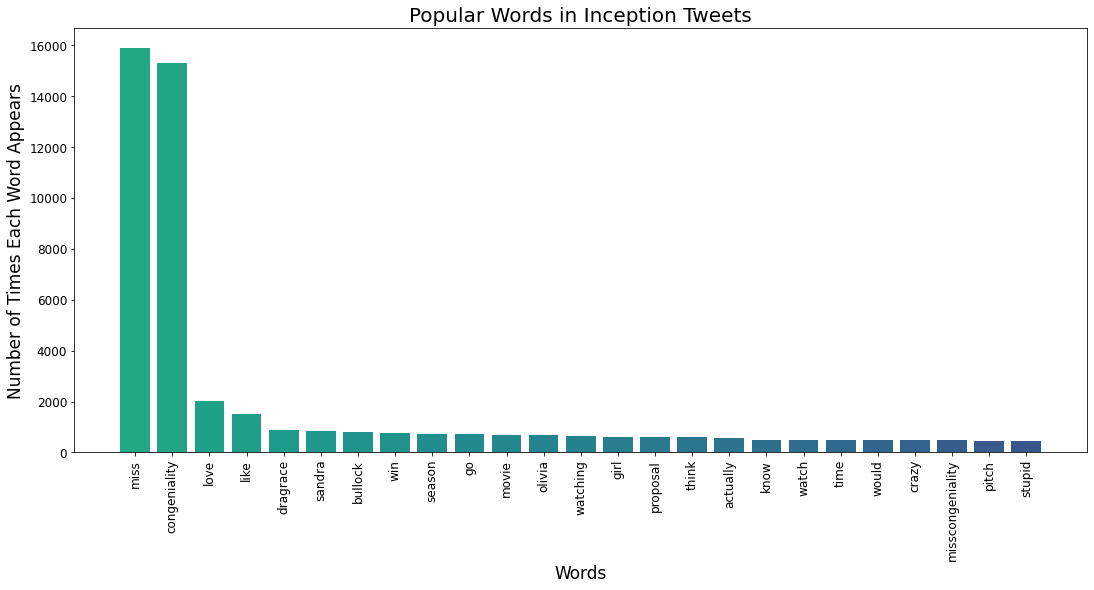

In [25]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# matplotlib bar plot
ax.bar(inception_words, inception_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Number of Times Each Word Appears', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Popular Words in Inception Tweets', fontsize = 20)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

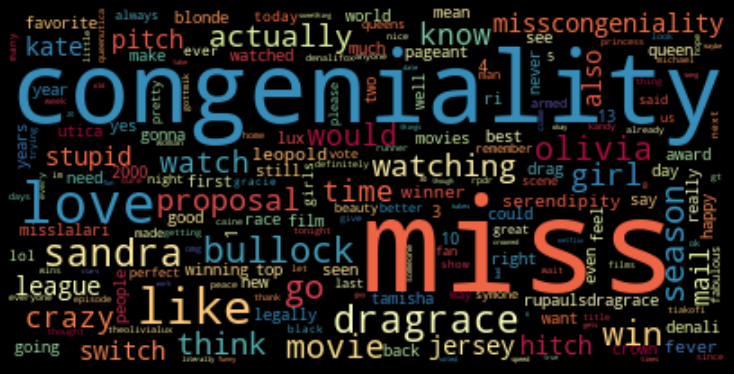

In [26]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()